### "Шапка" с названием проекта

В этой ячейке вы найдете оглавление и ключевые этапы работы, которые помогут вам ориентироваться в процессе выполнения проекта. Проект разделен на пять основных этапов, четыре из которых (этапы 2, 3, 4 и 5) вам предлагается выполнить в этом Jupyter Notebook:

- Подготовка среды MLflow - Первый шаг, подготовка и запуск сервисов MLflow, был выполнен вне ноутбука и оформлен в виде shell скрипта. Это основа для работы с экспериментами и логирования результатов ваших моделей.

- Этап 2 - Исследовательский Анализ Данных (EDA): На этом этапе вы проведете тщательный анализ данных, чтобы лучше понять их структуру и особенности.

- Этап 3 - Генерация Признаков и Обучение Модели: После анализа данных вы сгенерируете новые признаки и обучите модель, используя эти признаки.

- Этап 4 - Отбор Признаков и Обучение Модели: На этом шаге вы отберете наиболее значимые признаки и снова обучите модель для улучшения ее качества.

- Этап 5 - Подбор Гиперпараметров и Обучение Финальной Версии Модели: Финальный этап проекта посвящен оптимизации гиперпараметров для достижения максимального качества модели.

Для удобства навигации и организации работы, пожалуйста, следуйте оглавлению и рекомендациям, описанным в каждом этапе.

> ### Важно: Переобучение моделей
> На каждом этапе проекта, где требуется переобучение модели, важно не просто выполнить эту процедуру, но и тщательно проверить качество модели на соответствующих выборках. Это включает в себя анализ метрик качества, визуализацию результатов, сравнение с предыдущими моделями и, при необходимости, корректировку.

> ### Важно: Разделение выборок
> Перед началом выполнения вашего проекта важно правильно подготовить данные, разделив их на подвыборки. Это позволит оценить производительность модели более объективно и управлять риском переобучения. В зависимости от ваших целей и доступных данных, вы можете использовать различные стратегии разделения:

1. Разделение на train/val/test: Это классический подход, где данные делятся на три части. Обучающая выборка (train) используется для первичного обучения моделей, валидационная (val) - для настройки гиперпараметров и выбора лучшей модели, а тестовая (test) - для финальной оценки производительности модели. Такой подход идеален, если у вас достаточно данных, чтобы разделить их и каждая из выборок была репрезентативна.

2. Разделение на train/test с кросс-валидацией на train: Если данных недостаточно для трех подвыборок, можно ограничиться разделением на обучающую и тестовую выборки. В этом случае кросс-валидация на обучающей выборке поможет оценить стабильность модели и подобрать гиперпараметры.

Определение способа разделения данных: Выбор метода разбиения данных на подвыборки — train, validation и test — должен быть обоснован особенностями вашего набора данных и задачами проекта. Возможные методы разделения, включая различные стратегии и правила, подробно описаны в [документации scikit-learn по разбиению данных](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py). Вы можете следовать этим примерам или разработать собственный метод, исходя из специфики ваших данных.

Ваша задача - выбрать подходящий метод разделения данных исходя из объема и специфики ваших данных. Помните, что финальные метрики качества модели мы будем оценивать на тестовой выборке. Промежуточные результаты после каждого этапа проекта (например, после настройки гиперпараметров) следует оценивать на валидационной выборке, если таковая имеется. Это поможет вам корректно настроить модель перед финальной оценкой её производительности.

In [2]:
# сделайте разделение изначального набора данных в этой ячейке
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# загружаем данные из sprint 1: update_data.csv
if os.path.exists('../data/initial_data.csv'):
    df = pd.read_csv('../data/initial_data.csv')

print(df.shape)

target= 'price' 

# разбиение на выборки
df_train, df_validate, df_test = \
    np.split(df.sample(frac=1, random_state=42),
             [int(0.6*len(df)), int(0.8*len(df))])

print('numpy split X_train: ', df_train.drop(columns=['price']).shape, ' df_validate: ', df_validate.drop(columns=['price']).shape, ' df_test: ', df_test.drop(columns=['price']).shape)

X_train = df_train.drop(columns=['price'])
y_train = df_train['price']

X_valid = df_validate.drop(columns=['price'])
y_valid = df_validate['price']

X_test = df_test.drop(columns=['price'])
y_test = df_test['price']

(123937, 19)
numpy split X_train:  (74362, 18)  df_validate:  (24787, 18)  df_test:  (24788, 18)


In [3]:
X_train.head(5)

id  floor  is_apartment  kitchen_area  living_area  rooms  studio   
103656  118258      1             0      8.000000    34.000000      3       0  \
33392    37912      2             0      9.000000    27.000000      1       0   
62330    71079      3             0     10.000000    18.000000      1       0   
52090    59382     12             0      9.000000    36.700001      2       0   
95519   108995     14             0     97.099998    53.000000      3       0   

        total_area  building_id  build_year  building_type_int   latitude   
103656   57.000000        14490        1985                  6  55.814289  \
33392    36.000000        16266        1995                  4  55.652931   
62330    44.200001         2418        1958                  1  55.810669   
52090    76.000000        22118        2012                  2  55.828106   
95519    97.099998        20818        2008                  2  55.704510   

        longitude  ceiling_height  flats_count  floors_total  has_elevator   
103656  37.817036            2.48          111            16             1  \
33392   37.746994            2.64           83            10             1   
62330   37.638306            3.00          290            11             1   
52090   37.487892            3.00          141            30             1   
95519   37.512836            3.00          414            24             1   

       build_type_floors  
103656         high_rise  
33392          high_rise  
62330          high_rise  
52090          high_rise  
95519          high_rise

#### Этап 2: Исследовательский Анализ Данных (EDA)
На этом этапе ваша задача - провести тщательный исследовательский анализ данных (EDA), чтобы глубже понять особенности и связи в предоставленном наборе данных. В процессе EDA вы должны обратить внимание на три ключевых аспекта, о которых мы говорили в теме 3 курса. Очень важно, чтобы все результаты вашего исследования, включая визуализации, статистический анализ и предварительные выводы, были аккуратно залогированы в MLflow.

Для более организованного исследования предлагаем следующие рекомендуемые шаги:
- Понимание данных: Первоначально ознакомьтесь с данными, изучите типы данных, проверьте наличие пропущенных значений.
- Визуализация данных: Используйте графики и диаграммы для визуализации распределений признаков и возможных взаимосвязей между ними.
- Статистический анализ: Примените статистические методы для изучения центральных тенденций, разброса и корреляций между признаками.
- Предварительные выводы: На основе проведённого анализа сформулируйте предварительные выводы о данных, которые помогут в дальнейшем этапе моделирования.

Помните, что EDA - это итеративный процесс, в котором вы можете возвращаться к предыдущим шагам для дополнительного анализа, если это будет необходимо. Все находки и выводы должны быть чётко зафиксированы и легко доступны для команды проекта.


In [3]:
# 2.1 Загрузка данных
import psycopg
from dotenv import load_dotenv
import pandas as pd
import os

TABLE_NAME = "clean_cost_estimate" 

# подгружаем .env
load_dotenv()

# загрузка данных для обучения модели
connection = {"sslmode": "require", "target_session_attrs": "read-write"}
postgres_credentials = {
    "host": os.getenv("DB_DESTINATION_HOST"),
    "port": os.getenv("DB_DESTINATION_PORT"),
    "dbname": os.getenv("DB_DESTINATION_NAME"),
    "user": os.getenv("DB_DESTINATION_USER"),
    "password": os.getenv("DB_DESTINATION_PASSWORD"),
}

connection.update(postgres_credentials)

with psycopg.connect(**connection) as conn:

    with conn.cursor() as cur:
        cur.execute(f"SELECT * FROM {TABLE_NAME}")
        data = cur.fetchall()
        columns = [col[0] for col in cur.description]

df = pd.DataFrame(data, columns=columns)

# сохраняем данные
#os.makedirs('../data', exist_ok=True)
#with open('../data/initial_data.csv', 'wb') as fd:
#    df.to_csv('../data/initial_data.csv', index=None)

In [4]:
df.head(5)

id  floor  is_apartment  kitchen_area  living_area  rooms  studio   
0   0      9             0         10.53    17.549999      1       0  \
1   1      7             0         12.90    21.500000      1       0   
2   2      9             0         16.80    28.000000      2       0   
3   3      1             0         22.80    38.000000      3       0   
4   4      3             0          7.20    12.000000      1       0   

   total_area     price  building_id  build_year  building_type_int   
0   35.099998   9500000         6220        1965                  6  \
1   43.000000  13500000        18012        2001                  2   
2   56.000000  13500000        17821        2000                  4   
3   76.000000  20000000        18579        2002                  4   
4   24.000000   5200000         9293        1971                  1   

    latitude  longitude  ceiling_height  flats_count  floors_total   
0  55.717113  37.781120            2.64           84            12  \
1  55.794849  37.608013            3.00           97            10   
2  55.740040  37.761742            2.70           80            10   
3  55.672016  37.570877            2.64          771            17   
4  55.808807  37.707306            2.60          208             9   

   has_elevator build_type_floors  
0             1         high_rise  
1             1         high_rise  
2             1         high_rise  
3             1         high_rise  
4             1       multy_story

In [5]:
# 2.2. Общий обзор датасета

# базовая информация
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123937 entries, 0 to 123936
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 123937 non-null  int64  
 1   floor              123937 non-null  int64  
 2   is_apartment       123937 non-null  int64  
 3   kitchen_area       123937 non-null  float64
 4   living_area        123937 non-null  float64
 5   rooms              123937 non-null  int64  
 6   studio             123937 non-null  int64  
 7   total_area         123937 non-null  float64
 8   price              123937 non-null  int64  
 9   building_id        123937 non-null  int64  
 10  build_year         123937 non-null  int64  
 11  building_type_int  123937 non-null  int64  
 12  latitude           123937 non-null  float64
 13  longitude          123937 non-null  float64
 14  ceiling_height     123937 non-null  float64
 15  flats_count        123937 non-null  int64  
 16  fl

count          mean           std          min   
id                 123937.0  7.057130e+04  4.093069e+04     0.000000  \
floor              123937.0  7.443806e+00  5.689226e+00     1.000000   
is_apartment       123937.0  9.480623e-03  9.690623e-02     0.000000   
kitchen_area       123937.0  1.851865e+01  1.179426e+01     3.300000   
living_area        123937.0  3.086442e+01  1.965710e+01     5.500000   
rooms              123937.0  2.119416e+00  9.872045e-01     1.000000   
studio             123937.0  0.000000e+00  0.000000e+00     0.000000   
total_area         123937.0  6.172883e+01  3.931421e+01    11.000000   
price              123937.0  1.923365e+07  6.890131e+07    11.000000   
building_id        123937.0  1.398119e+04  6.962401e+03     1.000000   
build_year         123937.0  1.986386e+03  2.200538e+01  1901.000000   
building_type_int  123937.0  3.248013e+00  1.459814e+00     0.000000   
latitude           123937.0  5.573066e+01  1.031484e-01    55.211460   
longitude          123937.0  3.758941e+01  1.507319e-01    36.864372   
ceiling_height     123937.0  2.750417e+00  2.226233e-01     2.000000   
flats_count        123937.0  2.510869e+02  2.065170e+02     1.000000   
floors_total       123937.0  1.404479e+01  6.862320e+00     1.000000   
has_elevator       123937.0  8.963586e-01  3.047960e-01     0.000000   

                            25%           50%           75%           max  
id                 3.510700e+04  7.068300e+04  1.061100e+05  1.413610e+05  
floor              3.000000e+00  6.000000e+00  1.000000e+01  5.600000e+01  
is_apartment       0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
kitchen_area       1.173000e+01  1.575000e+01  2.130000e+01  2.760000e+02  
living_area        1.955000e+01  2.625000e+01  3.550000e+01  4.600000e+02  
rooms              1.000000e+00  2.000000e+00  3.000000e+00  2.000000e+01  
studio             0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
total_area         3.910000e+01  5.250000e+01  7.100000e+01  9.200000e+02  
price              8.900000e+06  1.180000e+07  1.670000e+07  9.873738e+09  
building_id        8.493000e+03  1.423300e+04  2.034100e+04  2.462000e+04  
build_year         1.969000e+03  1.984000e+03  2.006000e+03  2.023000e+03  
building_type_int  2.000000e+00  4.000000e+00  4.000000e+00  6.000000e+00  
latitude           5.565394e+01  5.572490e+01  5.580881e+01  5.601103e+01  
longitude          3.749181e+01  3.758139e+01  3.769291e+01  3.794641e+01  
ceiling_height     2.640000e+00  2.640000e+00  2.800000e+00  2.700000e+01  
flats_count        1.110000e+02  1.990000e+02  3.220000e+02  4.455000e+03  
floors_total       9.000000e+00  1.400000e+01  1.700000e+01  9.900000e+01  
has_elevator       1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00

In [6]:
# проверка пропусков
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: float64)

In [ ]:

from sklearn.cluster import KMeans
from sklearn.neighbors import BallTree
import numpy as np
import geopy.distance
    
# Создаем дополнительные признаки
df['age'] = pd.Timestamp('today').year - df['build_year'] # возраст дома
df['floor_ratio'] = df['floor']/df['floors_total']
df['kitchen_ratio'] = df['kitchen_area'].div(df['total_area'], axis=0)
df['living_ratio'] = df['living_area']/df['total_area'].values

# агрегируем по building_id
df["building_price_mean"] = df.groupby("building_id")["price"].transform("mean")
df["building_area_mean"] = df.groupby("building_id")["total_area"].transform("mean")

# кластеризация по координатам
coords = df[["latitude","longitude"]].dropna()
kmeans = KMeans(n_clusters=10, random_state=42)
df.loc[coords.index, "location_cluster"] = kmeans.fit_predict(coords)
df["location_cluster"] = df["location_cluster"].astype("int")

# кластеризация по высоте потолка
coords = df[["ceiling_height"]].dropna()
kmeans = KMeans(n_clusters=6, random_state=42)
df.loc[coords.index, "ceiling_height_cluster"] = kmeans.fit_predict(coords)
df["ceiling_height_cluster"] = df["ceiling_height_cluster"].astype("int")

# кластеризация по количеству квартир в доме
coords = df[["flats_count"]].dropna()
kmeans = KMeans(n_clusters=10, random_state=42)
df.loc[coords.index, "flats_count_cluster"] = kmeans.fit_predict(coords)
df["flats_count_cluster"] = df["flats_count_cluster"].astype("int")

# в качестве фичи будем использовать удаленность от центра Москвы
# добавим служебные колонки с координататми центра Москвы
df["latitude_2"] = 55.7522
df["longitude_2"] = 37.6156

# вычислим дистанцию
df['dist_origin_dest'] = list(map(geopy.distance.geodesic, df.loc[:, ['latitude', 'longitude']].values, df.loc[:, ["latitude_2", "longitude_2"]].values))
# приведем ее к типу float
df['dist_origin_dest'] = df['dist_origin_dest'].map(lambda x: x.km)

# загружаем данные moscow_metro_stations.csv
if os.path.exists('../data/moscow_metro_stations.csv'):
    df_moscow = pd.read_csv('../data/moscow_metro_stations.csv')

# Оставляем нужные столбцы и переименовываем
# столбцыслужебные не удаляем
moscow_stations = df_moscow.drop(columns=['id', 'line_id', 'line_name', 'line_color'])
moscow_stations.columns = ['station_name', 'lat', 'lon']
        
metro_coords = np.radians([[s.lat, s.lon] for s in moscow_stations.itertuples()])

# Строим дерево
tree = BallTree(metro_coords, metric='haversine')

# Координаты квартир в радианах
flat_coords = np.radians(df[["latitude", "longitude"]].values)
flat_coords[:5]

# Ищем ближайшую станцию
distances_rad, _ = tree.query(flat_coords, k=1)
# Переводим в метры (радиус Земли ~6371 км)
df["distance_to_metro_fast"] = distances_rad[:, 0] * 6371000

# удалим служебные колонки и уже не нужные колонки с координататми
df.drop(columns=['latitude', 'longitude', 'latitude_2', 'longitude_2'], inplace=True)


In [13]:
df.head()

floor  is_apartment  kitchen_area  living_area  rooms  studio  total_area   
0      9             0           9.9    19.900000      1       0   35.099998  \
1      7             0          16.6    26.400000      1       0   43.000000   
2      9             0           9.0    32.000000      2       0   56.000000   
3      1             0          10.1    43.099998      3       0   76.000000   
4      3             0           3.0    14.000000      1       0   24.000000   

      price  build_year  building_type_int  ceiling_height  flats_count   
0   9500000        1965                  6            2.64           84  \
1  13500000        2001                  2            3.00           97   
2  13500000        2000                  4            2.70           80   
3  20000000        2002                  4            2.64          771   
4   5200000        1971                  1            2.60          208   

   floors_total  has_elevator build_type_floors  age  floor_ratio   
0            12             1         high_rise   60     0.750000  \
1            10             1         high_rise   24     0.700000   
2            10             1         high_rise   25     0.900000   
3            17             1         high_rise   23     0.058824   
4             9             1       multy_story   54     0.333333   

   kitchen_ratio  living_ratio  building_price_mean  building_area_mean   
0       0.282051      0.566952         9.100000e+06           41.049999  \
1       0.386047      0.613953         1.873333e+07           55.966667   
2       0.160714      0.571429         1.518333e+07           60.533333   
3       0.132895      0.567105         1.477082e+07           50.200000   
4       0.125000      0.583333         7.580000e+06           28.218750   

   location_cluster  dist_origin_dest  distance_to_metro_fast   
0                 9         11.107508              732.967724  \
1                 1          4.772297              525.649516   
2                 9          9.277185              538.689763   
3                 7          9.359522              815.506000   
4                 1          8.534197             1442.654973   

   ceiling_height_cluster  flats_count_cluster  
0                       0                    5  
1                       4                    7  
2                       5                    5  
3                       0                    8  
4                       0                    1

In [ ]:
import pandas as pd
import numpy as np
import os

# сохраняем данные
os.makedirs('../data', exist_ok=True)
with open('../data/transform_data.csv', 'wb') as fd:
    df.to_csv('../data/transform_data.csv', index=None)

In [1]:
import pandas as pd
import numpy as np
import os

# загружаем данные: update_data.csv
if os.path.exists('../data/transform_data.csv'):
    df = pd.read_csv('../data/transform_data.csv')

In [2]:
missing = df.isnull().sum().sort_values(ascending=False).T
missing[missing > 0]

Series([], dtype: int64)

In [3]:
df.columns

Index(['floor', 'is_apartment', 'kitchen_area', 'living_area', 'rooms',
       'studio', 'total_area', 'price', 'build_year', 'building_type_int',
       'ceiling_height', 'flats_count', 'floors_total', 'has_elevator',
       'build_type_floors', 'age', 'floor_ratio', 'kitchen_ratio',
       'living_ratio', 'building_price_mean', 'building_area_mean',
       'location_cluster', 'dist_origin_dest', 'distance_to_metro_fast',
       'ceiling_height_cluster', 'flats_count_cluster'],
      dtype='object')

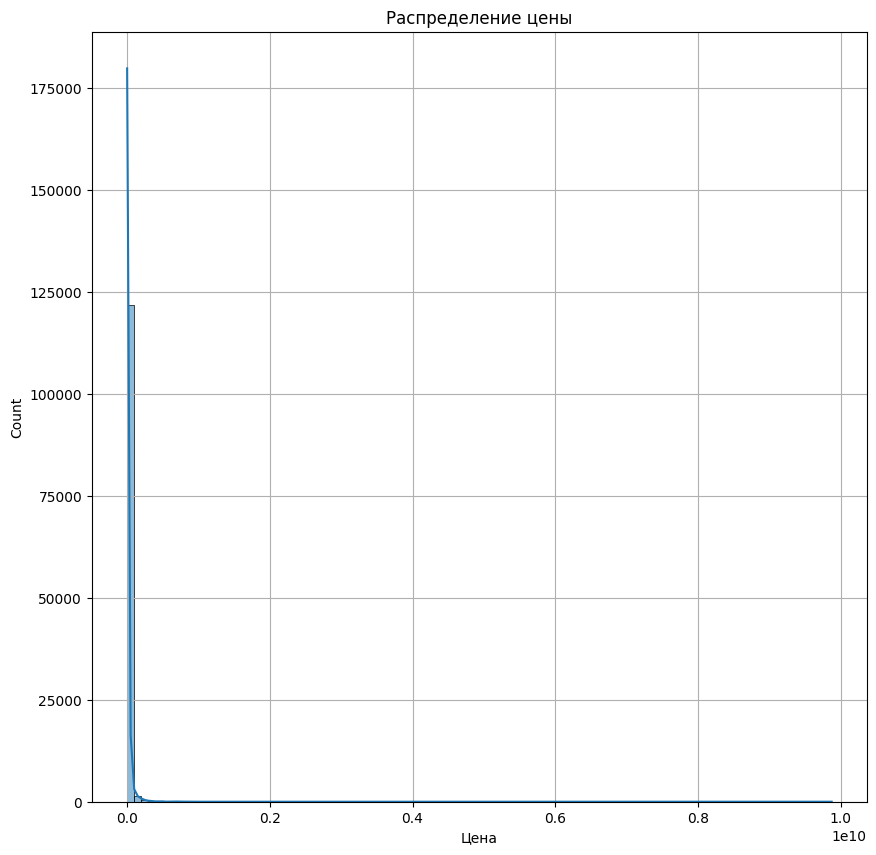

In [ ]:
# 2.3 Анализ признаков для модели

# 1) Распределение основной целевой переменной price

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.grid(True)

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_target_variable'))

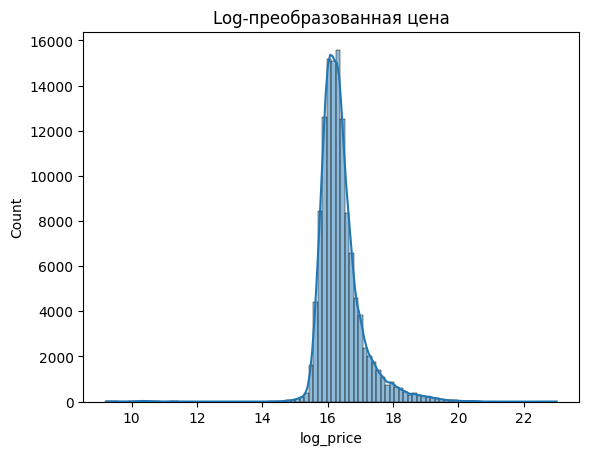

In [5]:
# 2) Также можно посмотреть логарифм:

df['log_price'] = np.log1p(df['price'])

sns.histplot(df['log_price'], bins=100, kde=True)
plt.title('Log-преобразованная цена')

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_target_variable_log'))

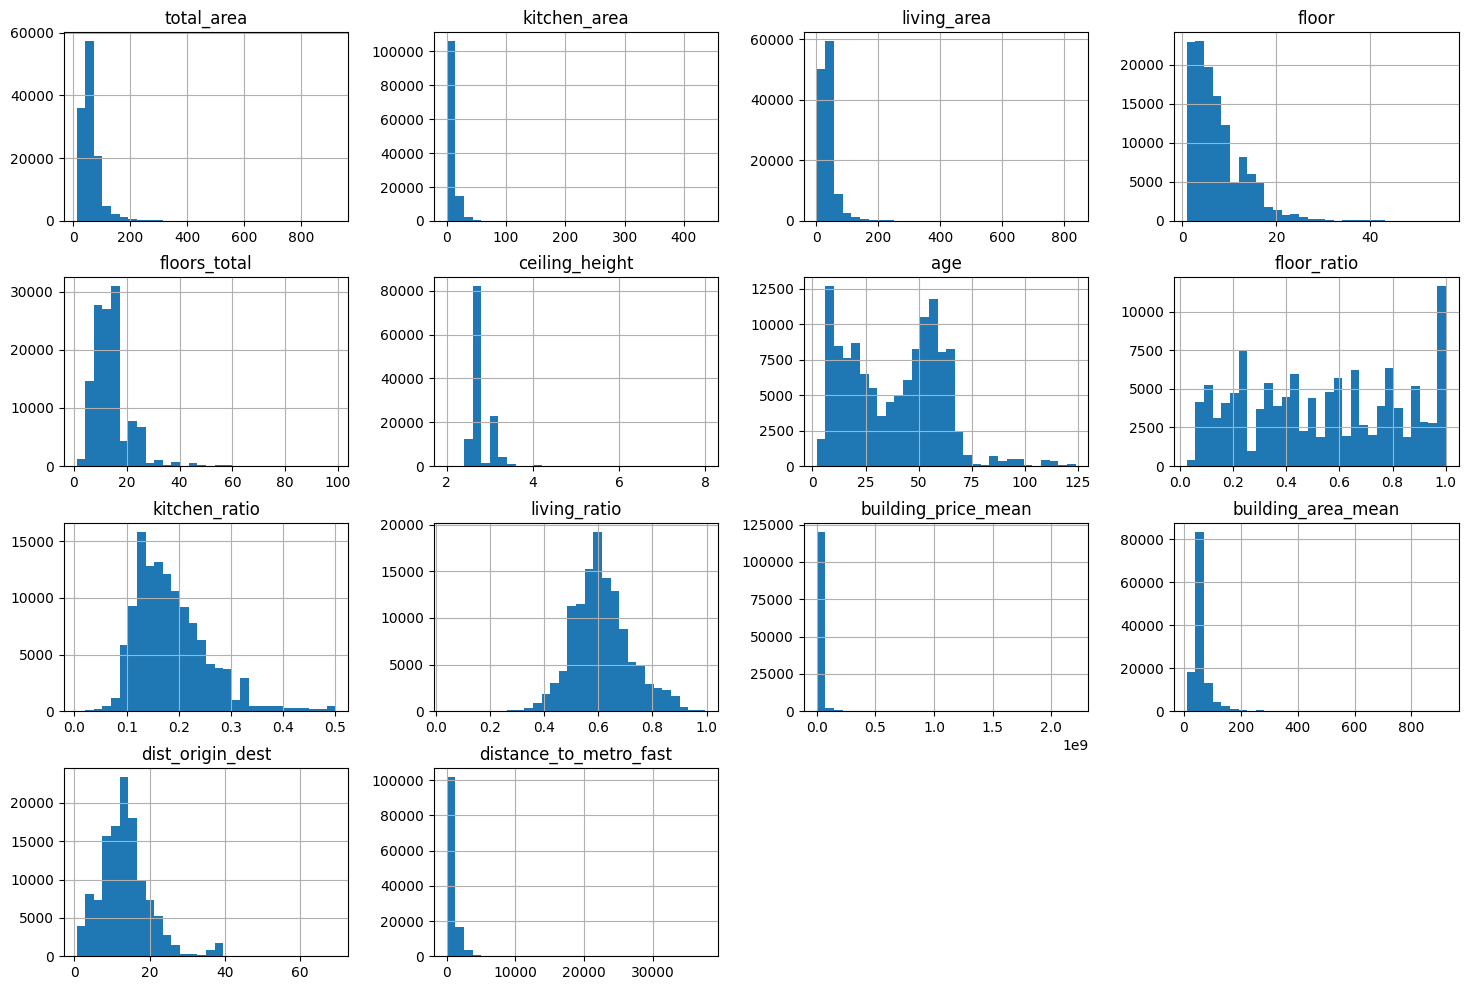

In [6]:
# 3) Посмотрим pаспределения ключевых признаков

numeric_features = [
    'total_area', 'kitchen_area', 'living_area', 'floor', 'floors_total',
    'ceiling_height', 'age', 'floor_ratio', 'kitchen_ratio', 'living_ratio',
    'building_price_mean', 'building_area_mean', 'dist_origin_dest',
    'distance_to_metro_fast'
]

df[numeric_features].hist(bins=30, figsize=(18, 12), grid=True)

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_features'))

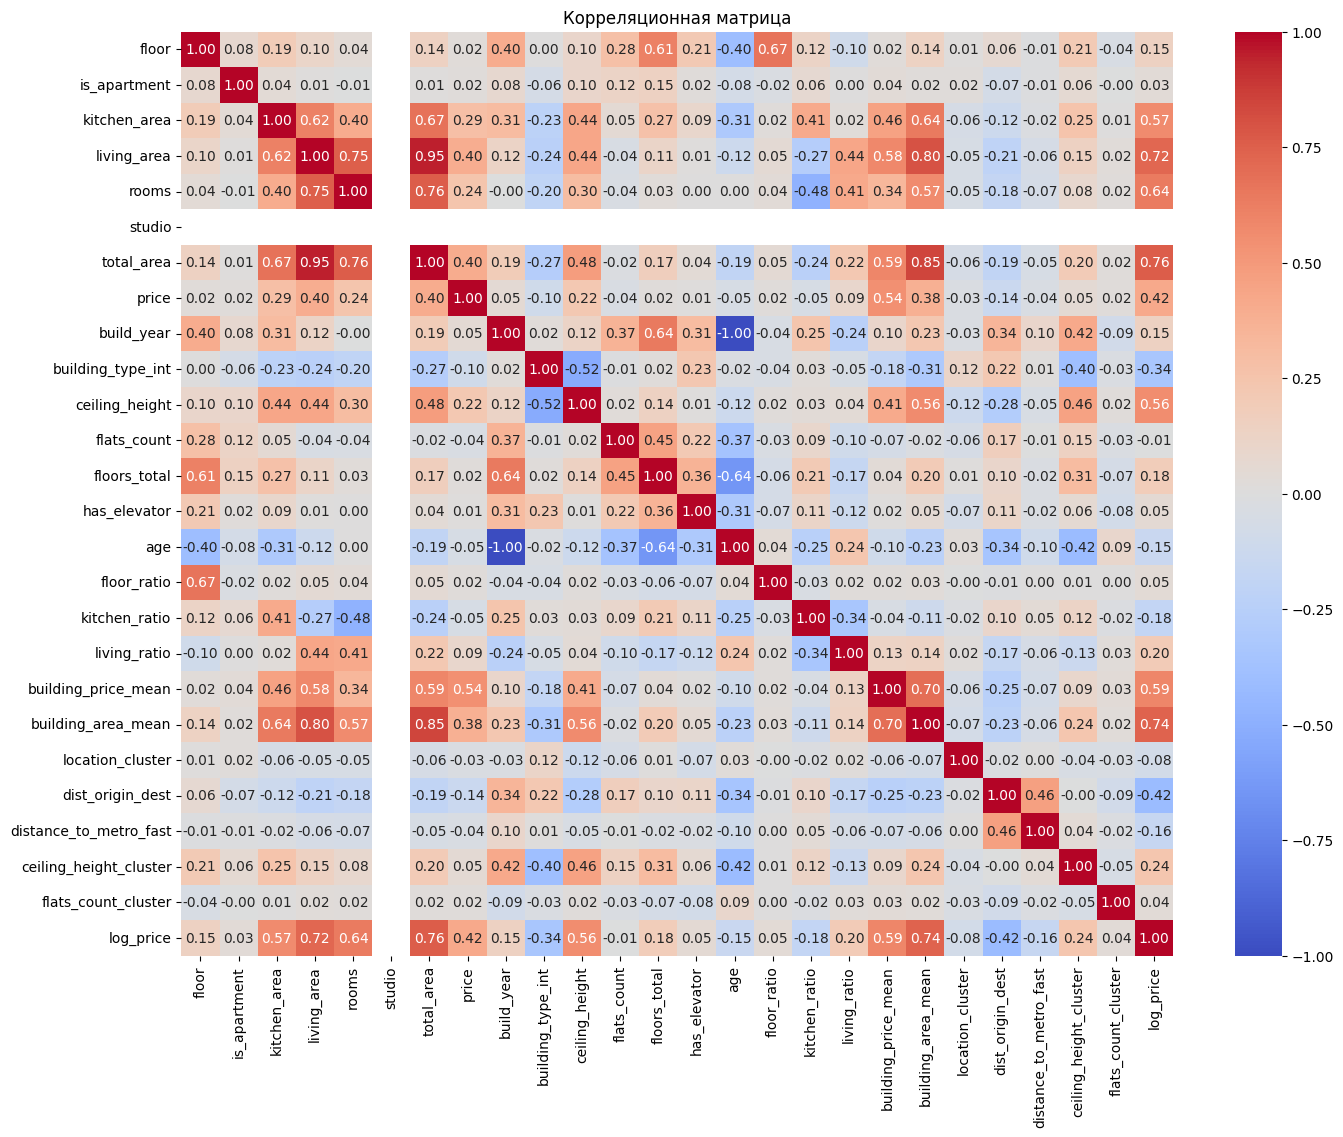

In [ ]:
# 2.4 Анализ целевой переменной, 2.4 Анализ целевой переменной в зависимости от различных признаков

# 4) Проведем корреляционный анализ

plt.figure(figsize=(16, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
# Особое внимание — на корреляции с price или log_price.

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Correlation_matrix'))

In [ ]:
# a) Целевая переменная price и log_price
# price и log_price неожиданно не сильно коррелируют между собой (0.42), но log_price сильнее и чище коррелирует 
# с признаками, поэтому лучше подходит для моделей (возможно нужно будет оставить ее)

# b) Наиболее сильные корреляты log_price (новой целевой переменной) => увеличение стоимости:
total_area              = 0.76   # Сильнейший коррелят. Ожидаемо — чем больше площадь, тем дороже
building_area_mean      = 0.74   # Размер здания связан с ценой
living_area             = 0.72   # Поддерживает тренд общей площади
rooms                   = 0.64   # Больше комнат → дороже
building_price_mean     = 0.59   # отражает среднюю цену по зданию, мощный фич
kitchen_area            = 0.57	 # Похожий эффект как на жилой и общей площади
ceiling_height          = 0.56   # Высокие потолки чаще в премиальных квартирах
ceiling_height_cluster  = 0.24   # Отражает распределение потолков — слабая +
living_ratio            = 0.20   # Незначительная положительная 
flor_total              = 0.18   # незначительная положительная
floor                   = 0.15   # Незначительно положительная
build_year              = 0.15   # Незначительно положительная
has_elevator            = 0.05   # Слабо влияет на прямую
floor_ratio	            = 0.05   # Может быть связано с типом квартиры (на первом/последнем этажах)
flats_count_cluster	    = 0.04	 # слабо влияет на прямую

# с) Отрицательные корреляции с log_price (новой целевой переменной) => уменьшение стоимости:
dist_origin_dest        = -0.42	 # Удалённость от центра города - возможно связано с тем, что это данные по Москве
distance_to_metro_fast  = -0.16  # Чем дальше от метро, тем дешевле
building_type_int       = -0.34  # тип здания влияет на снижении цены
kitchen_ratio           = -0.18  # слабая отрицательная корреляция с ценой (возможно, отражает непропорционально большие кухни в дешёвых квартирах).
age	                    = -0.15	 # Старые здания — чуть дешевле

# в данном датасете - мусорный рекивит - studio (так как везде = 0)

# d) Мультиколлинеарность — признаки с сильной корреляцией между собой
living_area - total_area                    = 0.95	# Почти одно и то же, можно оставить один
total_area - building_area_mean             = 0.85 # Очень сильно связаны, возможно лучше оставить только один
living_area - building_area_mean            = 0.80 # Очень сильно связаны, возможно лучше оставить только один
rooms - living_area                         = 0.75	# Сильно связаны, возможно лучше оставить только один
building_price_mean - building_area_mean    = 0.70	# Сильно связаны, возможно лучше оставить только один
total_area - kitchen_area                   = 0.67 # Логичная корреляция
total_area - rooms                          = 0.76 # Чем больше площадь, тем больше комнат
floor - floors_total                        = 0.61	# Более высокие этажи в высотных домах

# Нужно проверить не чувствительна ли модель к мультиколлинеарности.

# is_apartment, building_type_int и has_elevator слабо коррелируют с ценой — возможно, имеют категориальный/непрямой эффект.

In [ ]:
# e) Промежуточные выводы: 
# Для моделей оставить log_price как целевую переменную.
# Проведи отбор признаков, чтобы избежать мультиколлинеарности.
# Используй total_area, building_area_mean, living_area, rooms , building_price_mean, kitchen_area, ceiling_height, 
# dist_origin_dest, distance_to_metro_fast, building_type_int как основу модели — они показывают сильную связь с ценой.
# Категориальные признаки (build_type_floors, location_cluster, ceiling_height_cluster, flats_count_cluster) могут быть 
# важны через one-hot или catboost encoding.

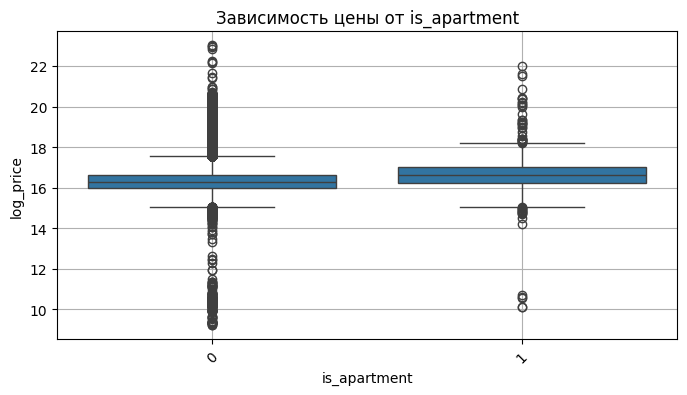

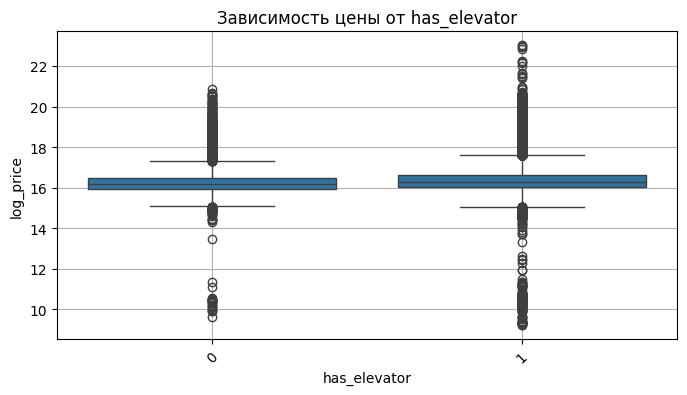

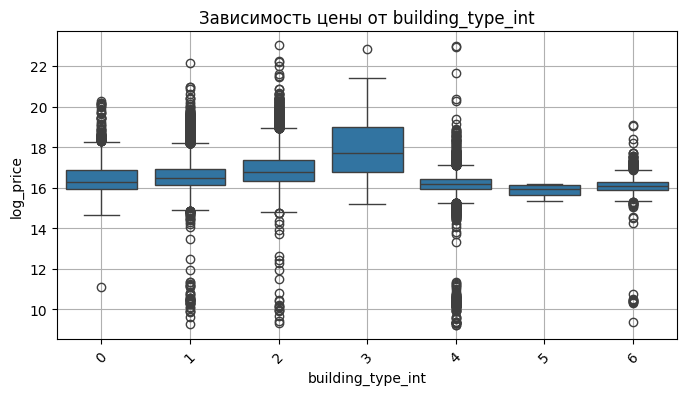

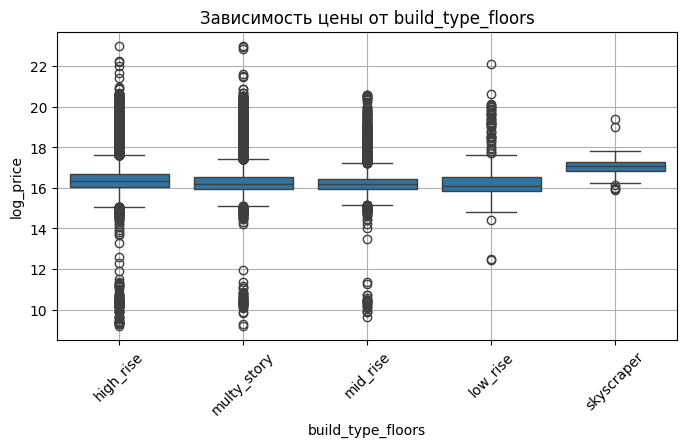

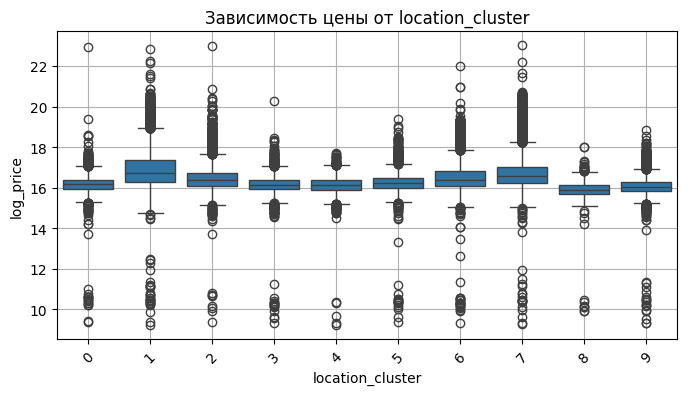

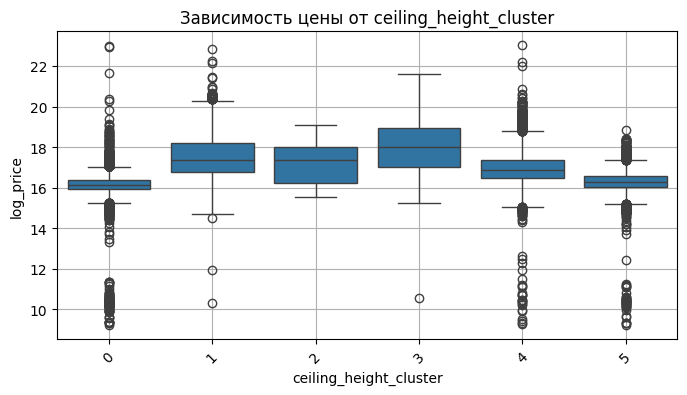

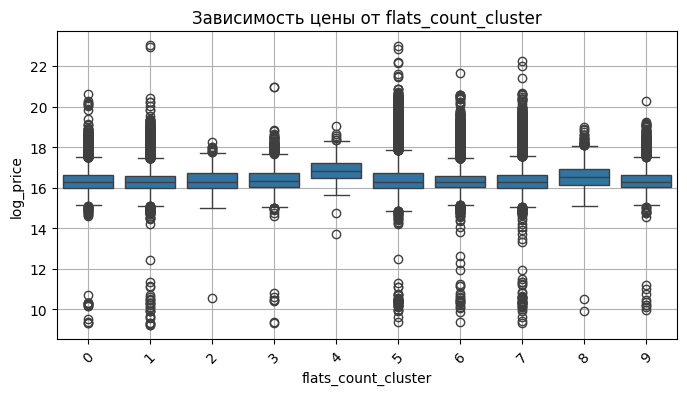

In [19]:
# 5) Исследование категориальных переменных
categorical = [
    'is_apartment', 'has_elevator', 'building_type_int',
    'build_type_floors', 'location_cluster', 'ceiling_height_cluster', 'flats_count_cluster'
]

for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='log_price', data=df)
    plt.title(f'Зависимость цены от {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.savefig(os.path.join(ASSETS_DIR, f'Categorial_features_{col}'))


In [ ]:
# 1 - Зависимость цены (log_price) от is_apartment
# Две категории: обычная квартира (0) и апартаменты (1).
# Распределения очень похожи, но Медиана у апартаментов чуть выше.
# Цены на апартаменты в среднем на 20–25% ниже, чем на квартиры. 
# При этом их расположение часто бывает более удобным: апарт-комплексы 
# стараются строить в центре или вблизи важных городских объектов. 
# Цена — главный «козырь» апартаментов.
# Разброс цен шире у квартир (могут быть как дорогие высотки, так и недорогие многоэтажки), а
# апартаменты могут быть в обычных домах комфорт-класса
# Однако разница незначительная. Поэтому is_apartment имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с floors_total или
# dist_origin_dest, distance_to_metro_fast (например, если далеко от центра города или метро  — это может быть минус).

# 2 - Зависимость цены (log_price) от has_elevator
# Две категории: без лифта (0) и с лифтом (1).
# Распределения очень похожи, но Медиана у домов с лифтом чуть выше, что ожидаемо.
# Разброс цен шире у домов с лифтом (могут быть как дорогие высотки, так и недорогие многоэтажки).
# Однако разница незначительная. Поэтому has_elevator имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с location_cluster 
# или (например, если этажность > 5 и лифта нет — это может быть минус).

# 3 - Зависимость цены (log_price) от building_type_int
# Распределение цен различается между типами.
# Некоторые типы (например, 0, 1, 2 , 3) имеют высокие медианные значения log_price, что может говорить 
# о более элитных или новых домах. Вывод - признак location_cluster имеет информативность и отражает 
# ценовой уровень района, можно использовать в моделе (через OneHotEncoding).

# 4 - Зависимость цены (log_price) от build_type_floors
# Распределения очень похожи, но Медиана отличается незначительно.
# Разброс цен незначительный. Поэтому build_type_floors имеет слабую предсказательную силу.

# 5 - Зависимость цены (log_price) от location_cluster
# Распределение цен различается между кластерами.
# Некоторые кластеры (например, 1, 6, 7) имеют высокие медианные значения log_price, что может говорить 
# о более престижных или центральных районах.
# Другие кластеры (8, 3, 4) — с пониженными значениями, возможно, окраины.
# Вывод - признак location_cluster имеет информативность и отражает ценовой уровень района, можно использовать 
# в моделе (через OneHotEncoding).

# 6 - Зависимость цены (log_price) от ceiling_height_cluster
# Распределение цен различается между кластерами.
# Некоторые кластеры (например, 1, 2, 3) имеют высокие медианные значения log_price, но практически все
# распределение цент приходится на кластеры 0, 4, 5 что может говорить 
# о более престижных домах потолки выше, так класеты 1,2,3 - потолки выше 3.1 метра.
# Вывод - признак ceiling_height_cluster имеет информативность и отражает ценовой уровень квартиры, можно использовать 
# в моделе (через OneHotEncoding).

# 7 - Зависимость цены (log_price) от flats_count_cluster
# Распределения в основном в кластерах 1,2,5,6,7, но Медиана отличается незначительно.
# Разброс цен незначительный. Поэтому flats_count_cluster имеет слабую предсказательную силу.
# Можно использовать как вспомогательный категориальный признак в сочетании например с building_type_int или build_type_floors

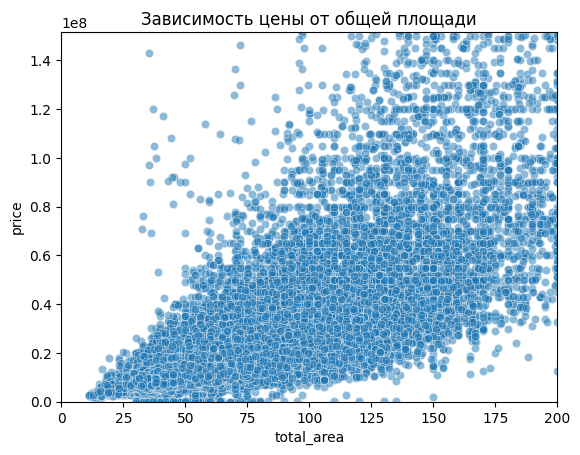

In [13]:
# 6) Зависимость цены от площади

sns.scatterplot(x='total_area', y='price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlim(0, 200)
plt.ylim(0, df['price'].quantile(0.99))

plt.savefig(os.path.join(ASSETS_DIR, 'Price_dependence_total_area'))

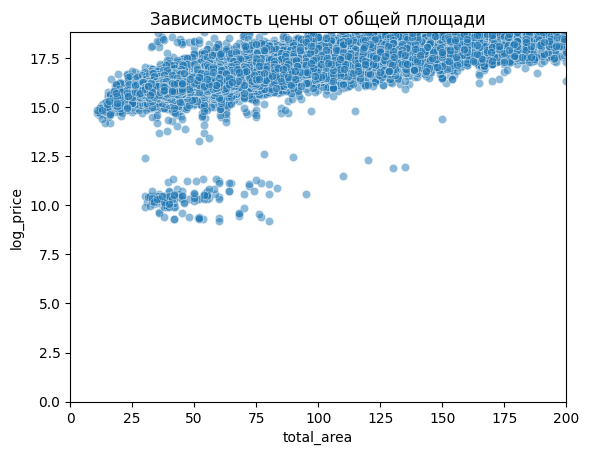

In [ ]:
# 6.1) Зависимость цены от площади

sns.scatterplot(x='total_area', y='log_price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlim(0, 200)
plt.ylim(0, df['log_price'].quantile(0.99))

plt.savefig(os.path.join(ASSETS_DIR, 'Log_Price_dependence_total_area'))

In [ ]:
# поведение ожидаемо - чем больше плолщадь, тем выше цена. На разброс влияют
# по видимому удаленность от центра города и метро, класс здания

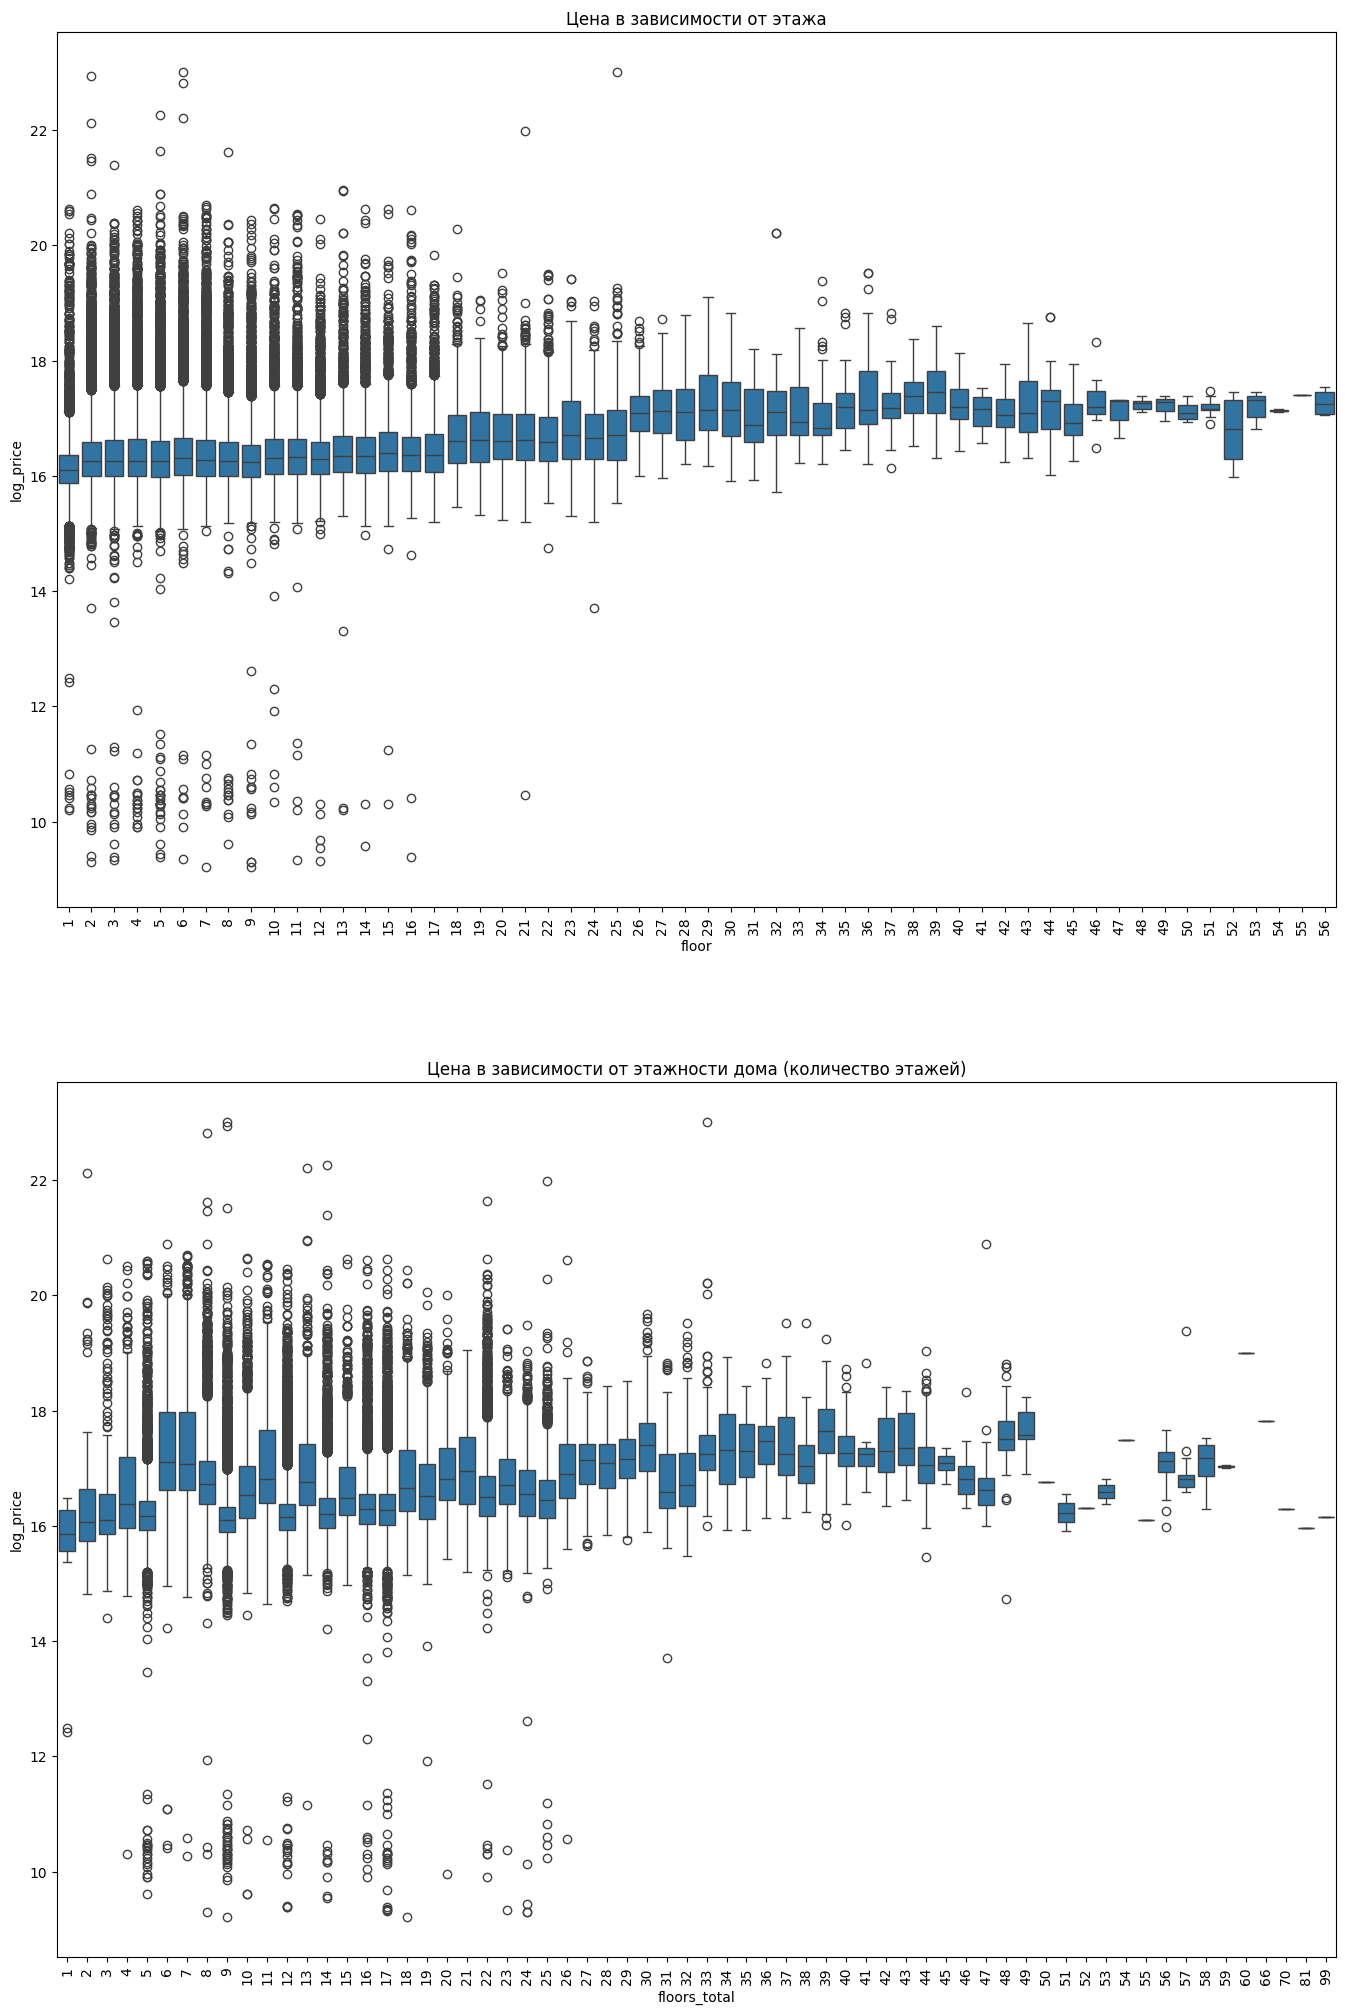

In [31]:
# 7. Этаж и этажность
fig, axs = plt.subplots(2, 1)
#fig.tight_layout(pad=1.2)
fig.set_size_inches(16.5, 25, forward=True) 

sns.boxplot(x='floor', y='log_price', data=df, ax=axs[0])
axs[0].set_title('Цена в зависимости от этажа')
axs[0].tick_params(axis='x', labelrotation=90)

sns.boxplot(x='floors_total', y='log_price', data=df, ax=axs[1])
axs[1].set_title('Цена в зависимости от этажности дома (количество этажей)')
axs[1].tick_params(axis='x', labelrotation=90)

plt.savefig(os.path.join(ASSETS_DIR, 'Log_Price_dependence_floor_and_floors_total'))

In [17]:
# Вывод: 1) этаж в доме - Чем выше этаж тем выше цена, но зависимость слабая - медиана практически одинаковая.
# до 5-6 этажа цена чуть растет (возможно выше тише, лучше вид), до 17 плато или чуть падение, возможно старые высотки
# Дальше рост до 17 этажа - возможно новые дома или престижный район. После 26 этажа взлеты и паднения в виде 
# синусоиды. Нужно еще посмотреть на распределения для floor_ratio.

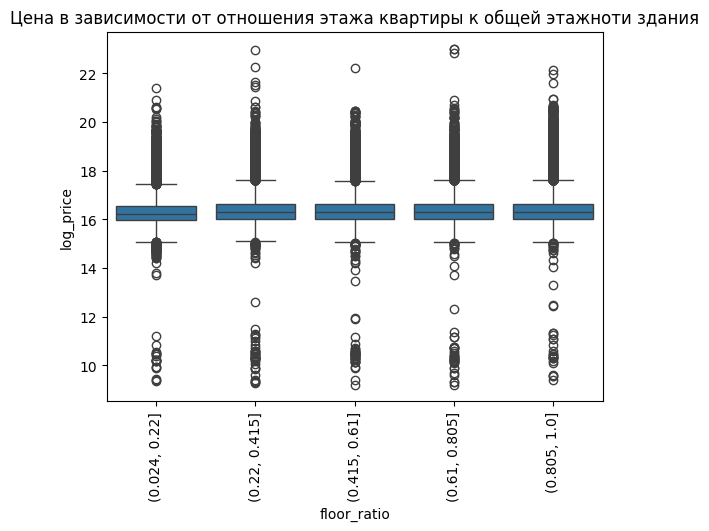

In [20]:
sns.boxplot(x=pd.cut(df['floor_ratio'], bins=5), y='log_price', data=df)
plt.title('Цена в зависимости от отношения этажа квартиры к общей этажноти здания')
plt.xticks(rotation=90)

plt.savefig(os.path.join(ASSETS_DIR, 'Log_Price_dependence_floor_ratio'))

In [ ]:
# Вывод: Медиана практически одинакова, вероятно самые низкие и самые высокие floor_ratio
# т.е. самые низкие и самые высокие этажи) не дают существенный минус в цене, т.е. нет
# явного предпочтения средних этажей (20-70% высоты).

In [5]:
# Выводы/гипотезы: 
#  floor - слабоположительное влияние - средние этажи дороже (не факт)
#  floors_total - слабоположительное влияние - новые высотки=выше цена => очень вероятно
#  floor_ratio - слабоотрицательное - первый/последний этаж цена ниже (не факт)

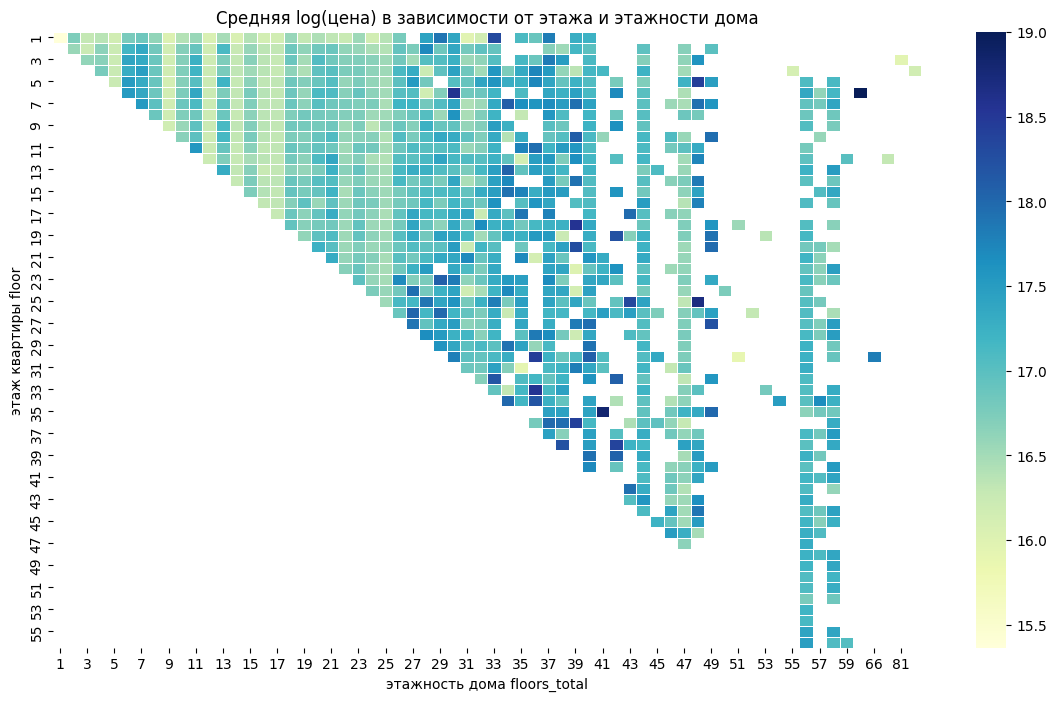

In [10]:
# построим тепловую карту floor x floors_total->средняя log_price

pivot = df.pivot_table(
    values='log_price',
    index='floor',
    columns='floors_total',
    aggfunc='mean'
)

plt.figure(figsize=(14,8))
sns.heatmap(
    pivot,
    annot=False,
    fmt='.1f',
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title('Средняя log(цена) в зависимости от этажа и этажности дома')
plt.xlabel('этажность дома floors_total')
plt.ylabel('этаж квартиры floor')

plt.savefig(os.path.join(ASSETS_DIR, 'HeatMap_Log_Price_dependence_floor_Floors_total'))

In [7]:
# заметно, что дорогие квартиры чаше в высоких этажах 
# Гипотеза1: вероятно в новых домах, так же вероятно 1-й этаж и низкие
# этажи в многоэтажках чато дешевле
# Гипотеза2: вероятно крайние этажи в старых домах чаще всего самые дешевые

In [8]:
# поэкспериментируем с признаками, сгенерируем 2 новых на основе этажа и этажности
# - относительный этаж уже есть
# - группировка по этажу
df['floor_group'] = pd.cut(df['floor'], bins=[0, 1, 3, 7, 12, 100],
                           labels=['1-й', 'низкий', 'средний', 'высокий', 'очень высокий'])
df[['floor','floor_group']]

floor    floor_group
0           9        высокий
1           7        средний
2           9        высокий
3           1            1-й
4           3         низкий
...       ...            ...
123932     16  очень высокий
123933      5        средний
123934      7        средний
123935     15  очень высокий
123936     16  очень высокий

[123937 rows x 2 columns]

In [9]:
# - группировка по этажности дома (изменим принцип ранее созданной группировки -  build_type_floors)
df['build_height_group'] = pd.cut(df['floors_total'], bins=[0, 4, 9, 17, 100],
                                  labels=['малоэтажка', 'среднеэтажка', 'высотка', 'небоскреб'])
df[['floors_total', 'build_type_floors', 'build_height_group']]

floors_total build_type_floors build_height_group
0                 12         high_rise            высотка
1                 10         high_rise            высотка
2                 10         high_rise            высотка
3                 17         high_rise            высотка
4                  9       multy_story       среднеэтажка
...              ...               ...                ...
123932            25         high_rise          небоскреб
123933             5          mid_rise       среднеэтажка
123934             9       multy_story       среднеэтажка
123935            25         high_rise          небоскреб
123936            17         high_rise            высотка

[123937 rows x 3 columns]

In [10]:
# определим флаг "нежелательных" этажей
df['bad_floor_flag'] = ((df['floor'] == 1) | (df['floor'] == df['floors_total'])).astype(int)
df[['floor', 'floors_total', 'bad_floor_flag']]

floor  floors_total  bad_floor_flag
0           9            12               0
1           7            10               0
2           9            10               0
3           1            17               1
4           3             9               0
...       ...           ...             ...
123932     16            25               0
123933      5             5               1
123934      7             9               0
123935     15            25               0
123936     16            17               0

[123937 rows x 3 columns]

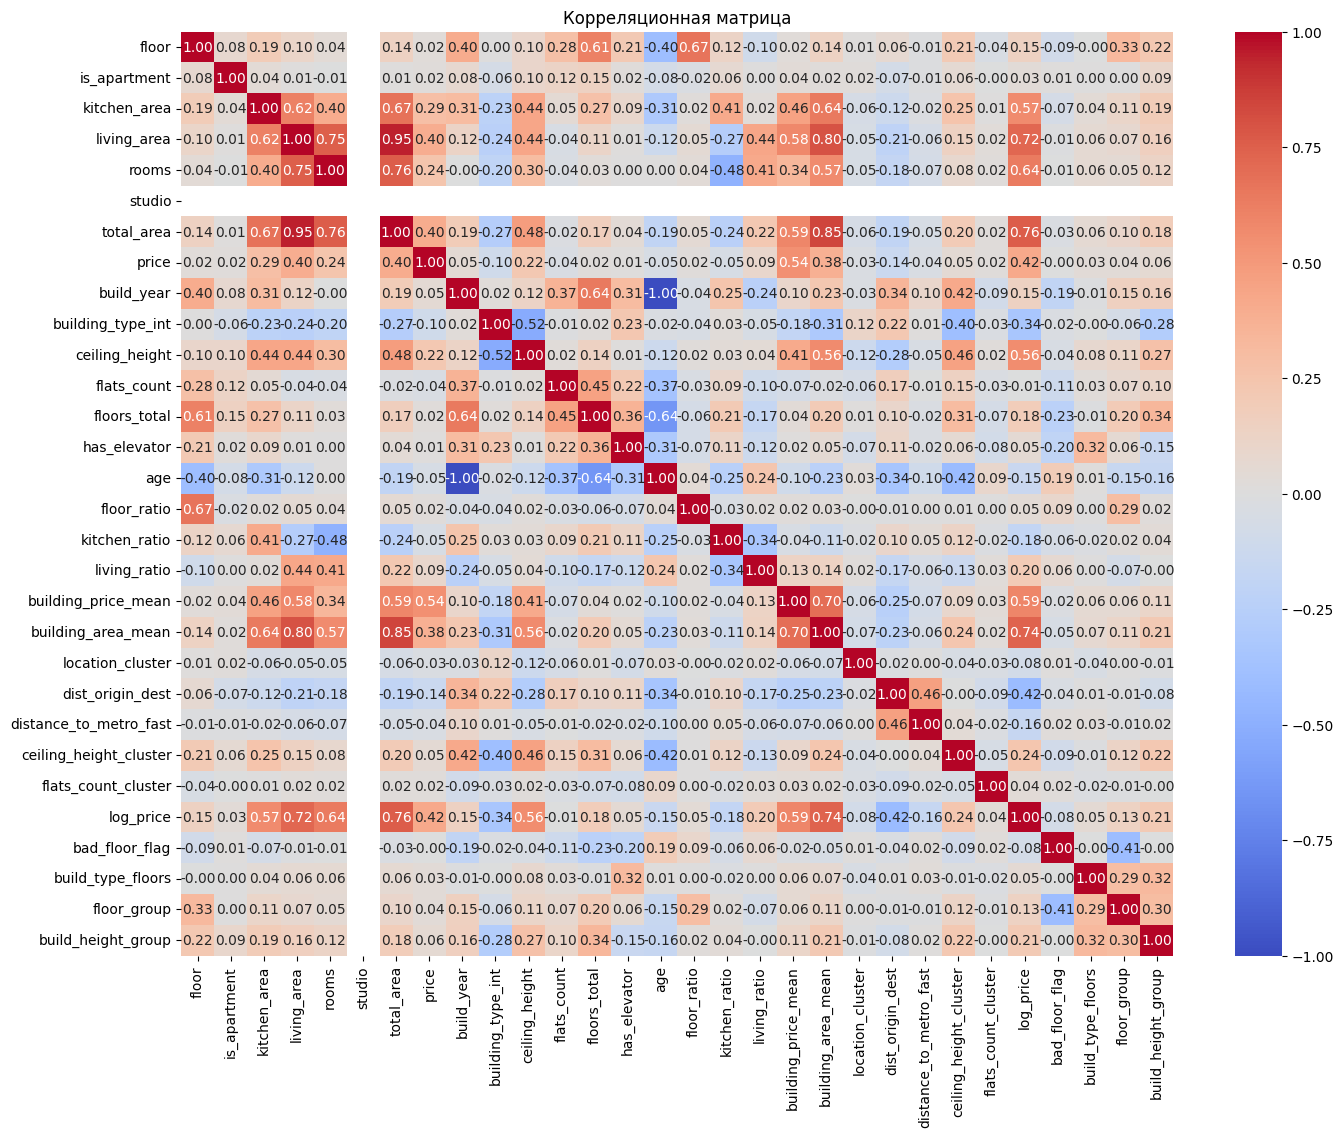

In [11]:
# 4) Проведем повторный корреляционный анализ

from sklearn.compose import ColumnTransformer
from category_encoders import CatBoostEncoder

non_binary_cat_cols = df.select_dtypes(['category','object']).columns
preprocessor = ColumnTransformer(
    [
        ('no_cat', 'passthrough', df.select_dtypes(['int', 'float']).columns),
        ('cat', CatBoostEncoder(return_df=False), non_binary_cat_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

df_transf_CB = pd.DataFrame(preprocessor.fit_transform(df, df['price']), columns=preprocessor.get_feature_names_out())
numeric_only = df.select_dtypes(['int', 'float']).columns
plt.figure(figsize=(16, 12))
corr = df_transf_CB.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
# Особое внимание — на корреляции с price или log_price.

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Correlation_matrix_second_version'))

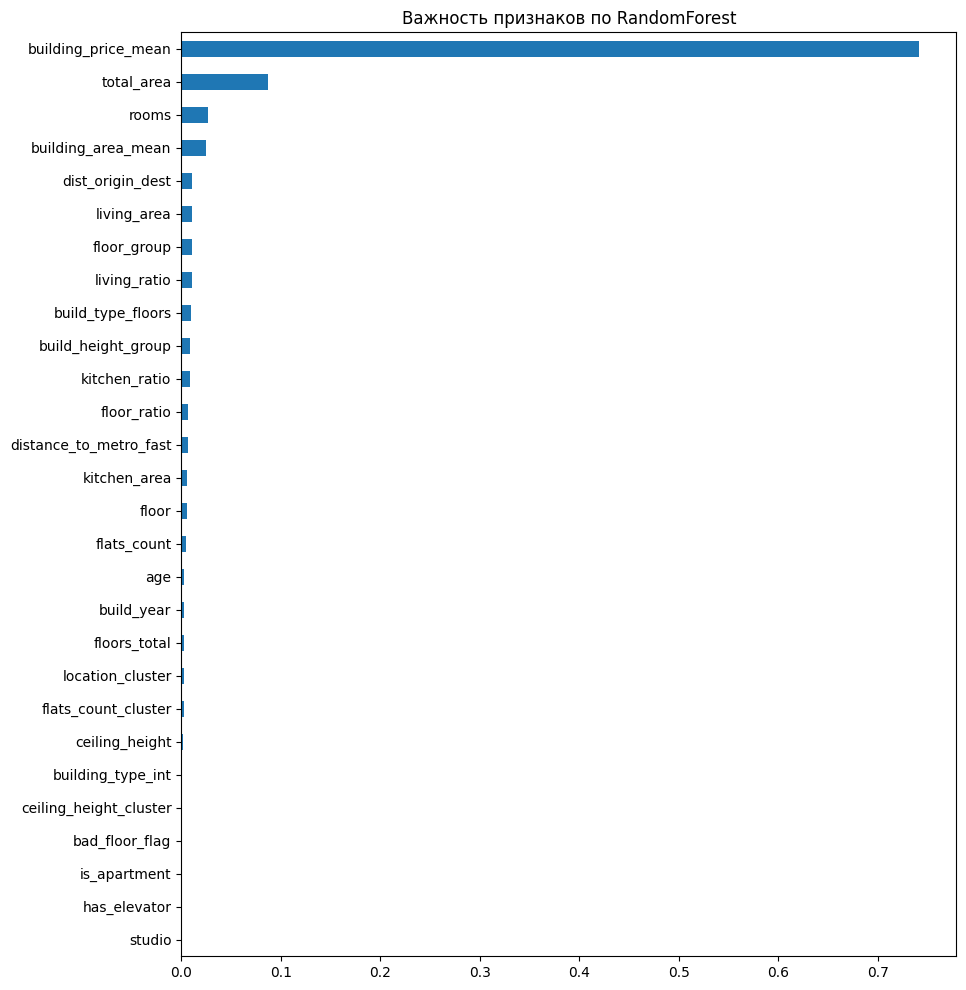

In [12]:
# Посмотрим значимость признаков с новыми

# обучим простую модель RandomForest
from sklearn.ensemble import RandomForestRegressor

features = df_transf_CB.drop(columns=['price', 'log_price'])
target = df_transf_CB['log_price']

# выбираем только числовые признаки
X = features.select_dtypes(include=[np.number]).fillna(0)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, target)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,12))
plt.title('Важность признаков по RandomForest')

plt.savefig(os.path.join(ASSETS_DIR, 'Impotance_numeric_feature_by_RandomForest'))

In [13]:
model

RandomForestRegressor(random_state=42)

In [14]:
# Выводы/гипотезы: 
#  floor_group - слабоположительное влияние, примерно такое же как у living_area - вероятно оствлю в модели
#  build_type_floors и build_height_group - слабоположительное влияние, примерно одинаковые, но в корреляционном анализе
#                                           влияние build_height_group сильнее 0.21 к 0.05, поэтому в модели оставлю его 
#  bad_floor_flag - слабоотрицательное влияние, но по RandomForest не важная фича, возможно уберу.

In [16]:
# SHAP для оценки влияния bad_floor_flag, build_type_floors, floor_group, build_height_group
import shap

# используем ранее обучнную модель RandomForest
explainer = shap.Explainer(model.predict, X.head(1000))
shap_values = explainer(X.head(1000))

PermutationExplainer explainer: 1001it [11:56,  1.38it/s]                          


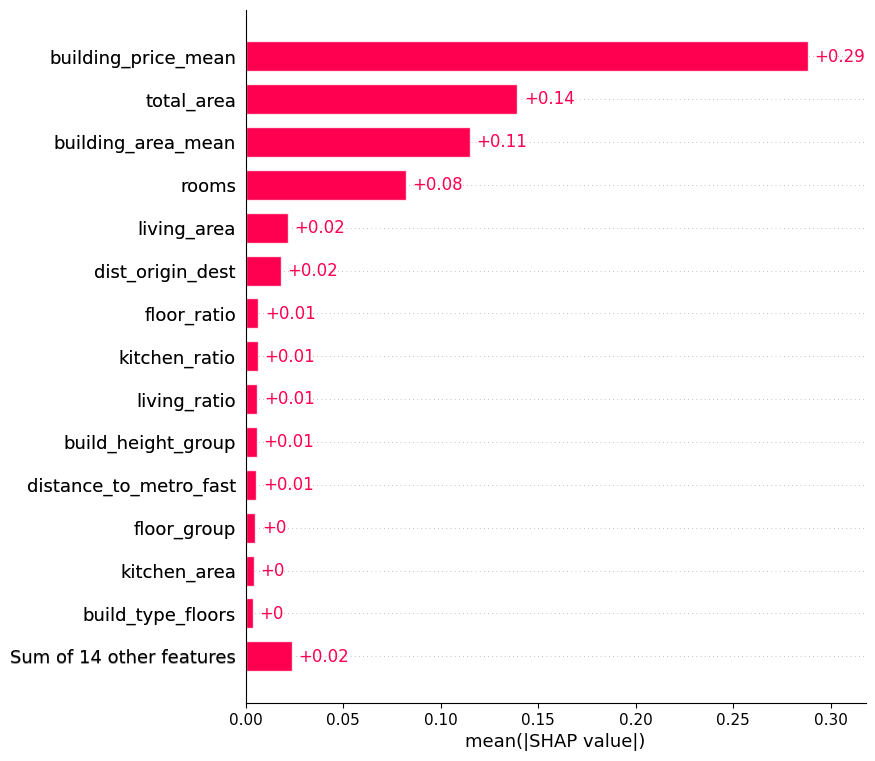

<Figure size 640x480 with 0 Axes>

In [17]:
shap.plots.bar(shap_values, max_display=15)
plt.savefig(os.path.join(ASSETS_DIR, 'Impotance_numeric_feature_by_RandomForest_2'))

In [ ]:
# по оценке SHAP bad_floor_flag, build_type_floors, floor_group, build_height_group не оказывают никакого 
# влияния на предсказания.

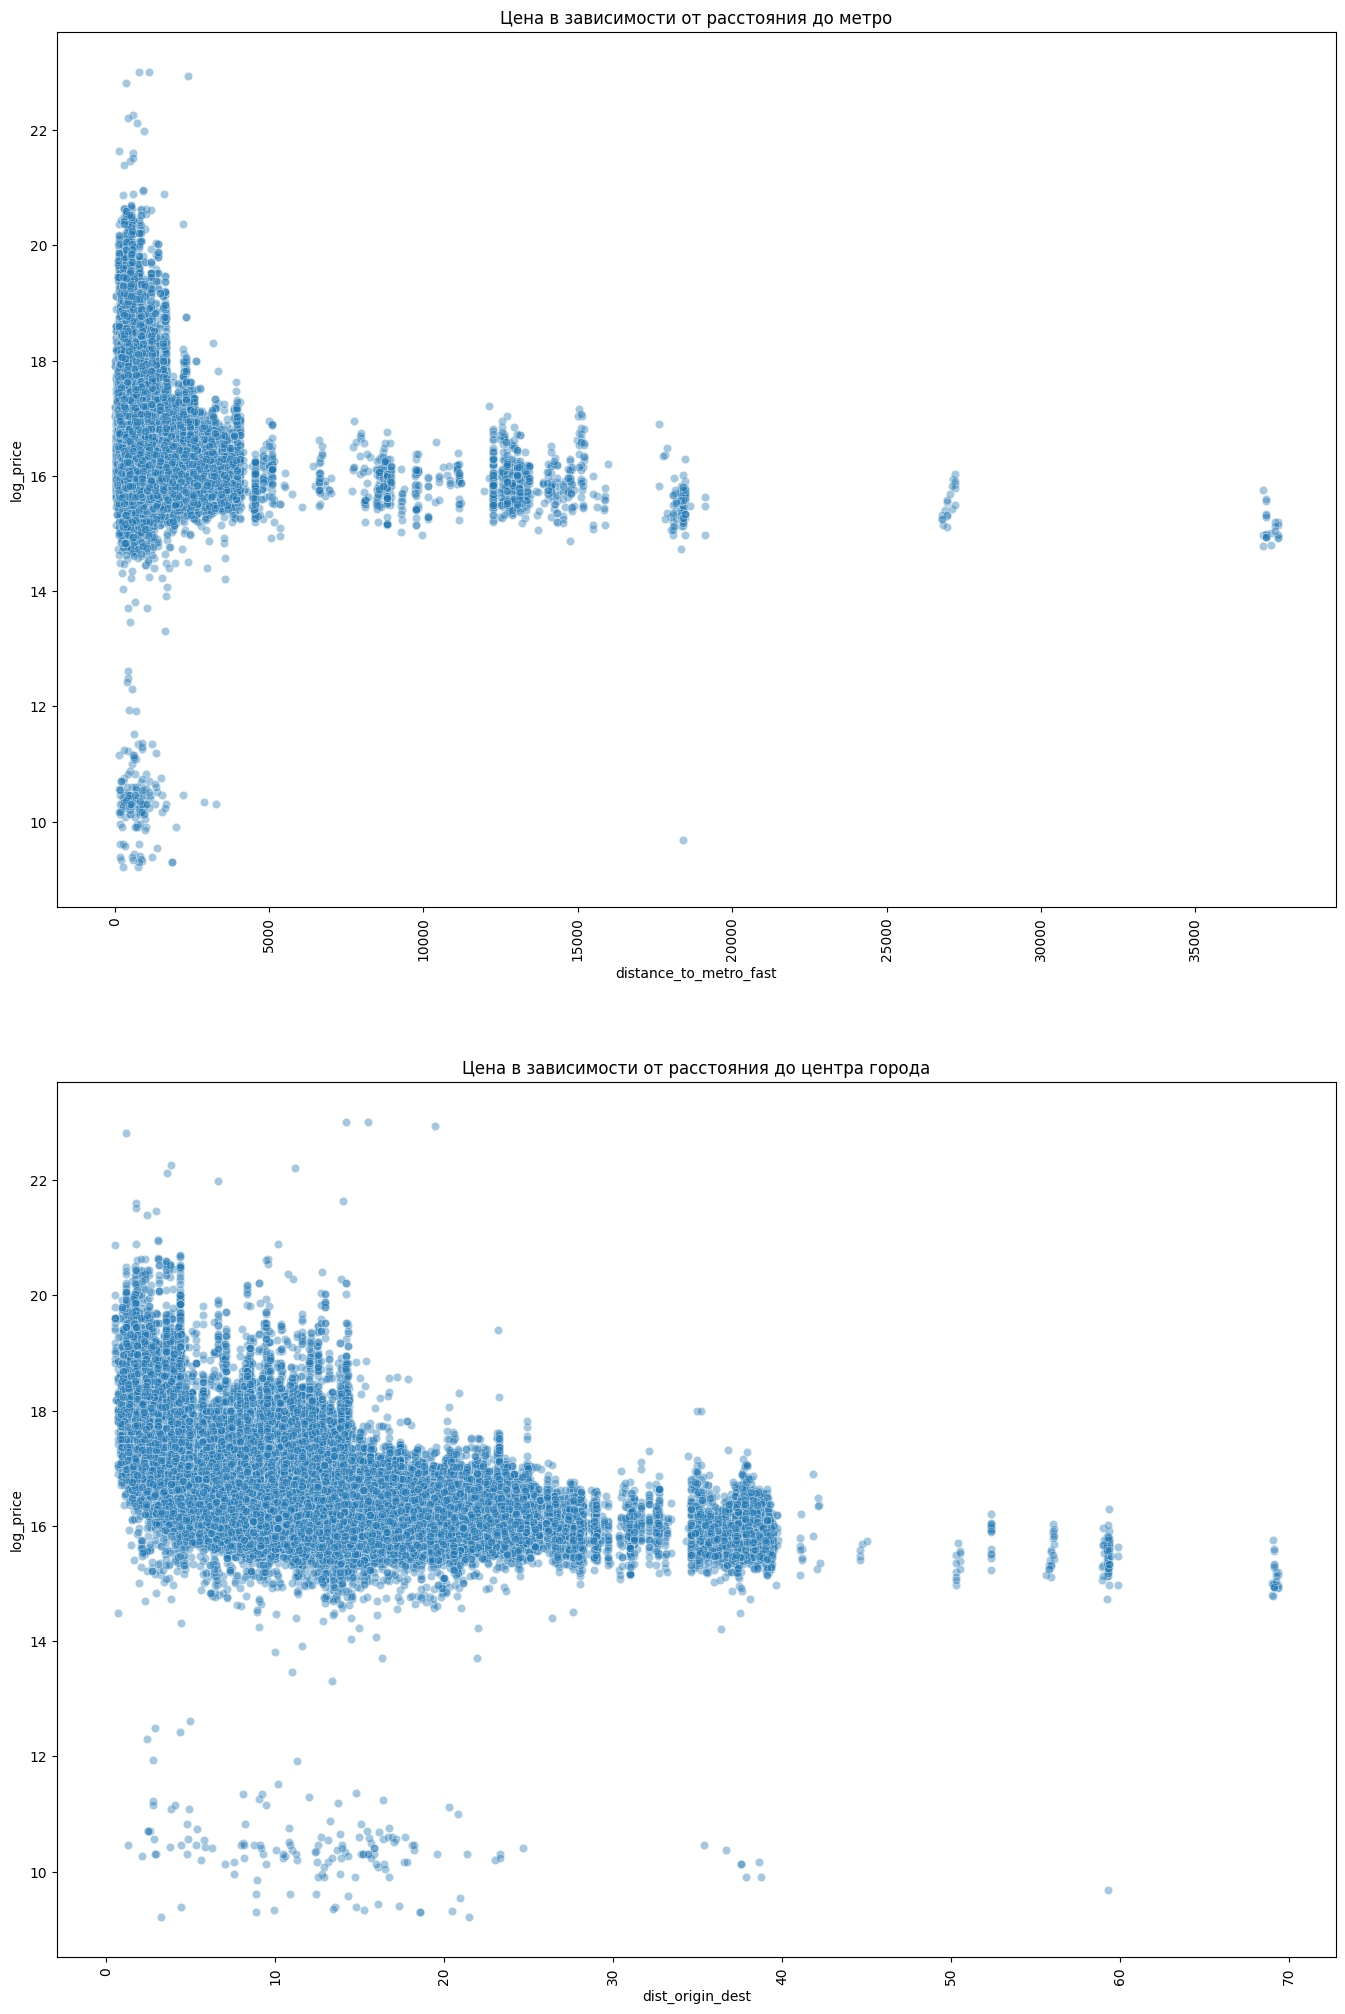

In [14]:
# 8. Удаленность от центра и метро

fig, axs = plt.subplots(2, 1)
#fig.tight_layout(pad=1.2)
fig.set_size_inches(16.5, 25, forward=True) 

x = 'distance_to_metro_fast'
y = 'log_price'
sns.scatterplot(x=x, y=y, data=df, alpha=0.4, ax=axs[0])
axs[0].set_title('Цена в зависимости от расстояния до метро')
axs[0].tick_params(axis='x', labelrotation=90)


x = 'dist_origin_dest'
sns.scatterplot(x=x, y=y, data=df, alpha=0.4, ax=axs[1])
axs[1].set_title('Цена в зависимости от расстояния до центра города')
axs[1].tick_params(axis='x', labelrotation=90)

plt.savefig(os.path.join(ASSETS_DIR, 'Log_Price_dependence_to_metro_center_city'))

In [ ]:
# Ожидаемо - цена выже чем блице к метро или к центру города

In [31]:
# 9. Проверка выбросов

from scipy.stats import zscore

z_scores = np.abs(zscore(df[numeric_features]))
outliers = (z_scores > 3).sum(axis=0)
outliers[outliers>0]

total_area                2248
kitchen_area              2402
living_area               2092
floor                     1465
floors_total              1839
ceiling_height            1334
age                       1059
kitchen_ratio             1867
living_ratio               379
building_price_mean       1657
building_area_mean        2689
dist_origin_dest          2919
distance_to_metro_fast     996
dtype: int64

In [ ]:
# Это достаточно много — скорее всего:
# - Данные имеют асимметрию или длинные хвосты (например, в area).
# - z-score может быть неоптимален для таких распределений — он чувствителен к ненормальности.

# Варианты действий с выбросами:
# 1: Ничего не делать, модели вроде CatBoost, RandomForest, Tree-based не боятся выбросов. Можно оставить как есть.
# 2: Удалить выбросы
# 3: Ограничить значения вручную (например при помощи clip)
# 4: Использовать более устойчивые методы обнаружения выбросов, например IQR (межквартильный размах)

In [ ]:
# Обрезаем total_area по 1 и 99 перцентилям
low, high = df['total_area'].quantile([0.01, 0.99])
df['total_area_clipped'] = df['total_area'].clip(lower=low, upper=high)

In [43]:
df[['total_area', 'total_area_clipped']].min()

total_area            11.0
total_area_clipped    29.0
dtype: float64

In [44]:
df[['total_area', 'total_area_clipped']].max()

total_area            920.0
total_area_clipped    220.0
dtype: float64

In [45]:
# Обрезаем kitchen_area по 1 и 99 перцентилям
low, high = df['kitchen_area'].quantile([0.01, 0.99])
df['kitchen_area_clipped'] = df['kitchen_area'].clip(lower=low, upper=high)

In [47]:
df[['kitchen_area', 'kitchen_area_clipped']].min()

kitchen_area            0.1
kitchen_area_clipped    5.0
dtype: float64

In [48]:
df[['kitchen_area', 'kitchen_area_clipped']].max()

kitchen_area            436.299988
kitchen_area_clipped     40.000000
dtype: float64

In [49]:
# Обрезаем Living_area по 1 и 99 перцентилям
low, high = df['living_area'].quantile([0.01, 0.99])
df['living_area_clipped'] = df['living_area'].clip(lower=low, upper=high)

In [50]:
df[['living_area', 'living_area_clipped']].min()

living_area             2.0000
living_area_clipped    14.3372
dtype: float64

In [ ]:
df[['living_area', 'living_area_clipped']].max()

living_area            836.363636
living_area_clipped    160.000000
dtype: float64

In [52]:
# пересчитаем колонки
df['kitchen_ratio'] = df['kitchen_area_clipped'].div(df['total_area_clipped'], axis=0)
df['living_ratio'] = df['living_area_clipped']/df['total_area_clipped'].values

In [61]:
# переименуем старые и новые колонки
df = df.rename(columns={"living_area": "living_area_old", "kitchen_area": "kitchen_area_old", "total_area": "total_area_old"})
#df.rename(columns={df.columns[6]: 'total_area_old'})
df = df.rename(columns={"living_area_clipped": "living_area", "kitchen_area_clipped": "kitchen_area", "total_area_clipped": "total_area"})

In [74]:
# остальные оставим без изменения

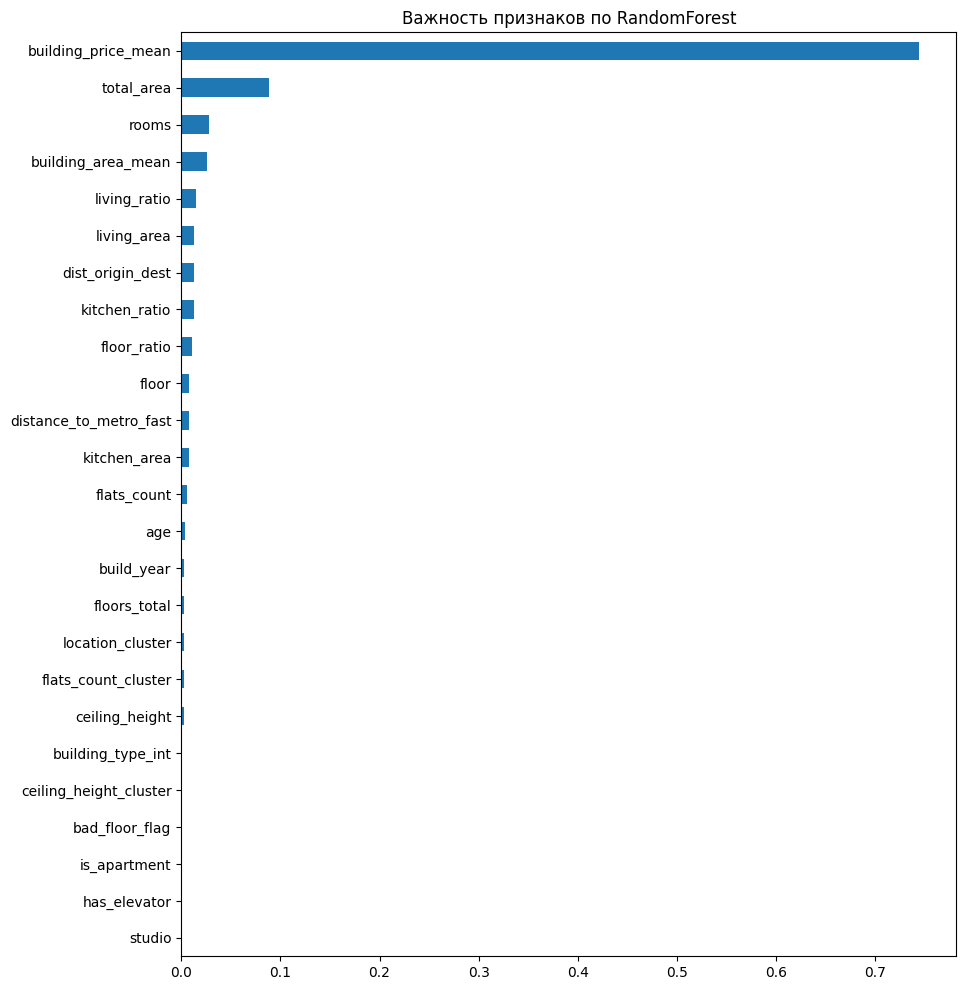

In [79]:
# 10. Посмотрим значимость признаков

# обучим простую модель RandomForest
from sklearn.ensemble import RandomForestRegressor

features = df[df.columns.difference(['living_area_old','kitchen_area_old','total_area_old'])].drop(columns=['price', 'log_price'])
target = df['log_price']

# выбираем только числовые признаки
X = features.select_dtypes(include=[np.number]).fillna(0)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, target)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,12))
plt.title('Важность признаков по RandomForest')

plt.savefig(os.path.join(ASSETS_DIR, 'Impotance_numeric_feature_by_RandomForest'))

In [ ]:
# Вывод: Наиболее знчимые по версии RandomForest: building_price_mean, total_area, rooms, building_area_mean,
# living_ratio, living_area, dist_origin_dest, kitchen_ratio, floor_ratio, kitchen_area, floor,
# distance_to_metro_fast, kitchen_area

In [80]:
# сохраняем данные
os.makedirs('../data', exist_ok=True)
with open('../data/transform_data_EDA.csv', 'wb') as fd:
    df.to_csv('../data/transform_data_EDA.csv', index=None)

In [81]:
df.head(5)

floor  is_apartment  kitchen_area_old  living_area_old  rooms  studio   
0      9             0               9.9        19.900000      1       0  \
1      7             0              16.6        26.400000      1       0   
2      9             0               9.0        32.000000      2       0   
3      1             0              10.1        43.099998      3       0   
4      3             0               3.0        14.000000      1       0   

   total_area_old     price  build_year  building_type_int  ...   
0       35.099998   9500000        1965                  6  ...  \
1       43.000000  13500000        2001                  2  ...   
2       56.000000  13500000        2000                  4  ...   
3       76.000000  20000000        2002                  4  ...   
4       24.000000   5200000        1971                  1  ...   

   distance_to_metro_fast  ceiling_height_cluster  flats_count_cluster   
0              732.967724                       0                    5  \
1              525.649516                       4                    7   
2              538.689763                       5                    5   
3              815.506000                       0                    8   
4             1442.654973                       0                    1   

   log_price floor_group  build_height_group  bad_floor_flag  total_area   
0  16.066802     высокий             высотка               0   35.099998  \
1  16.418200     средний             высотка               0   43.000000   
2  16.418200     высокий             высотка               0   56.000000   
3  16.811243         1-й             высотка               1   76.000000   
4  15.464169      низкий        среднеэтажка               0   29.000000   

   kitchen_area  living_area  
0           9.9    19.900000  
1          16.6    26.400000  
2           9.0    32.000000  
3          10.1    43.099998  
4           5.0    14.337200  

[5 rows x 33 columns]

In [86]:
# 11. Проверка значимости категориальных признакова

from scipy.stats import f_oneway, kruskal

categorical_features = ['is_apartment', 
                        'has_elevator', 
                        'building_type_int', 
                        'build_type_floors', 
                        'location_cluster', 
                        'ceiling_height_cluster', 
                        'flats_count_cluster',
                        'build_height_group',
                        'floor_group']
results = {}

for feature in categorical_features:
    groups = [group['log_price'].values for _, group in df.groupby(feature)]
    
    # ANOVA
    anova_p = f_oneway(*groups).pvalue
    
    # Kruskal-Wallis
    kruskal_p = kruskal(*groups).pvalue
    
    results[feature] = {
        'ANOVA p-value': anova_p,
        'Kruskal-Wallis p-value': kruskal_p
    }

pd.DataFrame(results).T

ANOVA p-value  Kruskal-Wallis p-value
is_apartment             7.351010e-31            7.357103e-59
has_elevator             6.408627e-70           1.525629e-135
building_type_int        0.000000e+00            0.000000e+00
build_type_floors       1.641469e-252            0.000000e+00
location_cluster         0.000000e+00            0.000000e+00
ceiling_height_cluster   0.000000e+00            0.000000e+00
flats_count_cluster     6.186196e-320           1.506695e-227
build_height_group       0.000000e+00            0.000000e+00
floor_group              0.000000e+00            0.000000e+00

In [87]:
# (Для запоминания и более детельного изучения) Интерпретация:
# - p-value < 0.05 — статистически значимое различие между группами.
# - ANOVA — предполагает нормальность (более чувствителен к выбросам).
# - Kruskal-Wallis — непараметрический аналог, устойчив к выбросам и ненормальности.

# Вывод: Получились очень маленькие p-value для всех категориальных признаков — как по ANOVA, 
# так и по Kruskal-Wallis следовательно это значит что высокая статистическая значимость этих признаков.

In [88]:
# проверка на выбросы
num_cols = df.select_dtypes(['float', 'int']).columns#.drop({'latitude', 'longitude'})

In [89]:
threshold = 1.5
potential_outliers = pd.DataFrame()

In [90]:
print('min: ',df['price'].min(), ' max:', df['price'].max())

min:  10000  max: 9873737728


In [91]:
for col in num_cols:
    Q1 = df[col].min() 
    Q3 = df[col].max() 
    IQR = Q3 - Q1 
    margin =threshold * IQR 
    lower = Q1 - margin
    upper = Q3 + margin
    potential_outliers[col] = ~df[col].between(lower, upper)

In [92]:
potential_outliers.value_counts()

floor  is_apartment  kitchen_area_old  living_area_old  rooms  studio  total_area_old  price  build_year  building_type_int  ceiling_height  flats_count  floors_total  has_elevator  age    floor_ratio  kitchen_ratio  living_ratio  building_price_mean  building_area_mean  location_cluster  dist_origin_dest  distance_to_metro_fast  ceiling_height_cluster  flats_count_cluster  log_price  bad_floor_flag  total_area  kitchen_area  living_area
False  False         False             False            False  False   False           False  False       False              False           False        False         False         False  False        False          False         False                False               False             False             False                   False                   False                False      False           False       False         False          123937
Name: count, dtype: int64

In [93]:
Q_mean = df['ceiling_height'].mean()
Q_mean

2.7502206428564797

In [94]:
margin =2 * Q_mean
margin

5.500441285712959

In [95]:
lower = Q_mean - margin
upper = Q_mean + margin
potential_outliers = ~df['ceiling_height'].between(lower, upper)
potential_outliers.unique()

array([False])

In [96]:
df.query('ceiling_height>@upper', engine='python')

Empty DataFrame
Columns: [floor, is_apartment, kitchen_area_old, living_area_old, rooms, studio, total_area_old, price, build_year, building_type_int, ceiling_height, flats_count, floors_total, has_elevator, build_type_floors, age, floor_ratio, kitchen_ratio, living_ratio, building_price_mean, building_area_mean, location_cluster, dist_origin_dest, distance_to_metro_fast, ceiling_height_cluster, flats_count_cluster, log_price, floor_group, build_height_group, bad_floor_flag, total_area, kitchen_area, living_area]
Index: []

[0 rows x 33 columns]

In [ ]:
# сделано
# df.loc[df.query('ceiling_height>@upper', engine='python').index, 'ceiling_height'] = df.loc[df.query('ceiling_height>@upper', engine='python').index, 'ceiling_height'] /10

In [97]:
df['ceiling_height'].max()

8.0

In [98]:
# 2.5 Выводы после EDA

In [ ]:
# Зависимость цены (log_price) от is_apartment
# - is_apartment имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с floors_total или
# dist_origin_dest, distance_to_metro_fast (например, если далеко от центра города или метро  — это может быть минус).

# Зависимость цены (log_price) от has_elevator
# - has_elevator имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с location_cluster 
# или (например, если этажность > 5 и лифта нет — это может быть минус).

# Зависимость цены (log_price) от building_type_int
# - building_type_int имеет информативность и отражает 
# ценовой уровень района, можно использовать в моделе (через OneHotEncoding).

# Зависимость цены (log_price) от build_type_floors
# - build_type_floors имеет слабую предсказательную силу.

# Зависимость цены (log_price) от location_cluster
# - location_cluster имеет информативность и отражает ценовой уровень района, можно использовать 
# в моделе (через OneHotEncoding).

# Зависимость цены (log_price) от ceiling_height_cluster
# - ceiling_height_cluster имеет информативность и отражает ценовой уровень квартиры, можно использовать 
# в моделе (через OneHotEncoding).

# Зависимость цены (log_price) от flats_count_cluster
# - floor_group - слабоположительное влияние, примерно такое же как у living_area - вероятно оставлю в модели
# - build_type_floors и build_height_group - слабоположительное влияние, примерно одинаковые, но в корреляционном анализе
#                                           влияние build_height_group сильнее 0.21 к 0.05, поэтому в модели оставлю его 
# - bad_floor_flag - слабоотрицательное влияние, но по RandomForest не важная фича, возможно уберу на последующих этапах.

# Наиболее значимые по версии RandomForest: building_price_mean, total_area, rooms, building_area_mean,
# living_ratio, living_area, dist_origin_dest, kitchen_ratio, floor_ratio, kitchen_area, floor,
# distance_to_metro_fast, kitchen_area

# Данные имеют асимметрию или длинные хвосты (например, в area).
# Варианты поступил так:
# Ограничил значения в некоторых столбцах (..._area) вручную при помощи clip, остальные оставил без изменения. 
# одели вроде CatBoost, RandomForest, Tree-based не боятся выбросов. Можно оставить как есть. В ручную 
# откорректировал мах высоту потолков (было 27 - стало 8 - если есть 2х уровневые квартиры)


In [ ]:
# Итого: 
# Для сравнения буду использовать 3 набора признаков:

# 1. полный набор признаков (31)

# 2. 
# - числовые: building_price_mean, total_area, rooms, building_area_mean,
# living_ratio, living_area, dist_origin_dest, kitchen_ratio, floor_ratio, kitchen_area, floor,
# distance_to_metro_fast+
# - категории: is_apartment, has_elevator, building_type_int, build_type_floors, location_cluster, 
# ceiling_height_cluster, flats_count_cluster, build_height_group, floor_group (21)

# 3. 
# - отобрал по карте корреляционного анализа: kitchen_area, living_area, rooms, total_area, ceiling_height
# building_price_mean, building_area_mean, ceiling_height_cluster, build_height_group, living_ratio (положительное влияние),
# building_type_int, dist_origin_dest, distance_to_metro_fast, age (отрицательное влияние) (14)

In [1]:
# ===========================================================
# %% -- Обучение модели на выбранных наборах фичей
# ===========================================================

# импорт библиотек
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             mean_absolute_percentage_error,
                             mean_squared_log_error,
                             median_absolute_error, 
                             r2_score
                             )
from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
import numpy as np
import os
import joblib
import pandas as pd
import mlflow
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, 
    OneHotEncoder, 
    OrdinalEncoder
    )
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from dotenv import load_dotenv

In [187]:
# 1 загрузка модели
if os.path.exists('../models/fitted_model_CBR.pkl'):
    with open('../models/fitted_model_CBR.pkl', 'rb') as fd:
        model_first_set = joblib.load(fd)

In [305]:
# 2. загрузка датасета 

pd.options.display.max_columns = 100
pd.options.display.max_rows = 64

if os.path.exists('../data/transform_data_EDA.csv'):
    df = pd.read_csv('../data/transform_data_EDA.csv')
    
df.head(5)

floor  is_apartment  kitchen_area_old  living_area_old  rooms  studio   
0      9             0               9.9        19.900000      1       0  \
1      7             0              16.6        26.400000      1       0   
2      9             0               9.0        32.000000      2       0   
3      1             0              10.1        43.099998      3       0   
4      3             0               3.0        14.000000      1       0   

   total_area_old     price  build_year  building_type_int  ceiling_height   
0       35.099998   9500000        1965                  6            2.64  \
1       43.000000  13500000        2001                  2            3.00   
2       56.000000  13500000        2000                  4            2.70   
3       76.000000  20000000        2002                  4            2.64   
4       24.000000   5200000        1971                  1            2.60   

   flats_count  floors_total  has_elevator build_type_floors  age   
0           84            12             1         high_rise   60  \
1           97            10             1         high_rise   24   
2           80            10             1         high_rise   25   
3          771            17             1         high_rise   23   
4          208             9             1       multy_story   54   

   floor_ratio  kitchen_ratio  living_ratio  building_price_mean   
0     0.750000       0.282051      0.566952         9.100000e+06  \
1     0.700000       0.386047      0.613953         1.873333e+07   
2     0.900000       0.160714      0.571429         1.518333e+07   
3     0.058824       0.132895      0.567105         1.477082e+07   
4     0.333333       0.172414      0.494386         7.580000e+06   

   building_area_mean  location_cluster  dist_origin_dest   
0           41.049999                 9         11.107508  \
1           55.966667                 1          4.772297   
2           60.533333                 9          9.277185   
3           50.200000                 7          9.359522   
4           28.218750                 1          8.534197   

   distance_to_metro_fast  ceiling_height_cluster  flats_count_cluster   
0              732.967724                       0                    5  \
1              525.649516                       4                    7   
2              538.689763                       5                    5   
3              815.506000                       0                    8   
4             1442.654973                       0                    1   

   log_price floor_group build_height_group  bad_floor_flag  total_area   
0  16.066802     высокий            высотка               0   35.099998  \
1  16.418200     средний            высотка               0   43.000000   
2  16.418200     высокий            высотка               0   56.000000   
3  16.811243         1-й            высотка               1   76.000000   
4  15.464169      низкий       среднеэтажка               0   29.000000   

   kitchen_area  living_area  
0           9.9    19.900000  
1          16.6    26.400000  
2           9.0    32.000000  
3          10.1    43.099998  
4           5.0    14.337200

In [306]:
y = df['log_price']
df.drop(columns=['log_price', 'price'], inplace=True)
X = df

cat_features = df.select_dtypes(include=['object','category'])  # TO-DO + 'location_cluster','ceiling_height_cluster','flats_count_cluster'
potential_binary_features = df.nunique() == 2
potential_binary_features.studio = True

binary_cat_features = df[potential_binary_features[potential_binary_features].index]
other_cat_features = cat_features
num_features = df.select_dtypes(['float','int'])
# уберем из числовых бинарные признаки
num_features.drop(columns=potential_binary_features[potential_binary_features].index, inplace=True) 
# уберем из числовых кластера
num_features.drop(columns=['location_cluster','ceiling_height_cluster','flats_count_cluster'], inplace=True) 


In [307]:
binary_cat_features.shape[1] + num_features.shape[1] + other_cat_features.shape[1]+ np.array(['location_cluster','ceiling_height_cluster','flats_count_cluster']).shape[0]

31

In [308]:
model_first_set = CatBoostRegressor(iterations=1000,
                                    learning_rate=0.05,
                                    depth=8,
                                    eval_metric='RMSE',
                                    #cat_features=cat_feature_indices,
                                    verbose=100,
                                    early_stopping_rounds=50
                                    )

In [309]:
preprocessor = ColumnTransformer(
        [
            ('binary', StandardScaler(), binary_cat_features.columns.tolist()),
            ('cat', OneHotEncoder(handle_unknown='ignore'), other_cat_features.columns.tolist() + ['location_cluster','ceiling_height_cluster','flats_count_cluster']),
            ('num', StandardScaler(), num_features.columns.tolist())
        ],
        remainder='drop',
        verbose_feature_names_out=False
    )

In [310]:
#cat_feature_indices = list(range(len(binary_cat_features.columns) + len(other_cat_features.columns) + 4))

pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', model_first_set)
    ]
)

In [311]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  ['is_apartment', 'studio',
                                                   'has_elevator',
                                                   'bad_floor_flag']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_type_floors',
                                                   'floor_group',
                                                   'build_height_group',
                                                   'location_cluster',
                                                   'ceiling_height_cluster',
                                                   'flats_count_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['floo...
                                                   'building_type_int',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'age',
                                                   'floor_ratio',
                                                   'kitchen_ratio',
                                                   'living_ratio',
                                                   'building_price_mean',
                                                   'building_area_mean',
                                                   'dist_origin_dest',
                                                   'distance_to_metro_fast',
                                                   'total_area', 'kitchen_area',
                                                   'living_area'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a216aa10>)])

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

X_test_first = X_test

In [313]:
# обучим пайплайн
pipeline.fit(X_train, y_train)

0:	learn: 0.6506956	total: 43.5ms	remaining: 43.5s
100:	learn: 0.2681828	total: 3.63s	remaining: 32.3s
200:	learn: 0.2554217	total: 7.15s	remaining: 28.4s
300:	learn: 0.2481859	total: 10.6s	remaining: 24.6s
400:	learn: 0.2421981	total: 14s	remaining: 20.9s
500:	learn: 0.2378666	total: 17.4s	remaining: 17.4s
600:	learn: 0.2342724	total: 20.8s	remaining: 13.8s
700:	learn: 0.2309012	total: 25s	remaining: 10.7s
800:	learn: 0.2279136	total: 28.5s	remaining: 7.08s
900:	learn: 0.2246797	total: 32s	remaining: 3.52s
999:	learn: 0.2219749	total: 35.6s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  ['is_apartment', 'studio',
                                                   'has_elevator',
                                                   'bad_floor_flag']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_type_floors',
                                                   'floor_group',
                                                   'build_height_group',
                                                   'location_cluster',
                                                   'ceiling_height_cluster',
                                                   'flats_count_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['floo...
                                                   'building_type_int',
                                                   'ceiling_height',
                                                   'flats_count',
                                                   'floors_total', 'age',
                                                   'floor_ratio',
                                                   'kitchen_ratio',
                                                   'living_ratio',
                                                   'building_price_mean',
                                                   'building_area_mean',
                                                   'dist_origin_dest',
                                                   'distance_to_metro_fast',
                                                   'total_area', 'kitchen_area',
                                                   'living_area'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a216aa10>)])

In [314]:
# получим предсказания для тестовой выборки
y_pred = pipeline.predict(X_test)
y_pred_first = y_pred

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_real = np.expm1(y_pred)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)

#mae_pct = (np.exp(mae) - 1) * 100
#rmse_pct = (np.exp(rmse) - 1) * 100

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

MAE ≈ 3532582.7
RMSE ≈ 55956099.8


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [320]:
# посчитаем метрики
evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_real)

def calculate_mspe(actual, predicted):
    squared_errors = np.power(actual - predicted, 2)
    return np.mean(squared_errors)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
metrics_1 = {}
mae = mean_absolute_error(y_test_real, y_pred_real) # Средняя абсолютная ошибка (MAE) {является линейной оценкой, а это значит, что все ошибки в среднем взвешены одинаково.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений по модулю}
mse = mean_squared_error(y_test_real, y_pred_real)  # Среднеквадратичная ошибка (MSE) {для справки: проверяет допускает ли модель большие ошибки => 
                                                    # чем меньше, тем лучше. MSE настроена на отражение влияния именно больших ошибок на качество модели.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате}
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)  # Корень из среднеквадратичной ошибки (RMSE) {RMSE чувствительна к аномальным значениям.
                                                                    # # чтобы придать значению MSE размерность исходных данных, из него извлекается квадратный корень}
mspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=False)   # Среднеквадратичная ошибка в процентах (MSPE)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=True)   # вычисляется среднеквадратичная процентная ошибка (RMSPE).
medae = median_absolute_error(y_test_real, y_pred_real) # медиана абсолютных ошибок (MEDAE)
r2 = r2_score(y_test_real, y_pred_real)             # Коэффициент детерминации R-квадрат. { в каком-то смысле аналог точности в процентах, но только для задачи регрессии
                                                    # 1) R^2 = 1 — модель идеально предсказывает данные;
                                                    # 2) R^2 = 0 — прогнозы модели соответствуют среднему арифметическому фактических целевых значений;
                                                    # 3) R^2 < 0 — модель работает хуже, чем простое использование среднего значения фактических целевых значений 
                                                    # (обычно это связано с тем, что модель обучалась на данных, в которые попали большие выбросы).}
r2_adj = adjusted_r2_score(y_test_real, y_pred_real, X.shape) # Скорректированный коэффициент детеминации.
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100 # Средняя абсолютная ошибка в процентах (MAPE) {ошибка составила ХХ% от фактического значения
                                                                        # позволяет оценить в процентах насколько прогнозы модели отличаются относительно реальных значений}
smape = mean_absolute_percentage_error(y_test_real, y_pred_real)    # Cимметричная средняя абсолютная процентная ошибка (SMAPE) {для справки: взвешенную версию MSE
                                                                    # используется когда MAPE не подходит для случаев, когда хотя бы одно фактическое значение равно нулю, что видно из формулы}
mre = evaluator.mean_relative_error()*100   # Средняя относительная ошибка (MRE). {Она измеряет относительную разницу между фактическими и предсказанными значениями. MRE выражается в 
                                            # процентах и позволяет понять, насколько точно модель предсказывает результаты.
                                            # Более низкое значение MRE означает более точную модель
                                            # Менее 10% — высокая точность модели;
                                            # 10-20% — хорошая точность модели;
                                            # 20-30% — умеренная точность модели;
                                            # Более 30% — низкая точность модели.}
msle = mean_squared_log_error(y_test_real, y_pred_real) # Среднеквадратичная логарифмическая ошибка (MSLE) {переход к относительным ошибкам т.е их измерение в логарифмическом масштабе.
                                                        # Данная метрика более устойчива к выбросам, поскольку делает распределение целевых и спрогнозированных значений более однородным}
rmsle = np.sqrt(msle)   # Среднеквадратичная логарифмическая ошибка (RMSLE) { чтобы оценить значение MSLE относительно размерности исходных данных, используется Root Mean Squared Logarithmic Error}.
wape = wape_score(y_test_real, y_pred_real) # для учета относительной значимости наблюдений т.к MAPE плохо работает с неравномерными данными

metrics_1 = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "MSPE": mspe,
    "RMSPE": rmspe,
    "MedAE": medae,
    "MAPE_proc": mape,
    "SMAPE": smape,
    "MRE": mre,
    "MSLE": msle,
    "RMSLE": rmsle,
    "R_2": r2,
    "Adjusted R_2": r2_adj,
    "WAPE": wape
}


# Средняя абсолютная масштабированная ошибка (MASE):
# Средняя абсолютная масштабированная ошибка (Mean absolute scaled error) — это показатель, который позволяет сравнивать две модели. 
# Если поместить MAE для новой модели в числитель, а MAE для исходной модели в знаменатель, то полученное отношение и будет равно 
# MASE. Если значение MASE меньше 1, то новая модель работает лучше, если MASE равно 1, то модели работают одинаково, а если значение 
# MASE больше 1, то исходная модель работает лучше, чем новая модель. Формула для расчета MASE имеет вид:
# MASE= MAEj/MAEi. MASE симметрична и устойчива к выбросам.

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [321]:
metrics_1

{'MAE': 3532582.674518879,
 'MSE': 3131085108350579.0,
 'RMSE': 55956099.831480205,
 'MSPE': 130.69347644276056,
 'RMSPE': 11.432124756262965,
 'MedAE': 1368294.8747047307,
 'MAPE_proc': 44.36463294789109,
 'SMAPE': 0.4436463294789109,
 'MRE': 44.36463294789109,
 'MSLE': 0.07123176554070118,
 'RMSLE': 0.26689279784344344,
 'R_2': 0.30654099056968676,
 'Adjusted R_2': 0.3063674928957242,
 'WAPE': 0.18151552214192332}

In [322]:
mae_first_set_model = mae
mae_first_set_model

3532582.674518879

In [254]:
# формируем второй сэт признаков
# 2. 
# - числовые: building_price_mean, total_area, rooms, building_area_mean,
# living_ratio, living_area, dist_origin_dest, kitchen_ratio, floor_ratio, kitchen_area, floor,
# distance_to_metro_fast, kitchen_area +
# - категории: is_apartment, has_elevator, building_type_int, build_type_floors, location_cluster, 
# ceiling_height_cluster, flats_count_cluster, build_height_group, floor_group (21)
X2=df[['building_price_mean', 'total_area', 'rooms', 'building_area_mean', 'living_ratio', 'living_area', 'dist_origin_dest', 'kitchen_ratio', 
       'floor_ratio', 'kitchen_area', 'floor', 'distance_to_metro_fast','is_apartment', 'has_elevator', 'building_type_int', 
       'build_type_floors', 'location_cluster', 'ceiling_height_cluster', 'flats_count_cluster', 'build_height_group', 'floor_group']]
X2

building_price_mean  total_area  rooms  building_area_mean   
0              9.100000e+06   35.099998      1           41.049999  \
1              1.873333e+07   43.000000      1           55.966667   
2              1.518333e+07   56.000000      2           60.533333   
3              1.477082e+07   76.000000      3           50.200000   
4              7.580000e+06   29.000000      1           28.218750   
...                     ...         ...    ...                 ...   
123932         1.166721e+07   42.000000      1           56.206061   
123933         7.400000e+06   41.110001      2           41.110001   
123934         1.153600e+07   31.500000      1           34.740000   
123935         9.928524e+06   65.300003      2           62.612903   
123936         1.035000e+07   38.000000      1           48.287500   

        living_ratio  living_area  dist_origin_dest  kitchen_ratio   
0           0.566952    19.900000         11.107508       0.282051  \
1           0.613953    26.400000          4.772297       0.386047   
2           0.571429    32.000000          9.277185       0.160714   
3           0.567105    43.099998          9.359522       0.132895   
4           0.494386    14.337200          8.534197       0.172414   
...              ...          ...               ...            ...   
123932      0.428571    18.000000         23.592220       0.261905   
123933      0.689127    28.330000         10.001394       0.128436   
123934      0.634921    20.000000          8.679756       0.168254   
123935      0.516080    33.700001         21.173320       0.211332   
123936      0.473684    18.000000         13.090044       0.200000   

        floor_ratio  kitchen_area  floor  distance_to_metro_fast   
0          0.750000          9.90      9              732.967724  \
1          0.700000         16.60      7              525.649516   
2          0.900000          9.00      9              538.689763   
3          0.058824         10.10      1              815.506000   
4          0.333333          5.00      3             1442.654973   
...             ...           ...    ...                     ...   
123932     0.640000         11.00     16              985.553180   
123933     1.000000          5.28      5              485.692957   
123934     0.777778          5.30      7              918.864532   
123935     0.600000         13.80     15              891.262531   
123936     0.941176          7.60     16             1838.871405   

        is_apartment  has_elevator  building_type_int build_type_floors   
0                  0             1                  6         high_rise  \
1                  0             1                  2         high_rise   
2                  0             1                  4         high_rise   
3                  0             1                  4         high_rise   
4                  0             1                  1       multy_story   
...              ...           ...                ...               ...   
123932             0             1                  4         high_rise   
123933             0             0                  1          mid_rise   
123934             0             1                  4       multy_story   
123935             0             1                  4         high_rise   
123936             0             1                  4         high_rise   

        location_cluster  ceiling_height_cluster  flats_count_cluster   
0                      9                       0                    5  \
1                      1                       4                    7   
2                      9                       5                    5   
3                      7                       0                    8   
4                      1                       0                    1   
...                  ...                     ...                  ...   
123932                 4                       0                    3   
123933                 9

In [255]:
cat_features = X2.select_dtypes(include=['object','category'])  # TO-DO + 'location_cluster','ceiling_height_cluster','flats_count_cluster'
potential_binary_features = X2.nunique() == 2

binary_cat_features = X2[potential_binary_features[potential_binary_features].index]
other_cat_features = cat_features
num_features = X2.select_dtypes(['float','int'])
# уберем из числовых бинарные признаки
num_features.drop(columns=potential_binary_features[potential_binary_features].index, inplace=True) 
# уберем из числовых кластера
num_features.drop(columns=['location_cluster','ceiling_height_cluster','flats_count_cluster'], inplace=True) 

In [256]:
binary_cat_features.shape[1] + num_features.shape[1] + other_cat_features.shape[1] + np.array(['location_cluster','ceiling_height_cluster','flats_count_cluster']).shape[0]

21

In [257]:
model_second_set = CatBoostRegressor(iterations=1000,
                                    learning_rate=0.05,
                                    depth=8,
                                    eval_metric='RMSE',
                                    #cat_features=cat_feature_indices,
                                    verbose=100,
                                    early_stopping_rounds=50
                                    )

In [258]:
preprocessor_second_set = ColumnTransformer(
        [
            ('binary', StandardScaler(), binary_cat_features.columns.tolist()),
            ('cat', OneHotEncoder(handle_unknown='ignore'), other_cat_features.columns.tolist() + ['location_cluster','ceiling_height_cluster','flats_count_cluster']),
            ('num', StandardScaler(), num_features.columns.tolist())
        ],
        remainder='drop',
        verbose_feature_names_out=False
    )

In [259]:
pipeline_second_set= Pipeline(
    [
        ('preprocessor', preprocessor_second_set),
        ('model', model_second_set)
    ]
)
pipeline_second_set

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  ['is_apartment',
                                                   'has_elevator']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_type_floors',
                                                   'build_height_group',
                                                   'floor_group',
                                                   'location_cluster',
                                                   'ceiling_height_cluster',
                                                   'flats_count_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['building_price_mean',
                                                   'total_area', 'rooms',
                                                   'building_area_mean',
                                                   'living_ratio',
                                                   'living_area',
                                                   'dist_origin_dest',
                                                   'kitchen_ratio',
                                                   'floor_ratio',
                                                   'kitchen_area', 'floor',
                                                   'distance_to_metro_fast',
                                                   'building_type_int'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a52710c0>)])

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    X2,
    y,
    test_size=0.2,
    random_state=42,
)
X_test_second = X_test
X_train.shape

(99149, 21)

In [261]:
# обучим пайплайн для второго сета фичей
pipeline_second_set.fit(X_train, y_train)

0:	learn: 0.6509295	total: 31.3ms	remaining: 31.3s
100:	learn: 0.2691841	total: 3.23s	remaining: 28.8s
200:	learn: 0.2568605	total: 9.6s	remaining: 38.2s
300:	learn: 0.2485947	total: 14s	remaining: 32.5s
400:	learn: 0.2426780	total: 16.6s	remaining: 24.8s
500:	learn: 0.2376839	total: 19s	remaining: 18.9s
600:	learn: 0.2335911	total: 21.4s	remaining: 14.2s
700:	learn: 0.2300762	total: 24s	remaining: 10.2s
800:	learn: 0.2269535	total: 26.4s	remaining: 6.57s
900:	learn: 0.2238026	total: 29.2s	remaining: 3.21s
999:	learn: 0.2211408	total: 31.6s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  ['is_apartment',
                                                   'has_elevator']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_type_floors',
                                                   'build_height_group',
                                                   'floor_group',
                                                   'location_cluster',
                                                   'ceiling_height_cluster',
                                                   'flats_count_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['building_price_mean',
                                                   'total_area', 'rooms',
                                                   'building_area_mean',
                                                   'living_ratio',
                                                   'living_area',
                                                   'dist_origin_dest',
                                                   'kitchen_ratio',
                                                   'floor_ratio',
                                                   'kitchen_area', 'floor',
                                                   'distance_to_metro_fast',
                                                   'building_type_int'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a52710c0>)])

In [262]:
# получим предсказания для тестовой выборки
y_pred = pipeline_second_set.predict(X_test)
y_pred_second = y_pred

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_real = np.expm1(y_pred)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)

#mae_pct = (np.exp(mae) - 1) * 100
#rmse_pct = (np.exp(rmse) - 1) * 100

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

MAE ≈ 3587201.6
RMSE ≈ 56197583.3


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [263]:
# посчитаем метрики
evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_real)

def calculate_mspe(actual, predicted):
    squared_errors = np.power(actual - predicted, 2)
    return np.mean(squared_errors)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
metrics_2 = {}
mae = mean_absolute_error(y_test_real, y_pred_real) # Средняя абсолютная ошибка (MAE) {является линейной оценкой, а это значит, что все ошибки в среднем взвешены одинаково.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений по модулю}
mse = mean_squared_error(y_test_real, y_pred_real)  # Среднеквадратичная ошибка (MSE) {для справки: проверяет допускает ли модель большие ошибки => 
                                                    # чем меньше, тем лучше. MSE настроена на отражение влияния именно больших ошибок на качество модели.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате}
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)  # Корень из среднеквадратичной ошибки (RMSE) {RMSE чувствительна к аномальным значениям.
                                                                    # # чтобы придать значению MSE размерность исходных данных, из него извлекается квадратный корень}
mspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=False)   # Среднеквадратичная ошибка в процентах (MSPE)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=True)   # вычисляется среднеквадратичная процентная ошибка (RMSPE).
medae = median_absolute_error(y_test_real, y_pred_real) # медиана абсолютных ошибок (MEDAE)
r2 = r2_score(y_test_real, y_pred_real)             # Коэффициент детерминации R-квадрат. { в каком-то смысле аналог точности в процентах, но только для задачи регрессии
                                                    # 1) R^2 = 1 — модель идеально предсказывает данные;
                                                    # 2) R^2 = 0 — прогнозы модели соответствуют среднему арифметическому фактических целевых значений;
                                                    # 3) R^2 < 0 — модель работает хуже, чем простое использование среднего значения фактических целевых значений 
                                                    # (обычно это связано с тем, что модель обучалась на данных, в которые попали большие выбросы).}
r2_adj = adjusted_r2_score(y_test_real, y_pred_real, X.shape) # Скорректированный коэффициент детеминации.
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100 # Средняя абсолютная ошибка в процентах (MAPE) {ошибка составила ХХ% от фактического значения
                                                                        # позволяет оценить в процентах насколько прогнозы модели отличаются относительно реальных значений}
smape = mean_absolute_percentage_error(y_test_real, y_pred_real)    # Cимметричная средняя абсолютная процентная ошибка (SMAPE) {для справки: взвешенную версию MSE
                                                                    # используется когда MAPE не подходит для случаев, когда хотя бы одно фактическое значение равно нулю, что видно из формулы}
mre = evaluator.mean_relative_error()*100   # Средняя относительная ошибка (MRE). {Она измеряет относительную разницу между фактическими и предсказанными значениями. MRE выражается в 
                                            # процентах и позволяет понять, насколько точно модель предсказывает результаты.
                                            # Более низкое значение MRE означает более точную модель
                                            # Менее 10% — высокая точность модели;
                                            # 10-20% — хорошая точность модели;
                                            # 20-30% — умеренная точность модели;
                                            # Более 30% — низкая точность модели.}
msle = mean_squared_log_error(y_test_real, y_pred_real) # Среднеквадратичная логарифмическая ошибка (MSLE) {переход к относительным ошибкам т.е их измерение в логарифмическом масштабе.
                                                        # Данная метрика более устойчива к выбросам, поскольку делает распределение целевых и спрогнозированных значений более однородным}
rmsle = np.sqrt(msle)   # Среднеквадратичная логарифмическая ошибка (RMSLE) { чтобы оценить значение MSLE относительно размерности исходных данных, используется Root Mean Squared Logarithmic Error}.
wape = wape_score(y_test_real, y_pred_real) # для учета относительной значимости наблюдений т.к MAPE плохо работает с неравномерными данными

metrics_2 = {
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "MSPE": [mspe],
    "RMSPE": [rmspe],
    "MedAE": [medae],
    "MAPE (%)": [mape],
    "SMAPE": [smape],
    "MRE": [mre],
    "MSLE": [msle],
    "RMSLE": [rmsle],
    "R²": [r2],
    "Adjusted R²": [r2_adj],
    "WAPE": [wape]
}

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [264]:
metrics_2

{'MAE': [3587201.5842803796],
 'MSE': [3158168372347164.0],
 'RMSE': [56197583.331911735],
 'MSPE': [134.73979559269543],
 'RMSPE': [11.607747222984115],
 'MedAE': [1372187.359708096],
 'MAPE (%)': [44.57481504710133],
 'SMAPE': [0.44574815047101335],
 'MRE': [44.57481504710133],
 'MSLE': [0.07077811349995794],
 'RMSLE': [0.2660415634820205],
 'R²': [0.3005427079381727],
 'Adjusted R²': [0.30036770954380676],
 'WAPE': [0.1843220183622932]}

In [265]:
mae_second_set_model = mae
mae_second_set_model

3587201.5842803796

In [266]:
# Средняя абсолютная масштабированная ошибка (MASE):
# Средняя абсолютная масштабированная ошибка (Mean absolute scaled error) — это показатель, который позволяет сравнивать две модели. 
# Если поместить MAE для новой модели в числитель, а MAE для исходной модели в знаменатель, то полученное отношение и будет равно 
# MASE. Если значение MASE меньше 1, то новая модель работает лучше, если MASE равно 1, то модели работают одинаково, а если значение 
# MASE больше 1, то исходная модель работает лучше, чем новая модель. Формула для расчета MASE имеет вид:
# MASE= MAEj/MAEi. MASE симметрична и устойчива к выбросам.

mase_2_vs_1 = mae_second_set_model / mae_first_set_model
mase_2_vs_1

1.0154614668059934

In [267]:
# MASE > 1, модель на втором сете признаков работает хуже.

In [268]:
# формируем третий сэт признаков
# 3. 
# - отобрал по карте корреляционного анализа: kitchen_area, living_area, rooms, total_area, ceiling_height
# building_price_mean, building_area_mean, ceiling_height_cluster, build_height_group, living_ratio (положительное влияние),
# building_type_int, dist_origin_dest, distance_to_metro_fast, age (отрицательное влияние) (14)
X3 = df[['kitchen_area', 'living_area', 'rooms', 'total_area', 'ceiling_height','building_price_mean', 'building_area_mean', 
         'ceiling_height_cluster', 'build_height_group', 'living_ratio','building_type_int', 'dist_origin_dest', 'distance_to_metro_fast', 'age']]
X3.head()

kitchen_area  living_area  rooms  total_area  ceiling_height   
0           9.9    19.900000      1   35.099998            2.64  \
1          16.6    26.400000      1   43.000000            3.00   
2           9.0    32.000000      2   56.000000            2.70   
3          10.1    43.099998      3   76.000000            2.64   
4           5.0    14.337200      1   29.000000            2.60   

   building_price_mean  building_area_mean  ceiling_height_cluster   
0         9.100000e+06           41.049999                       0  \
1         1.873333e+07           55.966667                       4   
2         1.518333e+07           60.533333                       5   
3         1.477082e+07           50.200000                       0   
4         7.580000e+06           28.218750                       0   

  build_height_group  living_ratio  building_type_int  dist_origin_dest   
0            высотка      0.566952                  6         11.107508  \
1            высотка      0.613953                  2          4.772297   
2            высотка      0.571429                  4          9.277185   
3            высотка      0.567105                  4          9.359522   
4       среднеэтажка      0.494386                  1          8.534197   

   distance_to_metro_fast  age  
0              732.967724   60  
1              525.649516   24  
2              538.689763   25  
3              815.506000   23  
4             1442.654973   54

In [269]:
cat_features = X3.select_dtypes(include=['object','category'])  # TO-DO + 'location_cluster','ceiling_height_cluster','flats_count_cluster'
potential_binary_features = X3.nunique() == 2

binary_cat_features = X3[potential_binary_features[potential_binary_features].index]
other_cat_features = cat_features
num_features = X3.select_dtypes(['float','int'])
# уберем из числовых бинарные признаки
num_features.drop(columns=potential_binary_features[potential_binary_features].index, inplace=True) 
# уберем из числовых кластера
num_features.drop(columns=['ceiling_height_cluster'], inplace=True) 

In [270]:
binary_cat_features.shape[1] + num_features.shape[1] + other_cat_features.shape[1] + np.array(['ceiling_height_cluster']).shape[0]

14

In [271]:
model_third_set = CatBoostRegressor(iterations=1000,
                                    learning_rate=0.05,
                                    depth=8,
                                    eval_metric='RMSE',
                                    #cat_features=cat_feature_indices,
                                    verbose=100,
                                    early_stopping_rounds=50
                                    )

In [272]:
preprocessor_third_set = ColumnTransformer(
        [
            ('binary', StandardScaler(), binary_cat_features.columns.tolist()),
            ('cat', OneHotEncoder(handle_unknown='ignore'), other_cat_features.columns.tolist() + ['ceiling_height_cluster']),
            ('num', StandardScaler(), num_features.columns.tolist())
        ],
        remainder='drop',
        verbose_feature_names_out=False
    )

In [273]:
pipeline_third_set= Pipeline(
    [
        ('preprocessor', preprocessor_third_set),
        ('model', model_third_set)
    ]
)
pipeline_third_set

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  []),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_height_group',
                                                   'ceiling_height_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area',
                                                   'ceiling_height',
                                                   'building_price_mean',
                                                   'building_area_mean',
                                                   'living_ratio',
                                                   'building_type_int',
                                                   'dist_origin_dest',
                                                   'distance_to_metro_fast',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a53b34f0>)])

In [274]:
X_train, X_test, y_train, y_test = train_test_split(
    X3,
    y,
    test_size=0.2,
    random_state=42
)
X_test_third = X_test
X_train.shape

(99149, 14)

In [275]:
# обучим пайплайн для третьего сета фичей
pipeline_third_set.fit(X_train, y_train)

0:	learn: 0.6505468	total: 27.7ms	remaining: 27.7s
100:	learn: 0.2692099	total: 2.28s	remaining: 20.3s
200:	learn: 0.2573791	total: 5.81s	remaining: 23.1s
300:	learn: 0.2497502	total: 11s	remaining: 25.5s
400:	learn: 0.2444777	total: 14.9s	remaining: 22.3s
500:	learn: 0.2404439	total: 17s	remaining: 17s
600:	learn: 0.2371027	total: 19.2s	remaining: 12.7s
700:	learn: 0.2338563	total: 21.3s	remaining: 9.08s
800:	learn: 0.2309373	total: 23.5s	remaining: 5.83s
900:	learn: 0.2281926	total: 25.8s	remaining: 2.84s
999:	learn: 0.2258041	total: 28s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary', StandardScaler(),
                                                  []),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['build_height_group',
                                                   'ceiling_height_cluster']),
                                                 ('num', StandardScaler(),
                                                  ['kitchen_area',
                                                   'living_area', 'rooms',
                                                   'total_area',
                                                   'ceiling_height',
                                                   'building_price_mean',
                                                   'building_area_mean',
                                                   'living_ratio',
                                                   'building_type_int',
                                                   'dist_origin_dest',
                                                   'distance_to_metro_fast',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f73a53b34f0>)])

In [276]:
# получим предсказания для тестовой выборки
y_pred = pipeline_third_set.predict(X_test)
y_pred_third = y_pred

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_real = np.expm1(y_pred)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)

#mae_pct = (np.exp(mae) - 1) * 100
#rmse_pct = (np.exp(rmse) - 1) * 100

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

MAE ≈ 3627241.1
RMSE ≈ 56351323.3


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# посчитаем метрики
evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_real)

def calculate_mspe(actual, predicted):
    squared_errors = np.power(actual - predicted, 2)
    return np.mean(squared_errors)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

metrics_3 = {}
mae = mean_absolute_error(y_test_real, y_pred_real) # Средняя абсолютная ошибка (MAE) {является линейной оценкой, а это значит, что все ошибки в среднем взвешены одинаково.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений по модулю}
mse = mean_squared_error(y_test_real, y_pred_real)  # Среднеквадратичная ошибка (MSE) {для справки: проверяет допускает ли модель большие ошибки => 
                                                    # чем меньше, тем лучше. MSE настроена на отражение влияния именно больших ошибок на качество модели.
                                                    # показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате}
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)  # Корень из среднеквадратичной ошибки (RMSE) {RMSE чувствительна к аномальным значениям.
                                                                    # # чтобы придать значению MSE размерность исходных данных, из него извлекается квадратный корень}
mspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=False)   # Среднеквадратичная ошибка в процентах (MSPE)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=True)   # вычисляется среднеквадратичная процентная ошибка (RMSPE).
medae = median_absolute_error(y_test_real, y_pred_real) # медиана абсолютных ошибок (MEDAE)
r2 = r2_score(y_test_real, y_pred_real)             # Коэффициент детерминации R-квадрат. { в каком-то смысле аналог точности в процентах, но только для задачи регрессии
                                                    # 1) R^2 = 1 — модель идеально предсказывает данные;
                                                    # 2) R^2 = 0 — прогнозы модели соответствуют среднему арифметическому фактических целевых значений;
                                                    # 3) R^2 < 0 — модель работает хуже, чем простое использование среднего значения фактических целевых значений 
                                                    # (обычно это связано с тем, что модель обучалась на данных, в которые попали большие выбросы).}
r2_adj = adjusted_r2_score(y_test_real, y_pred_real, X.shape) # Скорректированный коэффициент детеминации.
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100 # Средняя абсолютная ошибка в процентах (MAPE) {ошибка составила ХХ% от фактического значения
                                                                        # позволяет оценить в процентах насколько прогнозы модели отличаются относительно реальных значений}
smape = mean_absolute_percentage_error(y_test_real, y_pred_real)    # Cимметричная средняя абсолютная процентная ошибка (SMAPE) {для справки: взвешенную версию MSE
                                                                    # используется когда MAPE не подходит для случаев, когда хотя бы одно фактическое значение равно нулю, что видно из формулы}
mre = evaluator.mean_relative_error()*100   # Средняя относительная ошибка (MRE). {Она измеряет относительную разницу между фактическими и предсказанными значениями. MRE выражается в 
                                            # процентах и позволяет понять, насколько точно модель предсказывает результаты.
                                            # Более низкое значение MRE означает более точную модель
                                            # Менее 10% — высокая точность модели;
                                            # 10-20% — хорошая точность модели;
                                            # 20-30% — умеренная точность модели;
                                            # Более 30% — низкая точность модели.}
msle = mean_squared_log_error(y_test_real, y_pred_real) # Среднеквадратичная логарифмическая ошибка (MSLE) {переход к относительным ошибкам т.е их измерение в логарифмическом масштабе.
                                                        # Данная метрика более устойчива к выбросам, поскольку делает распределение целевых и спрогнозированных значений более однородным}
rmsle = np.sqrt(msle)   # Среднеквадратичная логарифмическая ошибка (RMSLE) { чтобы оценить значение MSLE относительно размерности исходных данных, используется Root Mean Squared Logarithmic Error}.
wape = wape_score(y_test_real, y_pred_real) # для учета относительной значимости наблюдений т.к MAPE плохо работает с неравномерными данными

metrics_3 = {
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "MSPE": [mspe],
    "RMSPE": [rmspe],
    "MedAE": [medae],
    "MAPE (%)": [mape],
    "SMAPE": [smape],
    "MRE": [mre],
    "MSLE": [msle],
    "RMSLE": [rmsle],
    "R²": [r2],
    "Adjusted R²": [r2_adj],
    "WAPE": [wape]
}

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [278]:
metrics_3

{'MAE': [3627241.0572573096],
 'MSE': [3175471632405285.5],
 'RMSE': [56351323.25336545],
 'MSPE': [125.3292181914567],
 'RMSPE': [11.195053291139649],
 'MedAE': [1367432.0050392093],
 'MAPE (%)': [43.52962739696494],
 'SMAPE': [0.4352962739696494],
 'MRE': [43.52962739696494],
 'MSLE': [0.07160683149568471],
 'RMSLE': [0.2675945281497451],
 'R²': [0.29671045772312155],
 'Adjusted R²': [0.29653450053163943],
 'WAPE': [0.1863793759709682]}

In [279]:
mae_third_set_model = mae
mae_third_set_model

3627241.0572573096

In [280]:
mase_3_vs_2 = mae_third_set_model / mae_second_set_model
mase_3_vs_2

1.0111617571625717

In [281]:
# MASE > 1, модель на третьем сете признаков работает хуже второй.

# сравним третью с первой
mase_3_vs_1 = mae_third_set_model / mae_first_set_model
mase_3_vs_1

1.0267958011064307

In [282]:
# MASE > 1, модель на третьем сете признаков работает хуже первой и второй => худшая из 3х

# Следовательно за базовую модель возьмем модель на ПЕРВОМ сэте признаков.

In [232]:
# сохранение результата шага
os.makedirs('../models', exist_ok=True) # создание директории, если её ещё нет
with open('../models/base_line_CBR.pkl', 'wb') as fd:
    joblib.dump(pipeline, fd) 

In [ ]:
# 2.6 логирование артефактов в MLflow

In [3]:
#TABLE_NAME = "cost_estimate" # ваш код здесь #
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = 'base_line_model_CBR_kruglikovAlex' # ваш код здесь #
RUN_NAME = 'base_line_model'
REGISTRY_MODEL_NAME = 'cost_estimate_model_kruglikovAlex' # ваш код здесь #
FS_ASSETS = "../assets" 

In [4]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [5]:
# подгружаем .env
load_dotenv()

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" # ваш код здесь
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [ ]:
prediction = np.expm1(y_pred_first)
X_test = X_test_first

In [288]:
# настройки для логирования в MLFlow
pip_requirements = "../requirements.txt" 
signature = mlflow.models.infer_signature(
    X_test,
    prediction.astype(int)
)

input_example = X_test[:10] 
metadata = {'model_type': 'monthly'} 

/home/mle-user/.local/lib/python3.10/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None


In [6]:
FS_ASSETS = "../assets"

In [291]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

In [292]:
experiment_id

'3'

In [293]:
class CatboostModelProba(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        super().__init__()
        self._model = model

    def predict(self, context, model_input):
        import numpy as np
        predictions = np.sqrt(self._model.predict(model_input))

        return predictions

In [294]:
custom_model = CatboostModelProba(model_first_set) 

In [296]:
artifact_path = "afc"

In [323]:
with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id # ваш код здесь
    
    model_info = mlflow.pyfunc.log_model( 
        # ваш код здесь #
        python_model=custom_model,
        #cb_model=model,
        signature=signature,
        pip_requirements=pip_requirements,
        metadata = metadata,
        input_example = input_example,
        artifact_path="models",
        await_registration_for=60,
        registered_model_name=REGISTRY_MODEL_NAME,
        )

    # логируем метрики эксперимента
    # где ключи — это названия метрик, а значения — числовые значения метрик
    mlflow.log_metrics(metrics_1)

    # логируем файл как артефакт эксперимента — 'users_churn.csv'
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-project-sprint-2-v001/data/transform_data_EDA.csv", "dataframe")
    mlflow.log_artifacts(FS_ASSETS) 

Registered model 'cost_estimate_model_kruglikovAlex' already exists. Creating a new version of this model...
2025/08/03 22:02:31 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: cost_estimate_model_kruglikovAlex, version 3
Created version '3' of model 'cost_estimate_model_kruglikovAlex'.


In [324]:
run_id

'49bc0811efb24650ab8143ceac9274a2'

In [7]:
from mlflow import MlflowClient
client = MlflowClient()

In [8]:
model_name = REGISTRY_MODEL_NAME
version = 3
model_version = client.get_model_version(model_name, version)
run_id_t = model_version.run_id
run_id_t 

# Your training code

client.log_artifact(run_id_t, '/home/mle-user/mle_projects/mle-project-sprint-2-v001/model_improvement/project_sprint_2.ipynb', artifact_path="")

In [10]:
artifacts = client.list_artifacts(run_id_t)
for artifact in artifacts:
    print(f"artifact: {artifact.path}")
    print(f"is_dir: {artifact.is_dir}")
client.set_terminated(run_id_t)

artifact: Categorial_features_build_type_floors.png
is_dir: False
artifact: Categorial_features_building_type_int.png
is_dir: False
artifact: Categorial_features_ceiling_height_cluster.png
is_dir: False
artifact: Categorial_features_flats_count_cluster.png
is_dir: False
artifact: Categorial_features_has_elevator.png
is_dir: False
artifact: Categorial_features_is_apartment.png
is_dir: False
artifact: Categorial_features_location_cluster.png
is_dir: False
artifact: Correlation_matrix.png
is_dir: False
artifact: Correlation_matrix_second_version.png
is_dir: False
artifact: Distribution_main_features.png
is_dir: False
artifact: Distribution_main_target_variable.png
is_dir: False
artifact: Distribution_main_target_variable_log.png
is_dir: False
artifact: HeatMap_Log_Price_dependence_floor_Floors_total.png
is_dir: False
artifact: Impotance_numeric_feature_by_RandomForest.png
is_dir: False
artifact: Impotance_numeric_feature_by_RandomForest_2.png
is_dir: False
artifact: Log_Price_dependence_f

#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели
После тщательного исследовательского анализа данных (EDA), вы, скорее всего, сформировали несколько гипотез относительно новых признаков, которые могут улучшить качество вашей модели. На этом этапе, мы предлагаем вам приступить к генерации новых признаков и последующему обучению модели, используя два подхода:

Ручная генерация признаков: Используйте ваше понимание данных и результаты EDA для создания новых признаков.
Автоматическая генерация признаков: Воспользуйтесь библиотеками для автоматической генерации признаков, чтобы облегчить и ускорить этот процесс.
Важно: Для признаков, созданных вручную, рекомендуется использовать объекты sklearn, такие как Pipeline и ColumnTransformer. Это позволит автоматизировать процесс преобразования данных и облегчить поддержку вашего проекта.

После генерации новых признаков, наступает время обучить новую версию вашей модели, используя эти признаки. Не забудьте залогировать все результаты, включая новые признаки, параметры модели и метрики качества, в MLflow для удобства отслеживания изменений и результатов.

Рекомендуемые шаги:

- Определение и генерация новых признаков на основе ваших гипотез.
- Использование библиотек для автоматической генерации признаков, если это применимо.
- Интеграция новых признаков в вашу модель с помощью Pipeline или ColumnTransformer для ручно созданных признаков.
- Обучение новой версии модели с использованием всех доступных признаков.
- Логирование результатов в MLflow для документирования и анализа эффективности новых признаков и модели.

Этот этап проекта критически важен для повышения точности и эффективности вашей модели. Тщательная работа на этом этапе может существенно повлиять на итоговое качество моделирования.


In [5]:
# 3.1 ручная генерация признаков

# Работа с признаками
import os
import pandas as pd
import numpy as np
import mlflow
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    SplineTransformer, 
    QuantileTransformer, 
    RobustScaler,
    PolynomialFeatures,
    KBinsDiscretizer,
)
from dotenv import load_dotenv
import joblib

In [10]:
TABLE_NAME = "transform_data_eda" # ваш код здесь #
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = 'base_line_model_CBR_kruglikovAlex' # ваш код здесь #
RUN_NAME = 'Feature_engineering'
REGISTRY_MODEL_NAME = 'cost_estimate_model_kruglikovAlex' # ваш код здесь #
FS_ASSETS = "../assets" 

In [4]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 64

In [17]:
# подгружаем .env
load_dotenv()

# загрузка данных для генерации признаков
connection = {"sslmode": "require", "target_session_attrs": "read-write"}
postgres_credentials = {
    "host": os.getenv("DB_DESTINATION_HOST"),
    "port": os.getenv("DB_DESTINATION_PORT"),
    "dbname": os.getenv("DB_DESTINATION_NAME"),
    "user": os.getenv("DB_DESTINATION_USER"),
    "password": os.getenv("DB_DESTINATION_PASSWORD"),
}

In [18]:
connection.update(postgres_credentials)

import psycopg

with psycopg.connect(**connection) as conn:

    with conn.cursor() as cur:
        cur.execute(f"SELECT * FROM {TABLE_NAME}")
        data = cur.fetchall()
        columns = [col[0] for col in cur.description]

df = pd.DataFrame(data, columns=columns)

In [19]:
df.head(5)

index  floor  is_apartment  kitchen_area_old  living_area_old  rooms   
0      0      9             0               9.9        19.900000      1  \
1      1      7             0              16.6        26.400000      1   
2      2      9             0               9.0        32.000000      2   
3      3      1             0              10.1        43.099998      3   
4      4      3             0               3.0        14.000000      1   

   studio  total_area_old     price  build_year  ...  distance_to_metro_fast   
0       0       35.099998   9500000        1965  ...              732.967724  \
1       0       43.000000  13500000        2001  ...              525.649516   
2       0       56.000000  13500000        2000  ...              538.689763   
3       0       76.000000  20000000        2002  ...              815.506000   
4       0       24.000000   5200000        1971  ...             1442.654973   

   ceiling_height_cluster  flats_count_cluster  log_price  floor_group   
0                       0                    5  16.066802      высокий  \
1                       4                    7  16.418200      средний   
2                       5                    5  16.418200      высокий   
3                       0                    8  16.811243          1-й   
4                       0                    1  15.464169       низкий   

  build_height_group  bad_floor_flag  total_area  kitchen_area  living_area  
0            высотка               0   35.099998           9.9    19.900000  
1            высотка               0   43.000000          16.6    26.400000  
2            высотка               0   56.000000           9.0    32.000000  
3            высотка               1   76.000000          10.1    43.099998  
4       среднеэтажка               0   29.000000           5.0    14.337200  

[5 rows x 34 columns]

In [20]:
df.shape

(123937, 34)

In [21]:
y = df['log_price']
df.drop(columns=['log_price', 'price', 'index'], inplace=True)
X = df

cat_features = df.select_dtypes(include=['object','category'])  # TO-DO + 'location_cluster','ceiling_height_cluster','flats_count_cluster'
potential_binary_features = df.nunique() == 2
potential_binary_features.studio = True

binary_cat_features = df[potential_binary_features[potential_binary_features].index]
other_cat_features = cat_features
num_features = df.select_dtypes(['float','int'])
# уберем из числовых бинарные признаки
num_features.drop(columns=potential_binary_features[potential_binary_features].index, inplace=True) 
# уберем из числовых кластера
num_features.drop(columns=['location_cluster','ceiling_height_cluster','flats_count_cluster'], inplace=True) 

In [22]:
binary_cat_features.shape[1] + num_features.shape[1] + other_cat_features.shape[1]+ np.array(['location_cluster','ceiling_height_cluster','flats_count_cluster']).shape[0]

31

In [23]:
cat_columns = binary_cat_features.columns.to_list() + other_cat_features.columns.tolist() + ['location_cluster','ceiling_height_cluster','flats_count_cluster']
cat_columns

['is_apartment',
 'studio',
 'has_elevator',
 'bad_floor_flag',
 'build_type_floors',
 'floor_group',
 'build_height_group',
 'location_cluster',
 'ceiling_height_cluster',
 'flats_count_cluster']

In [25]:
# Код преобразования числовых признаков в списке num_columns, используя следующие энкодеры:
# SplineTransformer,
# QuantileTransformer,
# RobustScaler,
# PolynomialFeatures,
# KBinsDiscretizer.

# параметры преобразователей
n_knots = 3
degree_spline = 4
n_quantiles=100
degree = 3
n_bins = 5
encode = 'ordinal'
strategy = 'uniform'
subsample = None

num_columns = num_features.columns.to_list()
num_columns

['floor',
 'kitchen_area_old',
 'living_area_old',
 'rooms',
 'total_area_old',
 'build_year',
 'building_type_int',
 'ceiling_height',
 'flats_count',
 'floors_total',
 'age',
 'floor_ratio',
 'kitchen_ratio',
 'living_ratio',
 'building_price_mean',
 'building_area_mean',
 'dist_origin_dest',
 'distance_to_metro_fast',
 'total_area',
 'kitchen_area',
 'living_area']

In [11]:
# 3.2 оборачивание всех преобразований в объекты sklearn

numeric_transformer = ColumnTransformer(
    transformers=[
        ('Spline', SplineTransformer(n_knots=n_knots, degree=degree_spline), num_columns),
        ('Quantile', QuantileTransformer(n_quantiles=n_quantiles), num_columns),
        ('RobustScaler', RobustScaler(), num_columns),
        ('Polynomial', PolynomialFeatures(degree=degree), num_columns),
        ('KBinsDiscretizer', KBinsDiscretizer(n_bins=n_bins, encode=encode,strategy=strategy, subsample=subsample), num_columns),
        ]
)
numeric_transformer

ColumnTransformer(transformers=[('Spline',
                                 SplineTransformer(degree=4, n_knots=3),
                                 ['floor', 'kitchen_area_old',
                                  'living_area_old', 'rooms', 'total_area_old',
                                  'build_year', 'building_type_int',
                                  'ceiling_height', 'flats_count',
                                  'floors_total', 'age', 'floor_ratio',
                                  'kitchen_ratio', 'living_ratio',
                                  'building_price_mean', 'building_area_mean',
                                  'dist_origin_dest', 'distan...
                                                  strategy='uniform',
                                                  subsample=None),
                                 ['floor', 'kitchen_area_old',
                                  'living_area_old', 'rooms', 'total_area_old',
                                  'build_year', 'building_type_int',
                                  'ceiling_height', 'flats_count',
                                  'floors_total', 'age', 'floor_ratio',
                                  'kitchen_ratio', 'living_ratio',
                                  'building_price_mean', 'building_area_mean',
                                  'dist_origin_dest', 'distance_to_metro_fast',
                                  'total_area', 'kitchen_area',
                                  'living_area'])])

In [26]:
# Создаем объект OneHotEncoder для преобразования категориальных переменных
# auto - автоматическое определение категорий
# ignore - игнорировать ошибки, если встречается неизвестная категория
# max_categories - максимальное количество уникальных категорий
# sparse_output - вывод в виде разреженной матрицы, если False, то в виде обычного массива
# drop="first" - удаляет первую категорию, чтобы избежать ловушки мультиколлинеарности
categorical_transformer = Pipeline(
    steps=[
        ('OneHot', OneHotEncoder(categories='auto', handle_unknown='ignore', max_categories=10, sparse_output=False, drop='first'))
        ]
    )
categorical_transformer

Pipeline(steps=[('OneHot',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               max_categories=10, sparse_output=False))])

In [13]:
preprocessor = ColumnTransformer(
	# ваш код здесь #
	transformers=[
		('num_fg', numeric_transformer, num_columns),
        ('cat_fg', categorical_transformer, cat_columns)
	],n_jobs=-1
)
preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_fg',
                                 ColumnTransformer(transformers=[('Spline',
                                                                  SplineTransformer(degree=4,
                                                                                    n_knots=3),
                                                                  ['floor',
                                                                   'kitchen_area_old',
                                                                   'living_area_old',
                                                                   'rooms',
                                                                   'total_area_old',
                                                                   'build_year',
                                                                   'building_type_int',
                                                                   'ceiling_height',
                                                                   'flats_count',
                                                                   'floors_total',
                                                                   'age',
                                                                   'floor_ratio',
                                                                   'kitchen_ratio',
                                                                   'living_ratio',
                                                                   'building_price_m...
                                  'total_area', 'kitchen_area',
                                  'living_area']),
                                ('cat_fg',
                                 Pipeline(steps=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=10,
                                                                sparse_output=False))]),
                                 ['is_apartment', 'studio', 'has_elevator',
                                  'bad_floor_flag', 'build_type_floors',
                                  'floor_group', 'build_height_group',
                                  'location_cluster', 'ceiling_height_cluster',
                                  'flats_count_cluster'])])

In [19]:
encoded_features = preprocessor.fit_transform(X)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.

In [ ]:
# ЖАЛЬ, что памяти не хватило! придется оставить только PolynomialFeatures и KBinsDiscretizer

In [13]:
numeric_transformer = ColumnTransformer(
    transformers=[
        ('Polynomial', PolynomialFeatures(degree=degree), num_columns),
        ('KBinsDiscretizer', KBinsDiscretizer(n_bins=n_bins, encode=encode,strategy=strategy, subsample=subsample), num_columns),
        ]
)
numeric_transformer

ColumnTransformer(transformers=[('Polynomial', PolynomialFeatures(degree=3),
                                 ['floor', 'kitchen_area_old',
                                  'living_area_old', 'rooms', 'total_area_old',
                                  'build_year', 'building_type_int',
                                  'ceiling_height', 'flats_count',
                                  'floors_total', 'age', 'floor_ratio',
                                  'kitchen_ratio', 'living_ratio',
                                  'building_price_mean', 'building_area_mean',
                                  'dist_origin_dest', 'distance_to...
                                                  strategy='uniform',
                                                  subsample=None),
                                 ['floor', 'kitchen_area_old',
                                  'living_area_old', 'rooms', 'total_area_old',
                                  'build_year', 'building_type_int',
                                  'ceiling_height', 'flats_count',
                                  'floors_total', 'age', 'floor_ratio',
                                  'kitchen_ratio', 'living_ratio',
                                  'building_price_mean', 'building_area_mean',
                                  'dist_origin_dest', 'distance_to_metro_fast',
                                  'total_area', 'kitchen_area',
                                  'living_area'])])

In [14]:
preprocessor = ColumnTransformer(
	# ваш код здесь #
	transformers=[
		('num_fg', numeric_transformer, num_columns),
        ('cat_fg', categorical_transformer, cat_columns)
	],n_jobs=-1
)
preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_fg',
                                 ColumnTransformer(transformers=[('Polynomial',
                                                                  PolynomialFeatures(degree=3),
                                                                  ['floor',
                                                                   'kitchen_area_old',
                                                                   'living_area_old',
                                                                   'rooms',
                                                                   'total_area_old',
                                                                   'build_year',
                                                                   'building_type_int',
                                                                   'ceiling_height',
                                                                   'flats_count',
                                                                   'floors_total',
                                                                   'age',
                                                                   'floor_ratio',
                                                                   'kitchen_ratio',
                                                                   'living_ratio',
                                                                   'building_price_mean',...
                                  'total_area', 'kitchen_area',
                                  'living_area']),
                                ('cat_fg',
                                 Pipeline(steps=[('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                max_categories=10,
                                                                sparse_output=False))]),
                                 ['is_apartment', 'studio', 'has_elevator',
                                  'bad_floor_flag', 'build_type_floors',
                                  'floor_group', 'build_height_group',
                                  'location_cluster', 'ceiling_height_cluster',
                                  'flats_count_cluster'])])

In [ ]:
# трансформация
encoded_features = preprocessor.fit_transform(X)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.

In [12]:
# Пробую оставить для преобразования только фичи, которые были в начально датасете :(

In [27]:
num_columns_cut = ['floor', 'rooms', 'building_type_int', 'ceiling_height', 'dist_origin_dest', 'distance_to_metro_fast', 'total_area', 'kitchen_area', 'living_area']


numeric_transformer = ColumnTransformer(
    transformers=[
        ('Polynomial', PolynomialFeatures(degree=degree), num_columns_cut),
        ('KBinsDiscretizer', KBinsDiscretizer(n_bins=n_bins, encode=encode,strategy=strategy, subsample=subsample), num_columns_cut),
        ]
)

cat_columns_cut = ['is_apartment', 'studio', 'has_elevator', 'build_type_floors', 'floor_group', 'build_height_group']

preprocessor = ColumnTransformer(
	# ваш код здесь #
	transformers=[
		('num_fg', numeric_transformer, num_columns_cut),
        ('cat_fg', categorical_transformer, cat_columns_cut)
	],n_jobs=-1
)

encoded_features = preprocessor.fit_transform(X)

In [28]:
# смотрим разрядность
encoded_features.shape

(123937, 242)

In [29]:
# ну хоть так!!!!

In [30]:
# создаем датасэт с именами колнок
transformed_df = pd.DataFrame(
    encoded_features, 
    columns=preprocessor.get_feature_names_out()
) # ваш код здесь #
transformed_df.head()

num_fg__Polynomial__1  num_fg__Polynomial__floor   
0                    1.0                        9.0  \
1                    1.0                        7.0   
2                    1.0                        9.0   
3                    1.0                        1.0   
4                    1.0                        3.0   

   num_fg__Polynomial__rooms  num_fg__Polynomial__building_type_int   
0                        1.0                                    6.0  \
1                        1.0                                    2.0   
2                        2.0                                    4.0   
3                        3.0                                    4.0   
4                        1.0                                    1.0   

   num_fg__Polynomial__ceiling_height  num_fg__Polynomial__dist_origin_dest   
0                                2.64                             11.107508  \
1                                3.00                              4.772297   
2                                2.70                              9.277185   
3                                2.64                              9.359522   
4                                2.60                              8.534197   

   num_fg__Polynomial__distance_to_metro_fast  num_fg__Polynomial__total_area   
0                                  732.967724                       35.099998  \
1                                  525.649516                       43.000000   
2                                  538.689763                       56.000000   
3                                  815.506000                       76.000000   
4                                 1442.654973                       29.000000   

   num_fg__Polynomial__kitchen_area  num_fg__Polynomial__living_area  ...   
0                               9.9                        19.900000  ...  \
1                              16.6                        26.400000  ...   
2                               9.0                        32.000000  ...   
3                              10.1                        43.099998  ...   
4                               5.0                        14.337200  ...   

   cat_fg__build_type_floors_mid_rise  cat_fg__build_type_floors_multy_story   
0                                 0.0                                    0.0  \
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    1.0   

   cat_fg__build_type_floors_skyscraper  cat_fg__floor_group_высокий   
0                                   0.0                          1.0  \
1                                   0.0                          0.0   
2                                   0.0                          1.0   
3                                   0.0                          0.0   
4                                   0.0                          0.0   

   cat_fg__floor_group_низкий  cat_fg__floor_group_очень высокий   
0                         0.0                                0.0  \
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         1.0                                0.0   

   cat_fg__floor_group_средний  cat_fg__build_height_group_малоэтажка   
0                          0.0                                    0.0  \
1                          1.0                                    0.0   
2                          0.0                                    0.0   
3                          0.0                                    0.0   
4                          0.0                                    0.0   

   cat_fg__build_height_group_небоскреб   
0              

In [31]:
# объединяем с исходным датасетом
df_new  = pd.concat([X, transformed_df], axis=1)

In [32]:
df_new.head()

floor  is_apartment  kitchen_area_old  living_area_old  rooms  studio   
0      9             0               9.9        19.900000      1       0  \
1      7             0              16.6        26.400000      1       0   
2      9             0               9.0        32.000000      2       0   
3      1             0              10.1        43.099998      3       0   
4      3             0               3.0        14.000000      1       0   

   total_area_old  build_year  building_type_int  ceiling_height  ...   
0       35.099998        1965                  6            2.64  ...  \
1       43.000000        2001                  2            3.00  ...   
2       56.000000        2000                  4            2.70  ...   
3       76.000000        2002                  4            2.64  ...   
4       24.000000        1971                  1            2.60  ...   

   cat_fg__build_type_floors_mid_rise  cat_fg__build_type_floors_multy_story   
0                                 0.0                                    0.0  \
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    1.0   

   cat_fg__build_type_floors_skyscraper cat_fg__floor_group_высокий   
0                                   0.0                         1.0  \
1                                   0.0                         0.0   
2                                   0.0                         1.0   
3                                   0.0                         0.0   
4                                   0.0                         0.0   

   cat_fg__floor_group_низкий  cat_fg__floor_group_очень высокий   
0                         0.0                                0.0  \
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         1.0                                0.0   

   cat_fg__floor_group_средний  cat_fg__build_height_group_малоэтажка   
0                          0.0                                    0.0  \
1                          1.0                                    0.0   
2                          0.0                                    0.0   
3                          0.0                                    0.0   
4                          0.0                                    0.0   

   cat_fg__build_height_group_небоскреб   
0                                   0.0  \
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   cat_fg__build_height_group_среднеэтажка  
0                                      0.0  
1                                      0.0  
2                                      0.0  
3                                      0.0  
4                                      1.0  

[5 rows x 273 columns]

In [33]:
# 3.3 автоматическая генерация признаков

from autofeat import AutoFeatRegressor

transformations = ["log"]   #, "abs", "sqrt", "1+", "exp-")
                            # была попытка использовать еще несколько, но не хватило памяти.

features =  num_columns_cut
len(features)

9

In [34]:
features

['floor',
 'rooms',
 'building_type_int',
 'ceiling_height',
 'dist_origin_dest',
 'distance_to_metro_fast',
 'total_area',
 'kitchen_area',
 'living_area']

In [35]:
# преобразуем только ограниченный набор фичей (опять таки на большее кол-во не хватает ресурсов)
features=['floor', 'rooms', 'building_type_int', 'ceiling_height', 'total_area', 'kitchen_area', 'living_area']

In [36]:
afc = AutoFeatRegressor(transformations=transformations, n_jobs=-1)
afc

AutoFeatRegressor(n_jobs=-1, transformations=['log'])

In [37]:
X_autofeat_features = afc.fit_transform(df_new.drop(columns=df_new.select_dtypes(object).columns.to_list())[features], y) 
X_autofeat_features.head()

floor  rooms  building_type_int  ceiling_height  total_area  kitchen_area   
0    9.0    1.0                6.0            2.64   35.099998           9.9  \
1    7.0    1.0                2.0            3.00   43.000000          16.6   
2    9.0    2.0                4.0            2.70   56.000000           9.0   
3    1.0    3.0                4.0            2.64   76.000000          10.1   
4    3.0    1.0                1.0            2.60   29.000000           5.0   

   living_area  log(floor)  floor*rooms  kitchen_area*rooms   
0    19.900000    2.197225          9.0            9.900000  \
1    26.400000    1.945910          7.0           16.600000   
2    32.000000    2.197225         18.0           18.000000   
3    43.099998    0.000000          3.0           30.300001   
4    14.337200    1.098612          3.0            5.000000   

   floor*kitchen_area  building_type_int*rooms  building_type_int*floor   
0           89.099997                      6.0                     54.0  \
1          116.200003                      2.0                     14.0   
2           81.000000                      8.0                     36.0   
3           10.100000                     12.0                      4.0   
4           15.000000                      1.0                      3.0   

   ceiling_height*log(total_area)  building_type_int*kitchen_area  
0                        9.393651                       59.399998  
1                       11.283600                       33.200001  
2                       10.868450                       36.000000  
3                       11.433136                       40.400002  
4                        8.754969                        5.000000

In [38]:
# объединяем с исходным датасетом
X_transform = pd.concat([df_new, X_autofeat_features.drop(columns=features)], axis=1)
X_transform.shape

(123937, 281)

In [39]:
from sklearn.model_selection import train_test_split

# разбиваем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_transform.drop(columns=df_new.select_dtypes(object).columns.to_list()),
    y,
    test_size=0.2,
    random_state=42, # для воспроизводства эксперимента
) 

In [86]:
# 3.4 обучение новой версии модели
from catboost import CatBoostRegressor

model_new = CatBoostRegressor(iterations=1000,
                            learning_rate=0.05,
                            depth=8,
                            eval_metric='RMSE',
                            verbose=100,
                            early_stopping_rounds=50
                            #custom_metric=['RMSE', 'MAE', 'R2', 'MAPE', 'Quantile', 'Poisson']
                            )

In [82]:
model_new.fit(X_train, y_train)

0:	learn: 0.6503713	total: 324ms	remaining: 5m 23s
100:	learn: 0.2674569	total: 26.1s	remaining: 3m 52s
200:	learn: 0.2538858	total: 52.2s	remaining: 3m 27s
300:	learn: 0.2446147	total: 1m 16s	remaining: 2m 58s
400:	learn: 0.2386440	total: 1m 41s	remaining: 2m 31s
500:	learn: 0.2336208	total: 2m 7s	remaining: 2m 6s
600:	learn: 0.2295765	total: 2m 31s	remaining: 1m 40s
700:	learn: 0.2258739	total: 2m 56s	remaining: 1m 15s
800:	learn: 0.2222269	total: 3m 21s	remaining: 50s
900:	learn: 0.2188423	total: 3m 46s	remaining: 24.9s
999:	learn: 0.2159065	total: 4m 10s	remaining: 0us


In [83]:
# выполняем предсказания на тестовой выборке
y_pred = model_new.predict(X_test)

In [92]:
#model_new.get_best_score()#['learn']['MAE']

In [61]:
y_pred.shape

(24788,)

In [ ]:
# импорт библиотек для расчета метрик качества модели
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             mean_absolute_percentage_error,
                             mean_squared_log_error,
                             median_absolute_error, 
                             r2_score
                             )
from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error

In [ ]:
y_test_real = np.expm1(y_test)  # обратное преобразование log1p, т.к. в качестве целевой был использован log(price)
y_pred_real = np.expm1(y_pred)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False)

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

MAE ≈ 3556046.9
RMSE ≈ 55897738.7


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# расчитаное MAE baseline model
mae_base_line = 3532582.674518879

In [ ]:
# проверим качество модели - сравниваем по MASE
mase = mae/mae_base_line
mase

1.006642216763277

In [ ]:
# MASE > 1 модель получидась чуть хуже, верооятно какие-то фичи ухудшили качество предсказания

In [ ]:
# посчитаем метрики
evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_real)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
metrics = {}
mae = mean_absolute_error(y_test_real, y_pred_real) 
mse = mean_squared_error(y_test_real, y_pred_real)
rmse = mean_squared_error(y_test_real, y_pred_real, squared=False) 
mspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=False)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=True)
medae = median_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)
r2_adj = adjusted_r2_score(y_test_real, y_pred_real, X.shape)
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100 
smape = mean_absolute_percentage_error(y_test_real, y_pred_real)
mre = evaluator.mean_relative_error()*100
msle = mean_squared_log_error(y_test_real, y_pred_real)
rmsle = np.sqrt(msle)
wape = wape_score(y_test_real, y_pred_real) 

metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "MSPE": mspe,
    "RMSPE": rmspe,
    "MedAE": medae,
    "MAPE_proc": mape,
    "SMAPE": smape,
    "MRE": mre,
    "MSLE": msle,
    "RMSLE": rmsle,
    "R_2": r2,
    "Adjusted R_2": r2_adj,
    "WAPE": wape
}


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
metrics

{'MAE': 3556046.85437723,
 'MSE': 3124557188805671.5,
 'RMSE': 55897738.67345326,
 'MSPE': 157.8324054619936,
 'RMSPE': 12.56313676841869,
 'MedAE': 1376522.6530983606,
 'MAPE_proc': 47.376094154207664,
 'SMAPE': 0.47376094154207665,
 'MRE': 47.376094154207664,
 'MSLE': 0.07262598655524947,
 'RMSLE': 0.26949208996786805,
 'R_2': 0.3077674756806812,
 'Adjusted R_2': 0.3075942848630878,
 'WAPE': 0.18271596107810126}

In [11]:
# 3.5 логирование артефактов в MLflow

mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [12]:
# подгружаем .env
load_dotenv()

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" # ваш код здесь
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [72]:
# настройки для логирования в MLFlow
pip_requirements = "../requirements.txt" 
signature = mlflow.models.infer_signature(
    X_train,
    y_pred_real.astype(int)
)

input_example = X_test[:10] 
metadata = {'model_type': 'monthly'} 

/home/mle-user/.local/lib/python3.10/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None


In [73]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id
experiment_id

'3'

In [74]:
class CatboostModelProba(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        super().__init__()
        self._model = model

    def predict(self, context, model_input):
        import numpy as np
        predictions = np.sqrt(self._model.predict(model_input))

        return predictions

In [ ]:
# кастомизируем модель
custom_model = CatboostModelProba(model_new) 

In [46]:
artifact_path = "afc"

In [78]:
with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id # ваш код здесь
    
    model_info = mlflow.pyfunc.log_model( 
        # ваш код здесь #
        python_model=custom_model,
        #cb_model=model,
        signature=signature,
        pip_requirements=pip_requirements,
        metadata = metadata,
        input_example = input_example,
        artifact_path="models",
        await_registration_for=60,
        registered_model_name=REGISTRY_MODEL_NAME,
        )

    # логируем метрики эксперимента
    # где ключи — это названия метрик, а значения — числовые значения метрик
    mlflow.log_metrics(metrics)

    # логируем файл как артефакт эксперимента — 'users_churn.csv'
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-project-sprint-2-v001/data/transform_data_EDA.csv", "dataframe")
    mlflow.log_artifacts(FS_ASSETS) 

2025-08-04 13:25:55,582 INFO: Found credentials in environment variables.
2025/08/04 13:25:58 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under s3://s3-student-mle-20250507-60d03b0a2f-freetrack/3/44cc747149c4491590cc02ad0e3759cc/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
Registered model 'cost_estimate_model_kruglikovAlex' already exists. Creating a new version of this model...
2025/08/04 13:26:00 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: cost_estimate_model_kruglikovAlex, version 4
Created version '4' of model 'cost_estimate_model_kruglikovAlex'.


In [79]:
run_id

'44cc747149c4491590cc02ad0e3759cc'

In [15]:
run_id

'44cc747149c4491590cc02ad0e3759cc'

In [42]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id
experiment_id

'3'

In [51]:
# добавляем в качестве артифактов коды трансформации признаков
from mlflow import MlflowClient

client = MlflowClient()

model_name = REGISTRY_MODEL_NAME
version = 4
model_version = client.get_model_version(model_name, version)
run_id = model_version.run_id
run_id

'44cc747149c4491590cc02ad0e3759cc'

In [ ]:
with mlflow.start_run(experiment_id=experiment_id,
                 run_name=RUN_NAME,
                 run_id=run_id # pass None to start a new run
                 ) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id # ваш код здесь
    
    preprocessor_info = mlflow.sklearn.log_model(preprocessor, artifact_path="preprocessor") 
    
    afc_info = mlflow.sklearn.log_model(afc, artifact_path=artifact_path) 

2025/08/04 21:20:52 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [ ]:
# собираю датасет для сохранения
X_trans = pd.concat([df_new, X_autofeat_features], axis=1)
df = pd.concat([y, X_trans], axis=1)

In [61]:
df['price'] = np.expm1(df['log_price'])

In [62]:
df.head()

log_price  floor  is_apartment  kitchen_area_old  living_area_old  rooms   
0  16.066802      9             0               9.9        19.900000      1  \
1  16.418200      7             0              16.6        26.400000      1   
2  16.418200      9             0               9.0        32.000000      2   
3  16.811243      1             0              10.1        43.099998      3   
4  15.464169      3             0               3.0        14.000000      1   

   studio  total_area_old  build_year  building_type_int  ...  living_area   
0       0       35.099998        1965                  6  ...    19.900000  \
1       0       43.000000        2001                  2  ...    26.400000   
2       0       56.000000        2000                  4  ...    32.000000   
3       0       76.000000        2002                  4  ...    43.099998   
4       0       24.000000        1971                  1  ...    14.337200   

   log(floor)  floor*rooms  kitchen_area*rooms floor*kitchen_area   
0    2.197225          9.0            9.900000          89.099997  \
1    1.945910          7.0           16.600000         116.200003   
2    2.197225         18.0           18.000000          81.000000   
3    0.000000          3.0           30.300001          10.100000   
4    1.098612          3.0            5.000000          15.000000   

   building_type_int*rooms  building_type_int*floor   
0                      6.0                     54.0  \
1                      2.0                     14.0   
2                      8.0                     36.0   
3                     12.0                      4.0   
4                      1.0                      3.0   

   ceiling_height*log(total_area)  building_type_int*kitchen_area       price  
0                        9.393651                       59.399998   9500000.0  
1                       11.283600                       33.200001  13500000.0  
2                       10.868450                       36.000000  13500000.0  
3                       11.433136                       40.400002  20000000.0  
4                        8.754969                        5.000000   5200000.0  

[5 rows x 290 columns]

In [63]:
# сохранение датасета
os.makedirs('../data', exist_ok=True)
with open('../data/data_Polyn_Kbins_OnrHot_AutoFeat.csv', 'wb') as fd:
    df.to_csv('../data/data_Polyn_Kbins_OnrHot_AutoFeat.csv', index=None)

#### Этап 4: Отбор Признаков и Обучение Новой Версии Модели
Создание новых признаков — это лишь часть работы. Следующий важный шаг — это убедиться в том, что каждый из этих признаков действительно вносит положительный вклад в качество модели. Некоторые признаки могут оказывать отрицательное влияние на модель, поэтому их следует исключить из анализа.

На этом этапе, мы рекомендуем вам применить различные методы отбора признаков для того, чтобы определить и удалить те признаки, которые не улучшают качество вашей модели. Цель этого этапа — максимизировать производительность модели, удалив избыточные или неинформативные признаки.

После тщательного отбора признаков, пора обучить новую версию вашей модели, уже без негативно влияющих на неё признаков. Важно залогировать результаты этого этапа, включая измененный набор признаков, параметры модели и полученные метрики качества, в MLflow для последующего анализа и сравнения.

Рекомендуемые шаги:

- Применение методов отбора признаков для идентификации и исключения признаков, ухудшающих качество модели.
- Анализ влияния каждого признака на модель, чтобы понять, какие из них наиболее ценные.
- Обучение новой версии модели без негативно влияющих признаков.
- Логирование всех изменений и результатов в MLflow, включая конечный набор признаков, параметры модели и метрики качества.

Этот этап не только поможет улучшить качество вашей модели, но и даст глубокое понимание о важности и влиянии отдельных признаков на результаты моделирования.


In [18]:
# 4.1 Отбор признаков при помощи метода номер 1

# импорт библиотек
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import joblib

In [19]:
# загрузка датасета
if os.path.exists('../data/data_Polyn_Kbins_OnrHot_AutoFeat.csv'):
    df = pd.read_csv('../data/data_Polyn_Kbins_OnrHot_AutoFeat.csv')

df.head(5)

log_price  floor  is_apartment  kitchen_area_old  living_area_old  rooms   
0  16.066802      9             0               9.9        19.900000      1  \
1  16.418200      7             0              16.6        26.400000      1   
2  16.418200      9             0               9.0        32.000000      2   
3  16.811243      1             0              10.1        43.099998      3   
4  15.464169      3             0               3.0        14.000000      1   

   studio  total_area_old  build_year  building_type_int  ...  living_area.1   
0       0       35.099998        1965                  6  ...      19.900000  \
1       0       43.000000        2001                  2  ...      26.400000   
2       0       56.000000        2000                  4  ...      32.000000   
3       0       76.000000        2002                  4  ...      43.099998   
4       0       24.000000        1971                  1  ...      14.337200   

   log(floor)  floor*rooms  kitchen_area*rooms floor*kitchen_area   
0    2.197225          9.0            9.900000          89.099997  \
1    1.945910          7.0           16.600000         116.200003   
2    2.197225         18.0           18.000000          81.000000   
3    0.000000          3.0           30.300001          10.100000   
4    1.098612          3.0            5.000000          15.000000   

   building_type_int*rooms  building_type_int*floor   
0                      6.0                     54.0  \
1                      2.0                     14.0   
2                      8.0                     36.0   
3                     12.0                      4.0   
4                      1.0                      3.0   

   ceiling_height*log(total_area)  building_type_int*kitchen_area       price  
0                        9.393651                       59.399998   9500000.0  
1                       11.283600                       33.200001  13500000.0  
2                       10.868450                       36.000000  13500000.0  
3                       11.433136                       40.400002  20000000.0  
4                        8.754969                        5.000000   5200000.0  

[5 rows x 290 columns]

In [20]:
# разделяю фичи по категориям
cat_features = df.select_dtypes(include='object')
potential_binary_features = df.nunique() == 2
potential_binary_features.studio = True

binary_cat_features = df[potential_binary_features[potential_binary_features].index]
other_cat_features = cat_features
num_features = df.select_dtypes(['float','int'])
# уберем из числовых бинарные признаки
num_features.drop(columns=potential_binary_features[potential_binary_features].index, inplace=True) 

# 1) - библиотека catboost модель CatBoostRegressor
preprocessor = ColumnTransformer(
    [
        ('binary', 'passthrough', binary_cat_features.columns.tolist()),
        ('cat', OneHotEncoder(), other_cat_features.columns.tolist()),
        ('num', 'passthrough', num_features.columns.tolist())
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

pipeline = Pipeline(
    [
        ('preprocessor', preprocessor)
    ]
)

In [21]:
X = df#.drop(columns=['log_price','price'])
y = df['log_price']

# выполняем трансформаию категорийных признаков
X_transf = preprocessor.fit_transform(X, y)

# формируем датасэт с названиями колонок
X = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

In [22]:
X = X.drop(columns=['log_price','price'])

In [23]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(99149, 299)

In [9]:
# Признаков получается много и отбор может занимать несколько часов. 
# Чтобы сократить время, придется пожертвовать качеством и сократим выборку до 1000 строк
# 
# Для начала отберем 15 лучших признаков, начиная с пустого набора.

In [10]:
# Sequential Forward Selection (SFS) — начинает с пустого набора признаков и добавляет их один за другим.
# Sequential Backward Selection (SBS) — начинает с полного набора признаков и удаляет их один за другим.

In [11]:
import warnings
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')

# Отберем случайным образом 1000 строк
X_train_sample = X_train.sample(1000)
ind = X_train_sample.index

#y_train_sample = y_train.reset_index(drop=True)
y_train_sample = y_train.loc[ind]


params = {'n_estimators': 100}

# В качестве модели определим случайный лес
estimator = RandomForestRegressor(**params)

# Зададим параметры выборщика
sfs = SequentialFeatureSelector(estimator,
    k_features=15,       
    forward=True,      
    floating=False,     
    scoring='neg_root_mean_squared_error', 
    cv=2,               
    n_jobs=-1,
    verbose=2,
)

In [12]:
sfs

SequentialFeatureSelector(cv=2, estimator=RandomForestRegressor(),
                          k_features=15, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', verbose=2)

In [13]:
X_train_sample.shape, y_train_sample.shape

((1000, 299), (1000,))

In [14]:

sfs = sfs.fit(X_train_sample, y_train_sample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.

In [15]:
sfs.k_feature_idx_

(45, 46, 74, 92, 109, 127, 130, 235, 243, 245, 267, 270, 282, 287, 290)

In [16]:
# Выбор признаков с помощью SFS
selected_features_sfs = X_train_sample.iloc[:, np.array(sfs.k_feature_idx_)]
selected_features_sfs

building_price_mean  building_area_mean  num_fg__Polynomial__rooms^2   
31806          1.406200e+07           68.792000                          4.0  \
105861         2.577535e+07           76.851389                          9.0   
119731         1.269273e+07           52.209091                          1.0   
14571          1.696000e+07           73.699997                          9.0   
100913         1.250000e+08          180.000000                         16.0   
...                     ...                 ...                          ...   
106304         9.180000e+06           39.820000                          1.0   
118997         1.366870e+07           63.469566                          4.0   
101198         1.432457e+07           71.893214                          4.0   
41334          1.235000e+07           49.875000                          4.0   
62393          7.620000e+06           40.549999                          9.0   

        num_fg__Polynomial__ceiling_height total_area   
31806                                      142.560006  \
105861                                     295.829999   
119731                                     108.000002   
14571                                      228.469984   
100913                                     576.000009   
...                                               ...   
106304                                      92.664000   
118997                                     142.560006   
101198                                     180.900003   
41334                                      106.640001   
62393                                      153.912004   

        num_fg__Polynomial__living_area^2   
31806                         1989.160034  \
105861                        2837.692949   
119731                         357.209986   
14571                         2830.240081   
100913                       11881.000000   
...                                   ...   
106304                         396.009985   
118997                        1030.409902   
101198                        1225.000000   
41334                          841.000000   
62393                         1444.000000   

        num_fg__Polynomial__floor building_type_int^2   
31806                                           192.0  \
105861                                           64.0   
119731                                           48.0   
14571                                             2.0   
100913                                            5.0   
...                                               ...   
106304                                          432.0   
118997                                          256.0   
101198                                           44.0   
41334                                             0.0   
62393                                           144.0   

        num_fg__Polynomial__floor building_type_int distance_to_metro_fast   
31806                                        59687.292791                   \
105861                                       16302.034355                    
119731                                       13783.776321                    
14571                                          913.935688                    
100913                                        2744.501041                    
...                                                   ...                    
106304                                       49952.470756                    
118997                                       45291.676640                    
101198                                       33827.812627                    
41334                                            0.000000                    
62393                                        94821.837925                    

        num_fg__Polynomial__ceiling_height total_area kitchen_area   
31806                                         1340.063999           \
105861                                        4171.203096  

In [17]:
# Сохраним 15 лучших признаков, полученные способом - начиная с пустого набора.
features_sfs = sfs.k_feature_names_

# Выведем метрики для первого и второго набора
print('\nSequential Forward Selection: ')
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection: 
CV Score:
-0.27631581634495556


In [30]:
features_sfs 

('building_price_mean',
 'building_area_mean',
 'num_fg__Polynomial__rooms^2',
 'num_fg__Polynomial__ceiling_height total_area',
 'num_fg__Polynomial__living_area^2',
 'num_fg__Polynomial__floor building_type_int^2',
 'num_fg__Polynomial__floor building_type_int distance_to_metro_fast',
 'num_fg__Polynomial__ceiling_height total_area kitchen_area',
 'num_fg__Polynomial__dist_origin_dest^2 kitchen_area',
 'num_fg__Polynomial__dist_origin_dest distance_to_metro_fast^2',
 'num_fg__Polynomial__total_area^2 living_area',
 'num_fg__Polynomial__total_area living_area^2',
 'num_fg__KBinsDiscretizer__kitchen_area',
 'ceiling_height.1',
 'living_area.1')

In [26]:
FS_ASSETS = "../fs_assets"

In [20]:
# Сохраняю датасеты с ходом отбора признаков
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

sfs_df.to_csv(f"{FS_ASSETS}/sfs.csv")

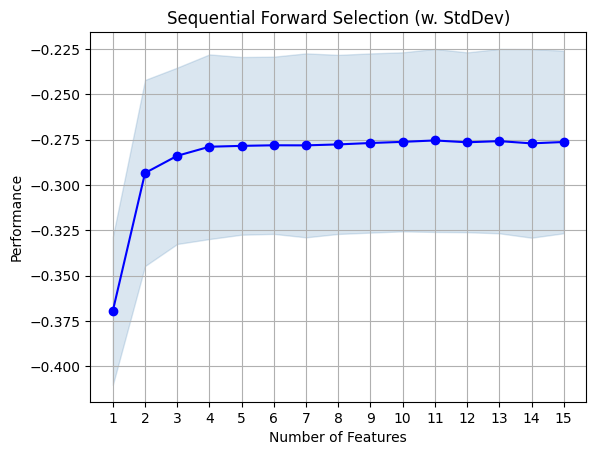

<Figure size 640x480 with 0 Axes>

In [ ]:
# Визуализирую ход отбра признаков первым способом.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
import json
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig(f"{FS_ASSETS}/sfs.png") 

In [37]:
# сохраним модель отбора признаков sfs
import joblib

os.makedirs('../models/sfs', exist_ok=True) # создание директории, если её ещё нет
with open('../models/sfs/sfs.pkl', 'wb') as fd:
    joblib.dump(sfs, fd) 

In [13]:
# 4.2 Отбор признаков при помощи метода номер 2

# Зададим параметры выборщика
sbs = SequentialFeatureSelector(estimator,
    k_features=3,       
    forward=False,      
    floating=False,     
    scoring='neg_root_mean_squared_error', 
    cv=2,               
    n_jobs=-1,
    verbose=2,
)
sbs

SequentialFeatureSelector(cv=2, estimator=RandomForestRegressor(),
                          forward=False, k_features=3, n_jobs=-1,
                          scoring='neg_root_mean_squared_error', verbose=2)

In [14]:
# отбирать по всей размерности признаков очень долго 
# применю разделение на 5 диапазонов с шагом 5, т.е.
# получим три выборки признаков

# Выбираем столбцы с 0 по 298 с шагом 5
X_train_sample_1 = X_train_sample.iloc[:, 0:298:5]
# Выбираем столбцы с 1 по 298 с шагом 5
X_train_sample_2 = X_train_sample.iloc[:, 1:298:5]
# Выбираем столбцы с 2 по 298 с шагом 5
X_train_sample_3 = X_train_sample.iloc[:, 2:298:5]
# Выбираем столбцы с 3 по 298 с шагом 5
X_train_sample_4 = X_train_sample.iloc[:, 3:298:5]
# Выбираем столбцы с 4 по 298 с шагом 5
X_train_sample_5 = X_train_sample.iloc[:, 4:298:5]

In [15]:
X_train_sample_1.shape, X_train_sample_2.shape, X_train_sample_3.shape, X_train_sample_4.shape, X_train_sample_5.shape

((1000, 60), (1000, 60), (1000, 60), (1000, 59), (1000, 59))

In [34]:
X_train_sample_1.columns

Index(['is_apartment', 'cat_fg__has_elevator_1', 'cat_fg__floor_group_высокий',
       'cat_fg__build_height_group_небоскреб', 'build_type_floors_multy_story',
       'floor_group_очень высокий', 'build_height_group_среднеэтажка',
       'total_area_old', 'floors_total', 'building_price_mean',
       'ceiling_height_cluster', 'num_fg__Polynomial__1',
       'num_fg__Polynomial__dist_origin_dest', 'num_fg__Polynomial__floor^2',
       'num_fg__Polynomial__floor distance_to_metro_fast',
       'num_fg__Polynomial__rooms building_type_int',
       'num_fg__Polynomial__rooms kitchen_area',
       'num_fg__Polynomial__building_type_int distance_to_metro_fast',
       'num_fg__Polynomial__ceiling_height dist_origin_dest',
       'num_fg__Polynomial__dist_origin_dest^2',
       'num_fg__Polynomial__distance_to_metro_fast^2',
       'num_fg__Polynomial__total_area kitchen_area',
       'num_fg__Polynomial__floor^3',
       'num_fg__Polynomial__floor^2 distance_to_metro_fast',
       'num_fg__P

In [35]:
sbs_1 = sbs.fit(X_train_sample_1, y_train_sample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.

In [38]:
sbs_1.k_feature_idx_

(7, 9, 12)

In [39]:
# Выбор признаков с помощью SBS
selected_features_sbs_1 = X_train_sample_1.iloc[:, np.array(sbs_1.k_feature_idx_)]
selected_features_sbs_1

total_area_old  building_price_mean   
31806        54.000000         1.406200e+07  \
105861      103.800003         2.577535e+07   
119731       40.000000         1.269273e+07   
14571        73.699997         1.696000e+07   
100913      180.000000         1.250000e+08   
...                ...                  ...   
106304       35.099998         9.180000e+06   
118997       54.000000         1.366870e+07   
101198       67.000000         1.432457e+07   
41334        43.000000         1.235000e+07   
62393        58.299999         7.620000e+06   

        num_fg__Polynomial__dist_origin_dest  
31806                              21.020833  
105861                             11.276967  
119731                             23.101884  
14571                               4.319443  
100913                              2.280614  
...                                      ...  
106304                             10.701004  
118997                             13.038675  
101198                             16.696575  
41334                               8.447044  
62393                              37.433691  

[1000 rows x 3 columns]

In [40]:
# Сохраним 3 лучших признаков (ну 1ой части датафрейма), полученные способом - начиная с полного набора.
features_sbs_1 = sbs_1.k_feature_names_

# Выведем метрики для первого и второго набора
print('\nSequential  Backward Selection: ')
print('CV Score:')
print(sbs_1.k_score_)


Sequential  Backward Selection: 
CV Score:
-0.2907600260567921


In [41]:
features_sbs_1 

('total_area_old',
 'building_price_mean',
 'num_fg__Polynomial__dist_origin_dest')

In [42]:
# Сохраняю датасеты с ходом отбора признаков
sbs_1_df = pd.DataFrame.from_dict(sbs_1.get_metric_dict()).T

sbs_1_df.to_csv(f"{FS_ASSETS}/sbs_1.csv")

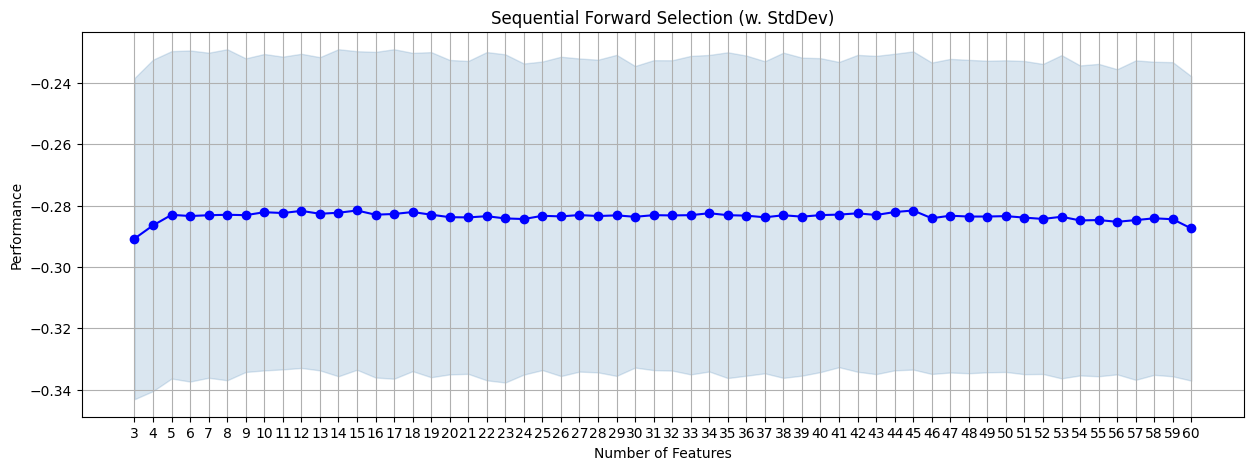

<Figure size 640x480 with 0 Axes>

In [45]:
# Визуализирую ход отбра 1-ой части признаков вторым способом.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
import json
import matplotlib.pyplot as plt

fig2_1 = plot_sfs(sbs_1.get_metric_dict(), kind='std_dev', figsize=(15, 5))

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig(f"{FS_ASSETS}/sbs_1.png") 

In [46]:
# сохраним модель отбора признаков sfs
import joblib

os.makedirs('../models/sfs', exist_ok=True) # создание директории, если её ещё нет
with open('../models/sfs/sbs_1.pkl', 'wb') as fd:
    joblib.dump(sbs_1, fd) 

In [47]:
# ищем следующие три признака
sbs_2 = sbs.fit(X_train_sample_2, y_train_sample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.

In [48]:
sbs_2.k_feature_idx_

(43, 48, 53)

In [49]:
# Выбор признаков с помощью SBS
selected_features_sbs_2 = X_train_sample_2.iloc[:, np.array(sbs_2.k_feature_idx_)]
selected_features_sbs_2

num_fg__Polynomial__building_type_int kitchen_area^2   
31806                                          353.439971     \
105861                                         397.620022      
119731                                         400.000000      
14571                                          420.249844      
100913                                         225.000000      
...                                                   ...      
106304                                         588.059955      
118997                                         353.439971      
101198                                         297.679991      
41334                                            0.000000      
62393                                          139.240005      

        num_fg__Polynomial__dist_origin_dest^2 distance_to_metro_fast   
31806                                        5.494656e+05              \
105861                                       6.478529e+04               
119731                                       6.130300e+05               
14571                                        8.525918e+03               
100913                                       2.854941e+03               
...                                                   ...               
106304                                       7.944628e+04               
118997                                       1.203110e+05               
101198                                       4.286531e+05               
41334                                        4.645690e+04               
62393                                        3.690891e+06               

        num_fg__Polynomial__total_area^2 kitchen_area  
31806                                    27410.398888  
105861                                  151919.617043  
119731                                   16000.000000  
14571                                   111349.615058  
100913                                  486000.000000  
...                                               ...  
106304                                   12196.897470  
118997                                   27410.398888  
101198                                   54765.799144  
41334                                    11094.000000  
62393                                    20053.450799  

[1000 rows x 3 columns]

In [50]:
# Сохраним 3 лучших признаков (во 2ой части датафрейма), полученные способом - начиная с полного набора.
features_sbs_2 = sbs_2.k_feature_names_

# Выведем метрики для первого и второго набора
print('\nSequential  Backward Selection: ')
print('CV Score:')
print(sbs_2.k_score_)


Sequential  Backward Selection: 
CV Score:
-0.36213268120993125


In [51]:
features_sbs_2

('num_fg__Polynomial__building_type_int kitchen_area^2',
 'num_fg__Polynomial__dist_origin_dest^2 distance_to_metro_fast',
 'num_fg__Polynomial__total_area^2 kitchen_area')

In [52]:
# Сохраняю датасеты с ходом отбора признаков
sbs_2_df = pd.DataFrame.from_dict(sbs_2.get_metric_dict()).T

sbs_2_df.to_csv(f"{FS_ASSETS}/sbs_2.csv")

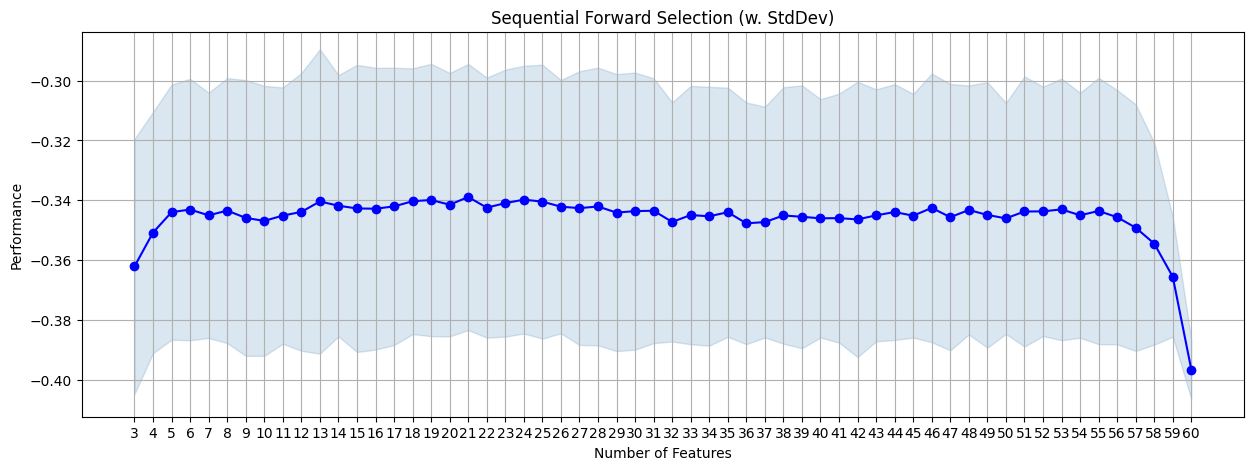

<Figure size 640x480 with 0 Axes>

In [53]:
# Визуализирую ход отбра 2-ой части признаков вторым способом.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
import json
import matplotlib.pyplot as plt

fig2_2 = plot_sfs(sbs_2.get_metric_dict(), kind='std_dev', figsize=(15, 5))

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig(f"{FS_ASSETS}/sbs_2.png") 

In [54]:
# сохраним 2-ю модель отбора признаков sbs
import joblib

os.makedirs('../models/sfs', exist_ok=True) # создание директории, если её ещё нет
with open('../models/sfs/sbs_2.pkl', 'wb') as fd:
    joblib.dump(sbs_2, fd) 

In [16]:
# ищем следующие три признака
sbs_3 = sbs.fit(X_train_sample_3, y_train_sample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.

In [19]:
sbs_3.k_feature_idx_

(18, 27, 48)

In [21]:
# Выбор признаков с помощью SBS
selected_features_sbs_3 = X_train_sample_3.iloc[:, np.array(sbs_3.k_feature_idx_)]
selected_features_sbs_3

num_fg__Polynomial__ceiling_height total_area   
35645                                       99.200001  \
94985                                      113.520005   
25996                                      101.112002   
56255                                      139.656010   
110541                                      94.776008   
...                                               ...   
185                                        162.000003   
77853                                      157.950003   
97979                                      145.800003   
92776                                      102.600002   
65034                                      103.680006   

        num_fg__Polynomial__floor ceiling_height total_area   
35645                                          793.600006    \
94985                                         1135.200045     
25996                                          910.008018     
56255                                         1117.248077     
110541                                         473.880039     
...                                                   ...     
185                                            486.000009     
77853                                         2369.250042     
97979                                          729.000013     
92776                                          410.400007     
65034                                         2177.280125     

        num_fg__Polynomial__dist_origin_dest^2 total_area  
35645                                         1874.947150  
94985                                        54413.427073  
25996                                         6864.262190  
56255                                         8848.314884  
110541                                       19267.912406  
...                                                   ...  
185                                          16726.536525  
77853                                        34950.904415  
97979                                         9559.999464  
92776                                        22735.440492  
65034                                         8279.522411  

[1000 rows x 3 columns]

In [ ]:
# Сохраним 3 лучших признаков (в 3ей части датафрейма), полученные способом - начиная с полного набора.
features_sbs_3 = sbs_3.k_feature_names_

# Выведем метрики для первого и второго набора
print('\nSequential  Backward Selection: ')
print('CV Score:')
print(sbs_3.k_score_)


Sequential  Backward Selection: 
CV Score:
-0.3176606051985217


In [24]:
features_sbs_3

('num_fg__Polynomial__ceiling_height total_area',
 'num_fg__Polynomial__floor ceiling_height total_area',
 'num_fg__Polynomial__dist_origin_dest^2 total_area')

In [27]:
# Сохраняю датасеты с ходом отбора признаков
sbs_3_df = pd.DataFrame.from_dict(sbs_3.get_metric_dict()).T

sbs_3_df.to_csv(f"{FS_ASSETS}/sbs_3.csv")

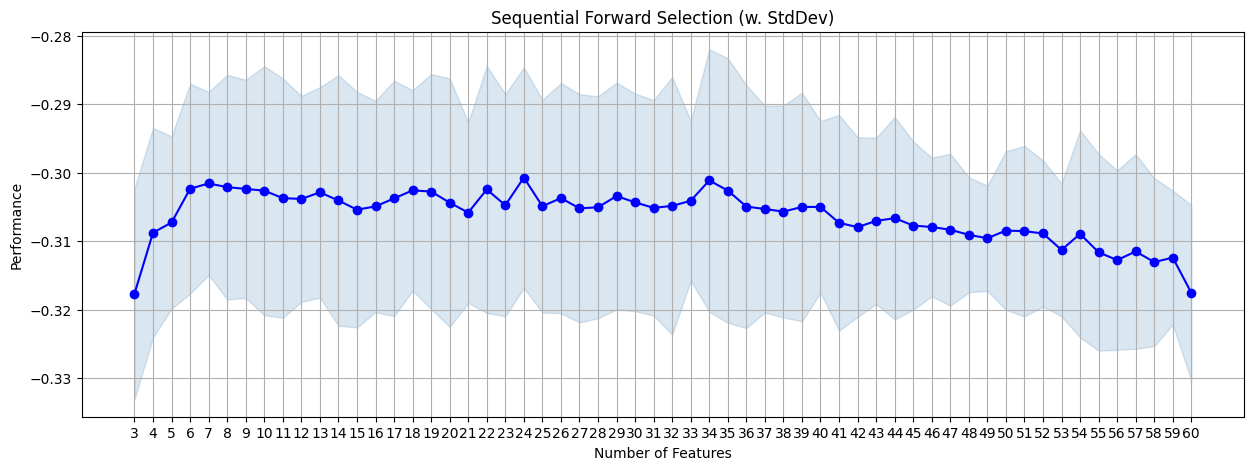

<Figure size 640x480 with 0 Axes>

In [ ]:
# Визуализирую ход отбра 3-ей части признаков вторым способом.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
import json
import matplotlib.pyplot as plt

fig2_3 = plot_sfs(sbs_3.get_metric_dict(), kind='std_dev', figsize=(15, 5))

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig(f"{FS_ASSETS}/sbs_3.png") 

In [29]:
# сохраним 3-ю модель отбора признаков sbs
import joblib

os.makedirs('../models/sfs', exist_ok=True) # создание директории, если её ещё нет
with open('../models/sfs/sbs_3.pkl', 'wb') as fd:
    joblib.dump(sbs_3, fd) 

In [35]:
# ищем следующие три признака
sbs_4 = sbs.fit(X_train_sample_4, y_train_sample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.

In [37]:
sbs_4.k_feature_idx_

(3, 9, 57)

In [38]:
# Выбор признаков с помощью SBS
selected_features_sbs_4 = X_train_sample_4.iloc[:, np.array(sbs_4.k_feature_idx_)]
selected_features_sbs_4

build_type_floors_low_rise  dist_origin_dest  total_area.1
35645                          0.0          6.846435     40.000000
94985                          0.0         35.572862     43.000000
25996                          0.0         13.387440     38.299999
56255                          0.0         12.933094     52.900002
110541                         0.0         23.167016     35.900002
...                            ...               ...           ...
185                            0.0         16.696575     60.000000
77853                          0.0         24.442818     58.500000
97979                          0.0         13.305526     54.000000
92776                          0.0         24.460193     38.000000
65034                          0.0         14.683751     38.400002

[1000 rows x 3 columns]

In [39]:
# Сохраним 3 лучших признаков (в 4ой части датафрейма), полученные способом - начиная с полного набора.
features_sbs_4 = sbs_4.k_feature_names_

# Выведем метрики для первого и второго набора
print('\nSequential  Backward Selection: ')
print('CV Score:')
print(sbs_4.k_score_)


Sequential  Backward Selection: 
CV Score:
-0.32635947305903634


In [40]:
features_sbs_4

('build_type_floors_low_rise', 'dist_origin_dest', 'total_area.1')

In [41]:
# Сохраняю датасеты с ходом отбора признаков
sbs_4_df = pd.DataFrame.from_dict(sbs_4.get_metric_dict()).T

sbs_4_df.to_csv(f"{FS_ASSETS}/sbs_4.csv")

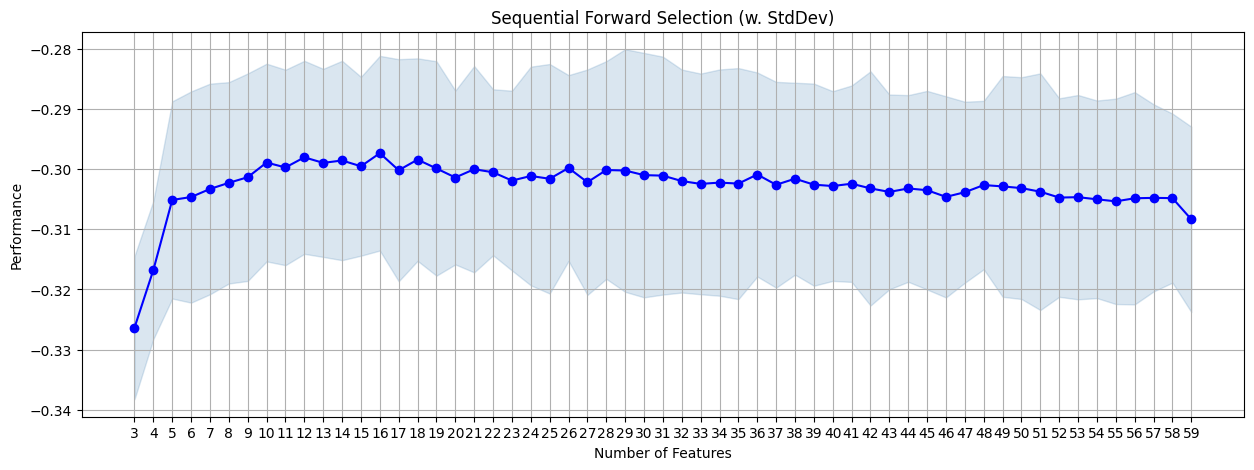

<Figure size 640x480 with 0 Axes>

In [42]:
# Визуализирую ход отбра 4-ой части признаков вторым способом.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
import json
import matplotlib.pyplot as plt

fig2_4 = plot_sfs(sbs_4.get_metric_dict(), kind='std_dev', figsize=(15, 5))

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig(f"{FS_ASSETS}/sbs_4.png") 

In [43]:
# сохраним 4-ю модель отбора признаков sbs
import joblib

os.makedirs('../models/sfs', exist_ok=True) # создание директории, если её ещё нет
with open('../models/sfs/sbs_4.pkl', 'wb') as fd:
    joblib.dump(sbs_4, fd) 

In [44]:
# ищем следующие три признака
sbs_5 = sbs.fit(X_train_sample_5, y_train_sample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/home/mle-user/.

In [45]:
sbs_5.k_feature_idx_

(29, 46, 48)

In [46]:
# Выбор признаков с помощью SBS
selected_features_sbs_5 = X_train_sample_5.iloc[:, np.array(sbs_5.k_feature_idx_)]
selected_features_sbs_5

num_fg__Polynomial__floor total_area^2   
35645                             12800.000000  \
94985                             18490.000000   
25996                             13202.009474   
56255                             22387.281292   
110541                             6444.050548   
...                                        ...   
185                               10800.000000   
77853                             51333.750000   
97979                             14580.000000   
92776                              5776.000000   
65034                             30965.762461   

        num_fg__Polynomial__ceiling_height total_area^2   
35645                                       3968.000031  \
94985                                       4881.360194   
25996                                       3872.589600   
56255                                       7387.803120   
110541                                      3402.458824   
...                                                 ...   
185                                         9720.000172   
77853                                       9240.075163   
97979                                       7873.200139   
92776                                       3898.800069   
65034                                       3981.312387   

        num_fg__Polynomial__dist_origin_dest^2 living_area  
35645                                         1406.210363   
94985                                        26447.455932   
25996                                         3656.160544   
56255                                         5017.947805   
110541                                        7694.927606   
...                                                   ...   
185                                           8920.819480   
77853                                        16071.441290   
97979                                         5311.110813   
92776                                        16752.429836   
65034                                         4290.689746   

[1000 rows x 3 columns]

In [47]:
# Сохраним 3 лучших признаков (в 5ой части датафрейма), полученные способом - начиная с полного набора.
features_sbs_5 = sbs_5.k_feature_names_

# Выведем метрики для первого и второго набора
print('\nSequential  Backward Selection: ')
print('CV Score:')
print(sbs_5.k_score_)


Sequential  Backward Selection: 
CV Score:
-0.30100994744525


In [48]:
features_sbs_5

('num_fg__Polynomial__floor total_area^2',
 'num_fg__Polynomial__ceiling_height total_area^2',
 'num_fg__Polynomial__dist_origin_dest^2 living_area')

In [49]:
# Сохраняю датасеты с ходом отбора признаков
sbs_5_df = pd.DataFrame.from_dict(sbs_5.get_metric_dict()).T

sbs_5_df.to_csv(f"{FS_ASSETS}/sbs_5.csv")

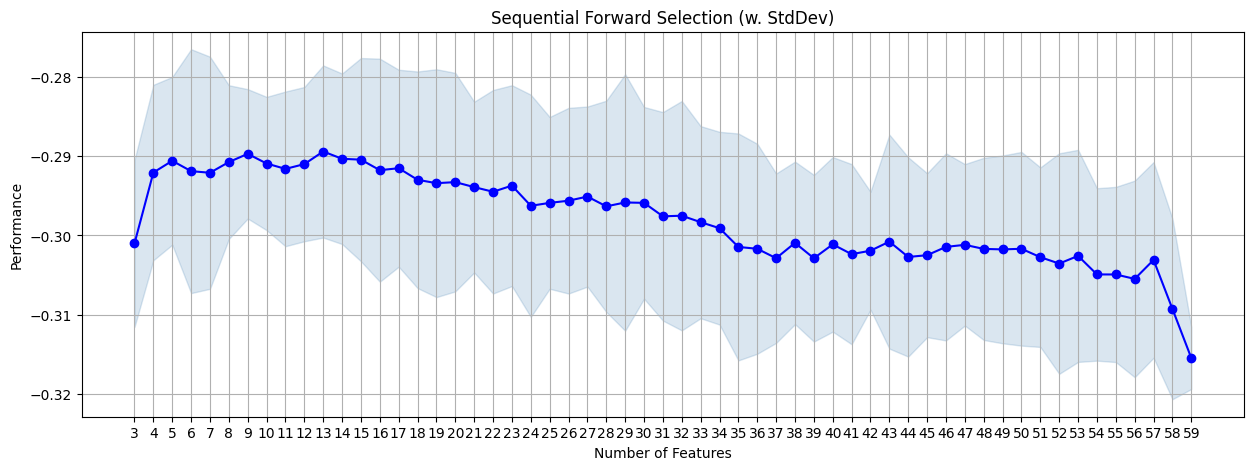

<Figure size 640x480 with 0 Axes>

In [50]:
# Визуализирую ход отбра 5-ой части признаков вторым способом.
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
import json
import matplotlib.pyplot as plt

fig2_5 = plot_sfs(sbs_5.get_metric_dict(), kind='std_dev', figsize=(15, 5))

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig(f"{FS_ASSETS}/sbs_5.png") 

In [51]:
# сохраним 5-ю модель отбора признаков sbs
import joblib

os.makedirs('../models/sfs', exist_ok=True) # создание директории, если её ещё нет
with open('../models/sfs/sbs_5.pkl', 'wb') as fd:
    joblib.dump(sbs_5, fd) 

In [25]:
# Загрузка моделей выбора признаков для формирования общего массива фичей
# для обучения и анализа модели 
import joblib
import os

# загружаем модель sfs.pkl
if os.path.exists('../models/sfs/sfs.pkl'):
    with open('../models/sfs/sfs.pkl', 'rb') as fd:
        sfs_load = joblib.load(fd)
        
# загружаем модель sds_1.pkl
if os.path.exists('../models/sfs/sbs_1.pkl'):
    with open('../models/sfs/sbs_1.pkl', 'rb') as fd:
        sbs_1_load = joblib.load(fd)
        
# загружаем модель sds_2.pkl
if os.path.exists('../models/sfs/sbs_2.pkl'):
    with open('../models/sfs/sbs_2.pkl', 'rb') as fd:
        sbs_2_load = joblib.load(fd)
        
# загружаем модель sds_3.pkl
if os.path.exists('../models/sfs/sbs_3.pkl'):
    with open('../models/sfs/sbs_3.pkl', 'rb') as fd:
        sbs_3_load = joblib.load(fd)

# загружаем модель sds_4.pkl
if os.path.exists('../models/sfs/sbs_4.pkl'):
    with open('../models/sfs/sbs_4.pkl', 'rb') as fd:
        sbs_4_load = joblib.load(fd)
        
# загружаем модель sds_5.pkl
if os.path.exists('../models/sfs/sbs_5.pkl'):
    with open('../models/sfs/sbs_5.pkl', 'rb') as fd:
        sbs_5_load = joblib.load(fd)

In [26]:
# 4.3 Анализ отобранных признаков при помощи двух методов и формирование финального списка с признаками для модели

import statistics

# Сохраним признаки полученные двумя способами
features_sfs = sfs_load.k_feature_names_
features_sbs = list(set(sbs_1_load.k_feature_names_) |
                    set(sbs_2_load.k_feature_names_) | 
                    set(sbs_3_load.k_feature_names_) | 
                    set(sbs_4_load.k_feature_names_) | 
                    set(sbs_5_load.k_feature_names_)) # sbs.k_feature_names_

# Выведем метрики для первого и второго набора
print('\nSequential Forward Selection: ')
print('CV Score:')
print(sfs_load.k_score_)

sbs_k_score = [sbs_1_load.k_score_, sbs_2_load.k_score_, sbs_3_load.k_score_, sbs_4_load.k_score_, sbs_5_load.k_score_]


print(statistics.median(sbs_k_score)) 
print(statistics.mean(sbs_k_score)) 


Sequential Forward Selection: 
CV Score:
-0.27631581634495556
-0.3176606051985217
-0.3195845465939063


In [27]:
# объединим все признаки для обучения новой модели
features_all = list(set(features_sfs) | set(features_sbs) )
features_all.sort()
features_all

['build_type_floors_low_rise',
 'building_area_mean',
 'building_price_mean',
 'ceiling_height.1',
 'dist_origin_dest',
 'living_area.1',
 'num_fg__KBinsDiscretizer__kitchen_area',
 'num_fg__Polynomial__building_type_int kitchen_area^2',
 'num_fg__Polynomial__ceiling_height total_area',
 'num_fg__Polynomial__ceiling_height total_area kitchen_area',
 'num_fg__Polynomial__ceiling_height total_area^2',
 'num_fg__Polynomial__dist_origin_dest',
 'num_fg__Polynomial__dist_origin_dest distance_to_metro_fast^2',
 'num_fg__Polynomial__dist_origin_dest^2 distance_to_metro_fast',
 'num_fg__Polynomial__dist_origin_dest^2 kitchen_area',
 'num_fg__Polynomial__dist_origin_dest^2 living_area',
 'num_fg__Polynomial__dist_origin_dest^2 total_area',
 'num_fg__Polynomial__floor building_type_int distance_to_metro_fast',
 'num_fg__Polynomial__floor building_type_int^2',
 'num_fg__Polynomial__floor ceiling_height total_area',
 'num_fg__Polynomial__floor total_area^2',
 'num_fg__Polynomial__living_area^2',
 

In [12]:
FS_ASSETS = "../fs_assets"

In [21]:
# 4.4 Обучение новой версии модели

# Обучаю модель на новом наборе признаков. Проверим как отразилось уменьшение качества 
# тренировочной выборки на качество прогнозирования и сравним результаты. 
# Если резуьтат будет сопоставим с предыдущим обучением и так как за счет сокращения числа фичей 
# увеличится скорость, то значит в некоторых слуаях можно пожертвовать качеством в пользу быстроты обучения.

In [ ]:
model_sfs = CatBoostRegressor(iterations=1000,
                            learning_rate=0.05,
                            depth=8,
                            eval_metric='RMSE',
                            verbose=100,
                            early_stopping_rounds=50,
                            random_seed=42,
                            random_state=42
                            )
model_sfs

In [ ]:
# Обучим модель
model_sfs.fit(X_train[features_all], y_train.values)

0:	learn: 0.6503406	total: 99.4ms	remaining: 1m 39s
100:	learn: 0.2676100	total: 3.81s	remaining: 34s
200:	learn: 0.2557462	total: 7.5s	remaining: 29.8s
300:	learn: 0.2481126	total: 11.1s	remaining: 25.8s
400:	learn: 0.2426396	total: 14.7s	remaining: 22s
500:	learn: 0.2382191	total: 18.3s	remaining: 18.2s
600:	learn: 0.2344890	total: 23.8s	remaining: 15.8s
700:	learn: 0.2311104	total: 29.2s	remaining: 12.5s
800:	learn: 0.2279725	total: 34.8s	remaining: 8.63s
900:	learn: 0.2253632	total: 41.3s	remaining: 4.53s
999:	learn: 0.2229143	total: 44.9s	remaining: 0us


In [24]:
# импорт библиотек для расчета метрик качества модели
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             mean_absolute_percentage_error,
                             mean_squared_log_error,
                             median_absolute_error, 
                             r2_score
                             )
from sklearn.metrics import root_mean_squared_error
from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error

In [25]:
# Получим предсказание
y_pred_sfs = model_sfs.predict(X_test[features_all])

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_sfs_real = np.expm1(y_pred_sfs)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_sfs_real)
rmse = root_mean_squared_error(y_test_real, y_pred_sfs_real)

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

print(f'Результат на тестовой выборке, RMSE: {round(rmse, 3)}')

MAE ≈ 3523696.2
RMSE ≈ 55998188.9
Результат на тестовой выборке, RMSE: 55998188.921


In [26]:
# расчитаное MAE baseline model
mae_base_line = 3532582.674518879
# расчитаное MAE по итогу блока 3
mae_block_3 = 3556046.85437723

# проверим качество модели - сравниваем по MASE
mase_4_3 = mae/mae_block_3
mase_4_bl = mae/mae_base_line
print(f'Результат на MASE 4 к 3: {mase_4_3}')
print(f'Результат на MASE 4 к bl: {mase_4_bl}')

Результат на MASE 4 к 3: 0.9909026214579122
Результат на MASE 4 к bl: 0.9974844114609351


In [27]:
# mase < 1 - по MASE модель лучше.
# Сравим остальые метрики.

In [40]:
# посчитаем метрики
evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_sfs_real)

def calculate_mspe(actual, predicted):
    squared_errors = np.power(actual - predicted, 2)
    return np.mean(squared_errors)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
metrics = {}
mae = mean_absolute_error(y_test_real, y_pred_sfs_real) 
mse = mean_squared_error(y_test_real, y_pred_sfs_real)  
rmse = mean_squared_error(y_test_real, y_pred_sfs_real, squared=False)  
mspe = mean_squared_percentage_error(y_test_real, y_pred_sfs_real, square_root=False)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_sfs_real, square_root=True) 
medae = median_absolute_error(y_test_real, y_pred_sfs_real)
r2 = r2_score(y_test_real, y_pred_sfs_real)             
r2_adj = adjusted_r2_score(y_test_real, y_pred_sfs_real, X.shape) 
mape = mean_absolute_percentage_error(y_test_real, y_pred_sfs_real) * 100 
smape = mean_absolute_percentage_error(y_test_real, y_pred_sfs_real)    
mre = evaluator.mean_relative_error()*100  
msle = mean_squared_log_error(y_test_real, y_pred_sfs_real) 
rmsle = np.sqrt(msle)  
wape = wape_score(y_test_real, y_pred_sfs_real) 

metrics = {
    "MAE": [mae],
    "MSE": [mse],
    "RMSE": [rmse],
    "MSPE": [mspe],
    "RMSPE": [rmspe],
    "MedAE": [medae],
    "MAPE_proc": [mape],
    "SMAPE": [smape],
    "MRE": [mre],
    "MSLE": [msle],
    "RMSLE": [rmsle],
    "R_2": [r2],
    "Adjusted R_2": [r2_adj],
    "WAPE": [wape]
}
metrics

{'MAE': [3523696.15002956],
 'MSE': [3135797162445878.5],
 'RMSE': [55998188.921123855],
 'MSPE': [165.18896539063505],
 'RMSPE': [12.852585941771991],
 'MedAE': [1371096.6051455867],
 'MAPE_proc': [47.588477073716085],
 'SMAPE': [0.47588477073716084],
 'MRE': [47.588477073716085],
 'MSLE': [0.07255289265036652],
 'RMSLE': [0.26935644163518074],
 'R_2': [0.3052773067203822],
 'Adjusted R_2': [0.30359721026632225],
 'WAPE': [0.18105372481449242]}

In [41]:
metrics_bl = {'MAE': [3556046.85437723],
 'MSE': [3124557188805671.5],
 'RMSE': [55897738.67345326],
 'MSPE': [157.8324054619936],
 'RMSPE': [12.56313676841869],
 'MedAE': [1376522.6530983606],
 'MAPE_proc': [47.376094154207664],
 'SMAPE': [0.47376094154207665],
 'MRE': [47.376094154207664],
 'MSLE': [0.07262598655524947],
 'RMSLE': [0.26949208996786805],
 'R_2': [0.3077674756806812],
 'Adjusted R_2': [0.3075942848630878],
 'WAPE': [0.18271596107810126]}

In [42]:
# сравним метрики с base_line моделью:
M_sfs = pd.DataFrame(metrics)
M_bl = pd.DataFrame(metrics_bl)

In [43]:
dif_metrics = M_sfs - M_bl
mask = (dif_metrics < 0).any()
columns_with_negatives = dif_metrics.loc[:, mask]
columns_with_negatives

MAE        MedAE      MSLE     RMSLE      R_2  Adjusted R_2   
0 -32350.704348 -5426.047953 -0.000073 -0.000136 -0.00249     -0.003997  \

       WAPE  
0 -0.001662

In [39]:
# MAE умеьшилось, R_2 хотя и уменьшилось, но 30.5% (0.305) ошибка это много (идеальая модель при R_2 = 1 (100%) или близко к ней)
# MRE 47.5%  - более 30% — низкая точность модели (оптимально когда менее 10% — высокая точность модели.В целом модель предсказывает плохо. 

In [55]:
# Получим результат при обучении с кросс-валидацией
from sklearn.model_selection import KFold, cross_validate

cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
cv_res = cross_validate(
        model_sfs,
        X_train[features_all],
        np.expm1(y_train),
        cv=cv_strategy,
        n_jobs=-1,
        scoring='neg_root_mean_squared_error'
        )
for key, value in cv_res.items():
        cv_res[key] = round(value.mean(), 3)

print(f'Результат при кросс-валидации, RMSE: {abs(cv_res[key])}')

0:	learn: 72345609.8000584	total: 89.1ms	remaining: 1m 29s
0:	learn: 72379324.1207456	total: 134ms	remaining: 2m 14s
100:	learn: 39419586.2542647	total: 7.38s	remaining: 1m 5s
100:	learn: 37778135.7807439	total: 7.5s	remaining: 1m 6s
200:	learn: 27668194.1866310	total: 14.2s	remaining: 56.6s
200:	learn: 31741819.8951386	total: 14.3s	remaining: 56.8s
300:	learn: 23723898.8584576	total: 20.8s	remaining: 48.3s
300:	learn: 28683806.6264397	total: 21.1s	remaining: 49.1s
400:	learn: 21545147.5180451	total: 27.5s	remaining: 41.1s
400:	learn: 27308792.6203661	total: 28.2s	remaining: 42.1s
500:	learn: 20147347.1714336	total: 34.5s	remaining: 34.4s
500:	learn: 26593943.1926096	total: 35s	remaining: 34.9s
600:	learn: 19211308.4434310	total: 42.2s	remaining: 28s
600:	learn: 26133236.5198105	total: 42.7s	remaining: 28.3s
700:	learn: 18663946.6586615	total: 49.2s	remaining: 21s
700:	learn: 25831192.4356325	total: 49.5s	remaining: 21.1s
800:	learn: 18239611.8145504	total: 56.1s	remaining: 13.9s
800:	

In [58]:
import json

# Усредняем и округляем
for key, value in cv_res.items():
    if isinstance(value, (list, np.ndarray)):
        cv_res[key] = round(np.mean(value), 3)
    else:
        cv_res[key] = round(value, 3)

# Сохраняем
os.makedirs('cv_results', exist_ok=True)
with open(f'cv_results/cv_res_CBR.json', 'a') as fd:
    json.dump(cv_res, fd, indent=2)

In [59]:
# Сохраняем
os.makedirs('cv_results', exist_ok=True)
with open(f'cv_results/cv_res_metrics.json', 'a') as fd:
    json.dump(metrics, fd, indent=2)

In [ ]:
# 4.5 Логирование всех артефактов в MLflow

In [66]:
import mlflow
from dotenv import load_dotenv

In [62]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = 'base_line_model_CBR_kruglikovAlex' # ваш код здесь #
RUN_NAME = 'feature_select_model'
REGISTRY_MODEL_NAME = 'cost_estimate_model_kruglikovAlex' # ваш код здесь #
FS_ASSETS = "../fs_assets" 

In [63]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [67]:
# подгружаем .env
load_dotenv()

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" # ваш код здесь
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [83]:
artifact_path_sfs = "sfs"
artifact_path_m = "manual"
artifact_path_auto = "auto"
artifact_path_res = "sv_results"

In [68]:
# настройки для логирования в MLFlow
pip_requirements = "../requirements.txt" 
signature = mlflow.models.infer_signature(
    X_train[features_all],
    y_pred_sfs_real.astype(int)
)

input_example = X_test[features_all][:10] 
metadata = {'model_type': 'monthly'} 

In [69]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id
experiment_id

'3'

In [70]:
class CatboostModelProba(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        super().__init__()
        self._model = model

    def predict(self, context, model_input):
        import numpy as np
        predictions = np.sqrt(self._model.predict(model_input))

        return predictions

In [72]:
# кастомизируем модель
custom_model = CatboostModelProba(model_sfs) 

In [75]:
metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "MSPE": mspe,
    "RMSPE": rmspe,
    "MedAE": medae,
    "MAPE_proc": mape,
    "SMAPE": smape,
    "MRE": mre,
    "MSLE": msle,
    "RMSLE": rmsle,
    "R_2": r2,
    "Adjusted R_2": r2_adj,
    "WAPE": wape
}

In [76]:
with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id # ваш код здесь
    
    model_info = mlflow.pyfunc.log_model( 
        # ваш код здесь #
        python_model=custom_model,
        #cb_model=model,
        signature=signature,
        pip_requirements=pip_requirements,
        metadata = metadata,
        input_example = input_example,
        artifact_path="models",
        await_registration_for=60,
        registered_model_name=REGISTRY_MODEL_NAME,
        )

    # логируем метрики эксперимента
    # где ключи — это названия метрик, а значения — числовые значения метрик
    mlflow.log_metrics(metrics)

    # логируем файл как артефакт эксперимента — 'users_churn.csv'
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-project-sprint-2-v001/data/data_Polyn_Kbins_OnrHot_AutoFeat.csv", "dataframe")
    mlflow.log_artifacts(FS_ASSETS) 

Registered model 'cost_estimate_model_kruglikovAlex' already exists. Creating a new version of this model...
2025/08/07 20:54:12 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: cost_estimate_model_kruglikovAlex, version 6
Created version '6' of model 'cost_estimate_model_kruglikovAlex'.


In [77]:
run_id

'b4d4a825802b46219d0c4b27e2e1f5e2'

In [81]:
# добавляем в качестве артифактов коды трансформации признаков
from mlflow import MlflowClient

client = MlflowClient()

model_name = REGISTRY_MODEL_NAME
version = 6
model_version = client.get_model_version(model_name, version)
run_id = model_version.run_id
run_id

'b4d4a825802b46219d0c4b27e2e1f5e2'

In [87]:
with mlflow.start_run(experiment_id=experiment_id,
                 run_name=RUN_NAME,
                 run_id=run_id # pass None to start a new run
                 ) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id # ваш код здесь
    
    preprocessor_info = mlflow.sklearn.log_model(preprocessor, artifact_path="preprocessor") 
    
    sfs_info = mlflow.sklearn.log_model(sfs_load, artifact_path=artifact_path_sfs+"/forward") 
    sbs1_info = mlflow.sklearn.log_model(sbs_1_load, artifact_path=artifact_path_sfs+"/backward/1") 
    sbs2_info = mlflow.sklearn.log_model(sbs_2_load, artifact_path=artifact_path_sfs+"/backward/2") 
    sbs3_info = mlflow.sklearn.log_model(sbs_3_load, artifact_path=artifact_path_sfs+"/backward/3") 
    sbs5_info = mlflow.sklearn.log_model(sbs_5_load, artifact_path=artifact_path_sfs+"/backward/5") 
    mlflow.log_metrics(cv_res)

2025/08/07 21:18:54 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/08/07 21:18:55 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under s3://s3-student-mle-20250507-60d03b0a2f-freetrack/3/b4d4a825802b46219d0c4b27e2e1f5e2/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2025/08/07 21:18:55 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/08/07 21:18:57 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under s3://s3-student-mle-20250507-60d03b0a2f-freetrack/3/b4d4a825802b46219d0c4b27e2e1f5e2/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2025/08/07 21:18:57 WARN

In [88]:
# сохраняем модель
os.makedirs('../models', exist_ok=True) # создание директории, если её ещё нет
with open('../models/model_sfs.pkl', 'wb') as fd:
    joblib.dump(model_sfs, fd)
    

### Этап 5 - подбор гиперпараметров и обучение новой версии модели
После того как мы уделили значительное внимание качеству модели через создание и отбор признаков, пришло время для финального штриха — подбора гиперпараметров. Этот этап является ключевым в финальной части проекта второго спринта, где ваша задача — оптимизировать гиперпараметры модели для достижения наилучшего качества.

Рекомендуется подобрать гиперпараметры как минимум двумя различными методами (например, с использованием Grid Search и Random Search), чтобы вы могли сравнить результаты и выбрать наиболее эффективный набор гиперпараметров для вашей модели. После определения оптимальных гиперпараметров, наступает время обучить финальную версию модели, используя ваши новые признаки.

Рекомендуемые шаги:

- Выбор методов для подбора гиперпараметров: Определитесь с методами, которые вы будете использовать для подбора гиперпараметров (например, Grid Search, Random Search, Bayesian Optimization).
- Подбор гиперпараметров: Примените выбранные методы для нахождения оптимальных значений гиперпараметров вашей модели.
- Сравнение результатов: Анализируйте и сравнивайте результаты, полученные различными методами, для определения наилучшего набора гиперпараметров.
- Обучение финальной модели: Используя выбранные гиперпараметры, обучите финальную версию вашей модели на новых признаках.
- Документирование процесса и результатов: Залогируйте все шаги и результаты в MLflow, включая сравнение методов подбора гиперпараметров и характеристики финальной модели.

Этот этап позволит вам максимально улучшить качество вашей модели перед финальной оценкой, предоставив полное понимание важности и влияния гиперпараметров на производительность модели.

In [11]:
# 5.1 Подбор гиперпарметров при мощи метода номер 1

from sklearn.model_selection import RandomizedSearchCV

In [12]:
# Определяю параметры модели

eval_metric = "RMSE"
task_type = 'CPU'
random_seed = 0
iterations = 300
verbose = False

"""model_sfs = CatBoostRegressor(iterations=1000,
                            learning_rate=0.05,
                            depth=8,
                            eval_metric='RMSE',
                            verbose=100,
                            early_stopping_rounds=50,
                            random_seed=42,
                            random_state=42
                            )
"""

# Определим сетку гипер параметров
param_distributions = {
    'depth': [3, 4, 5, 6, 7],
    'learning_rate': np.logspace(-3, -1, 5),
    'iterations': [10, 20, 30],
    'l2_leaf_reg': np.logspace(-2, 0, 3)
} 

In [13]:
# Определим модель
model = CatBoostRegressor(eval_metric=eval_metric,
                  task_type = task_type,
                  random_seed = random_seed,
                  iterations = iterations,
                  verbose=verbose)

# Определим параметры поиска
cv = RandomizedSearchCV(estimator=model, 
                        param_distributions=param_distributions, 
                        cv=3,
                        n_jobs=-1,
                        n_iter=20)

In [14]:
cv

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7ff72ea2bd90>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'depth': [3, 4, 5, 6, 7],
                                        'iterations': [10, 20, 30],
                                        'l2_leaf_reg': array([0.01, 0.1 , 1.  ]),
                                        'learning_rate': array([0.001     , 0.00316228, 0.01      , 0.03162278, 0.1       ])})

In [21]:
# Обучим модель
clf = cv.fit(X_train[features_all], y_train)

In [22]:
# выведите лучшие параметры и оценку точности
print("Лучшие гиперпараметры:", clf.best_params_)
print("Лучший счет:", clf.best_score_)

Лучшие гиперпараметры: {'learning_rate': 0.09999999999999999, 'l2_leaf_reg': 0.01, 'iterations': 30, 'depth': 6}
Лучший счет: 0.8160153913184182


In [23]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0       0.892448      0.065462         0.023149        0.008792  \
1       1.474144      0.031911         0.033178        0.002612   
2       0.858094      0.021638         0.028963        0.007724   
3       1.464772      0.133236         0.025414        0.005089   
4       0.639827      0.027872         0.021439        0.005061   

  param_learning_rate param_l2_leaf_reg param_iterations param_depth   
0               0.001               0.1               10           6  \
1                 0.1              0.01               30           6   
2            0.003162               0.1               10           7   
3            0.031623              0.01               30           5   
4                0.01               1.0               10           4   

                                              params  split0_test_score   
0  {'learning_rate': 0.001, 'l2_leaf_reg': 0.0999...           0.014597  \
1  {'learning_rate': 0.09999999999999999, 'l2_lea...           0.815346   
2  {'learning_rate': 0.0031622776601683794, 'l2_l...           0.045765   
3  {'learning_rate': 0.03162277660168379, 'l2_lea...           0.653079   
4  {'learning_rate': 0.01, 'l2_leaf_reg': 1.0, 'i...           0.127869   

   split1_test_score  split2_test_score  mean_test_score  std_test_score   
0           0.014655           0.014311         0.014521        0.000151  \
1           0.823774           0.808926         0.816015        0.006080   
2           0.046002           0.045213         0.045660        0.000331   
3           0.660128           0.646560         0.653256        0.005541   
4           0.128484           0.126130         0.127495        0.000997   

   rank_test_score  
0               19  
1                1  
2               14  
3                4  
4               10

In [ ]:
# было
"""
model_sfs = CatBoostRegressor(iterations=1000,  # стало 30
                            learning_rate=0.05, # стало 0.09999999999999999
                            depth=8,            # стало 6
                            eval_metric='RMSE',
                            verbose=100,
                            early_stopping_rounds=50,
                            random_seed=42,
                            random_state=42
                            )
"""

"\nmodel_sfs = CatBoostRegressor(iterations=1000,  # стало 30\n                            learning_rate=0.05, # стало 0.09999999999999999\n                            depth=8,            # стало 3\n                            eval_metric='RMSE',\n                            verbose=100,\n                            early_stopping_rounds=50,\n                            random_seed=42,\n                            random_state=42\n                            )\n"

In [24]:
best_params = clf.best_params_

In [25]:
# Определим модель с лучшими гипер параметрами по RandomizedSearchCV
model_best = CatBoostRegressor(**best_params,
                               eval_metric=eval_metric,
                               task_type= task_type,
                               random_seed= random_seed,
                               verbose=verbose)
model_best


In [26]:
# Обучим модель с улучшеными гипер параметрами
model_best.fit(X_train[features_all], y_train)

In [27]:
# скрость 0.9s

In [28]:
# оцениваем модель на тестовом наборе
test_score = model_best.score(X_test, y_test)
print("Точность на тестовой выборке:", test_score) 

Точность на тестовой выборке: 0.8134619040996706


In [30]:
# импорт библиотек для расчета метрик качества модели
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             mean_absolute_percentage_error,
                             mean_squared_log_error,
                             median_absolute_error, 
                             r2_score
                             )
from sklearn.metrics import root_mean_squared_error
from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error

# Получим предсказание
y_pred_cv = model_best.predict(X_test[features_all])


# Посчитаем метрику
res_test_rs = root_mean_squared_error(y_test, y_pred_cv)

print(f'Результат на тестовой выборке (без обратного преобразоваия log1p), RMSE: {round(res_test_rs, 3)}')

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_cv_real = np.expm1(y_pred_cv)  # обратное преобразование log1p

mae = mean_absolute_error(y_test_real, y_pred_cv_real)
rmse = root_mean_squared_error(y_test_real, y_pred_cv_real)

print(f"MAE ≈ {mae:.1f}")
print(f"RMSE ≈ {rmse:.1f}")

print(f'Результат на тестовой выборке, RMSE: {round(rmse, 3)}')

Результат на тестовой выборке (без обратного преобразоваия log1p), RMSE: 0.297
MAE ≈ 4551375.5
RMSE ≈ 58912162.4
Результат на тестовой выборке, RMSE: 58912162.362


In [31]:
# вариат с подбором гиперпараметров получился хуже

In [32]:
mae

4551375.500237539

In [33]:
# проверим модель по MASE

# расчитаное MAE baseline model
mae_base_line = 3532582.674518879
# расчитаное MAE по итогу блока 3
mae_block_3 = 3556046.85437723
# расчитаное MAE по итогу блока 4
mae_block_4 = 3523696.15002956
# расчитаное MAE по итогу блока 5 по подбору гиперпараметров RandomizedSearchCV
mae_block_5 = mae

# проверим качество модели - сравниваем по MASE
mase_5_3 = mae/mae_block_3
mase_5_4 = mae/mae_block_4
mase_5_bl = mae/mae_base_line
print(f'Результат на MASE 4 к 3: {mase_5_3}')
print(f'Результат на MASE 4 к 3: {mase_5_4}')
print(f'Результат на MASE 4 к bl: {mase_5_bl}')

Результат на MASE 4 к 3: 1.279897506028396
Результат на MASE 4 к 3: 1.2916481179001085
Результат на MASE 4 к bl: 1.2883988626982141


In [40]:
# MASE > 1 - по MASE модель хуже.
# Сравим остальые метрики.
from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error

evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_cv_real)

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

metrics_cv = {}
mae = mean_absolute_error(y_test_real, y_pred_cv_real) 
mse = mean_squared_error(y_test_real, y_pred_cv_real)  
rmse = mean_squared_error(y_test_real, y_pred_cv_real, squared=False)  
mspe = mean_squared_percentage_error(y_test_real, y_pred_cv_real, square_root=False)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_cv_real, square_root=True) 
medae = median_absolute_error(y_test_real, y_pred_cv_real)
r2 = r2_score(y_test_real, y_pred_cv_real)             
r2_adj = adjusted_r2_score(y_test_real, y_pred_cv_real, X.shape) 
mape = mean_absolute_percentage_error(y_test_real, y_pred_cv_real) * 100 
smape = mean_absolute_percentage_error(y_test_real, y_pred_cv_real)    
mre = evaluator.mean_relative_error()*100  
msle = mean_squared_log_error(y_test_real, y_pred_cv_real) 
rmsle = np.sqrt(msle)  
wape = wape_score(y_test_real, y_pred_cv_real) 

metrics_cv = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "MSPE": mspe,
    "RMSPE": rmspe,
    "MedAE": medae,
    "MAPE_proc": mape,
    "SMAPE": smape,
    "MRE": mre,
    "MSLE": msle,
    "RMSLE": rmsle,
    "R_2": r2,
    "Adjusted R_2": r2_adj,
    "WAPE": wape
}
metrics_cv

/home/mle-user/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MAE': 4551375.500237539,
 'MSE': 3470642874152448.0,
 'RMSE': 58912162.36187947,
 'MSPE': 180.6890798526852,
 'RMSPE': 13.442063824156067,
 'MedAE': 1555984.022306663,
 'MAPE_proc': 55.08166838067694,
 'SMAPE': 0.5508166838067694,
 'MRE': 55.08166838067694,
 'MSLE': 0.08815073365753831,
 'RMSLE': 0.29690189231047065,
 'R_2': 0.23109364539948407,
 'Adjusted R_2': 0.22923414541140963,
 'WAPE': 0.23385770289544328}

In [41]:
# дополнительные метрики из результатов кросс-валидации
metrics_cv["mean_fit_time"] = clf.cv_results_['mean_fit_time'][clf.best_index_] # среднее время обучения
metrics_cv["std_fit_time"] = clf.cv_results_['std_fit_time'][clf.best_index_] # стандартное отклонение времени обучения
metrics_cv["mean_test_score"] = clf.cv_results_['mean_test_score'][clf.best_index_] # средний результат на тесте
metrics_cv["std_test_score"] = clf.cv_results_['std_test_score'][clf.best_index_] # стандартное отклонение результата на тесте
metrics_cv["best_score"] = clf.best_score_ # или best_model.score(X_test, y_test) # лучший результат кросс-валидации

In [42]:
metrics_cv

{'MAE': 4551375.500237539,
 'MSE': 3470642874152448.0,
 'RMSE': 58912162.36187947,
 'MSPE': 180.6890798526852,
 'RMSPE': 13.442063824156067,
 'MedAE': 1555984.022306663,
 'MAPE_proc': 55.08166838067694,
 'SMAPE': 0.5508166838067694,
 'MRE': 55.08166838067694,
 'MSLE': 0.08815073365753831,
 'RMSLE': 0.29690189231047065,
 'R_2': 0.23109364539948407,
 'Adjusted R_2': 0.22923414541140963,
 'WAPE': 0.23385770289544328,
 'mean_fit_time': 1.4741439819335938,
 'std_fit_time': 0.03191078732545949,
 'mean_test_score': 0.8160153913184182,
 'std_test_score': 0.006079862330312968,
 'best_score': 0.8160153913184182}

In [48]:
# логируем в mlflow
import mlflow
from dotenv import load_dotenv
import os

# настройки для логирования в MLFlow
pip_requirements = "../requirements.txt" 
signature = mlflow.models.infer_signature(
    X_train[features_all],
    y_pred_cv.astype(int)
)

input_example = X_test[:10] 
metadata = {'model_type': 'monthly'} 

In [49]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [50]:
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = 'base_line_model_CBR_kruglikovAlex' # ваш код здесь #
RUN_NAME = 'RandomizedSearchCV'
REGISTRY_MODEL_NAME = 'cost_estimate_model_kruglikovAlex' # ваш код здесь #
FS_ASSETS = "../fs_assets" 

In [51]:
# подгружаем .env
load_dotenv()

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" # ваш код здесь
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [52]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id
experiment_id

'3'

In [53]:
class CatboostModelProba(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        super().__init__()
        self._model = model

    def predict(self, context, model_input):
        import numpy as np
        predictions = np.sqrt(self._model.predict(model_input))

        return predictions

In [55]:
# кастомизируем модель
custom_model = CatboostModelProba(model_best) 

In [ ]:
with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id # ваш код здесь
    
    model_info = mlflow.pyfunc.log_model( 
        # ваш код здесь #
        python_model=custom_model,
        #cb_model=model,
        signature=signature,
        pip_requirements=pip_requirements,
        metadata = metadata,
        input_example = input_example,
        artifact_path="models",
        await_registration_for=60,
        registered_model_name=REGISTRY_MODEL_NAME,
        )

    cv_info = mlflow.sklearn.log_model(cv, artifact_path='cv')
    # логируем метрики эксперимента
    mlflow.log_params(best_params)
    # где ключи — это названия метрик, а значения — числовые значения метрик
    mlflow.log_metrics(metrics_cv)

    # логируем файл как артефакт эксперимента — 'users_churn.csv'
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-project-sprint-2-v001/data/data_Polyn_Kbins_OnrHot_AutoFeat.csv", "dataframe")
    mlflow.log_artifacts(FS_ASSETS) 

Registered model 'cost_estimate_model_kruglikovAlex' already exists. Creating a new version of this model...
2025/08/07 22:31:22 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: cost_estimate_model_kruglikovAlex, version 8
Created version '8' of model 'cost_estimate_model_kruglikovAlex'.


In [58]:
run_id

'1c564028330143a9bc994a0b1b4c45c4'

In [59]:
client = mlflow.MlflowClient()
model_metadata = client.get_latest_versions(REGISTRY_MODEL_NAME, stages=["None"])
latest_model_version = model_metadata[0].version
latest_model_version

'8'

In [60]:
import joblib
# сохранение результата шага
os.makedirs('../models', exist_ok=True) # создание директории, если её ещё нет
with open('../models/model_RandomizedSearchCV.pkl', 'wb') as fd:
    joblib.dump(model, fd)

os.makedirs('../models/cv', exist_ok=True) # создание директории, если её ещё нет
with open('../models/cv/cv_r.pkl', 'wb') as fd:
    joblib.dump(cv, fd)

In [13]:
# 5.2 Подбор гиперпарметров при мощи метода номер 2
import mlflow
import os
from dotenv import load_dotenv
from sklearn.metrics import roc_auc_score, f1_score, log_loss, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
import optuna
from optuna.integration.mlflow import MLflowCallback
from mlflow.utils.mlflow_tags import MLFLOW_PARENT_RUN_ID
import numpy as np
from collections import defaultdict

In [14]:
# Определим новый ран чтобы логировать эксперименты
STUDY_DB_NAME = "sqlite:///local.study.db"
STUDY_NAME = "optuna_model"

# %# =====================================================
#                 Optuna - TPE - Bayesian search
# ========================================================
TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = 'base_line_model_CBR_kruglikovAlex' # ваш код здесь #
RUN_NAME = 'Optuna'
REGISTRY_MODEL_NAME = 'cost_estimate_model_kruglikovAlex' # ваш код здесь #
FS_ASSETS = "../fs_assets" 

In [15]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [19]:
# подгружаем .env
load_dotenv()

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" # ваш код здесь
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [20]:
X_train[features_all].isnull().values.any()

False

In [21]:
X.shape

(123937, 299)

In [40]:
from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
from sklearn.model_selection import KFold, cross_validate
# импорт библиотек для расчета метрик качества модели
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             mean_absolute_percentage_error,
                             mean_squared_log_error,
                             median_absolute_error, 
                             r2_score
                             )
from sklearn.metrics import root_mean_squared_error
from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error

def adjusted_r2_score(y_true, y_pred, x_shape):
            n, k = x_shape
            ssr = np.sum((y_true - y_pred) ** 2)
            sst = np.sum((y_true - y_true.mean()) ** 2)
            r2 = 1 - ssr / sst
            return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator
        
#y_test_real = np.expm1(y_test)  # обратное преобразование log1p

# определяю фукцию проведения экспериметов
def objective(trial: optuna.Trial, run_id) -> float:
    
    param = {
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "random_seed": 42,
        "eval_metric": "RMSE",
        "iterations": 300,
        "verbose": False 
        }
    
    model = CatBoostRegressor(**param)

    skf = KFold(n_splits=5) #, shuffle=True)
    #skf = StratifiedKFold(n_splits=2)

    metrics = defaultdict(list)
    for i, (train_index, val_index) in enumerate(skf.split(X_train[features_all], y_train)):
        train_x = X_train.iloc[train_index]
        val_x = X_train.iloc[val_index]
        train_y = y_train.iloc[train_index]
        val_y = y_train.iloc[val_index]
        
        model.fit(train_x, train_y)
        prediction = model.predict(val_x)
        
        y_pred_optuna_real = np.expm1(prediction)  # обратное преобразование log1p
        val_y_real = np.expm1(val_y)
        
        rmse = root_mean_squared_error(val_y_real,  y_pred_optuna_real)  
        print('rmse: ', rmse)

        evaluator = RegressionMetric(val_y_real.to_numpy(),  y_pred_optuna_real)

        mae = mean_absolute_error(val_y_real, y_pred_optuna_real) 
        mse = mean_squared_error(val_y_real, y_pred_optuna_real)   
        mspe = mean_squared_percentage_error(val_y_real, y_pred_optuna_real, square_root=False)
        rmspe = mean_squared_percentage_error(val_y_real, y_pred_optuna_real, square_root=True) 
        medae = median_absolute_error(val_y_real, y_pred_optuna_real)
        r2 = r2_score(val_y_real, y_pred_optuna_real)             
        r2_adj = adjusted_r2_score(val_y_real, y_pred_optuna_real, X.shape) 
        mape = mean_absolute_percentage_error(val_y_real, y_pred_optuna_real) * 100 
        smape = mean_absolute_percentage_error(val_y_real, y_pred_optuna_real)    
        mre = evaluator.mean_relative_error()*100  
        msle = mean_squared_log_error(val_y_real, y_pred_optuna_real) 
        rmsle = np.sqrt(msle)  
        wape = wape_score(val_y_real, y_pred_optuna_real)
        
        metrics["MAE"].append(mae)
        metrics["MSE"].append(mse)
        metrics["RMSE"].append(rmse)
        metrics["MSPE"].append(mspe)
        metrics["RMSPE"].append(rmspe)
        metrics["MedAE"].append(medae)
        metrics["MAPE_proc"].append(mape)
        metrics["SMAPE"].append(smape)
        metrics["MRE"].append(mre)
        metrics["MSLE"].append(msle)
        metrics["RMSLE"].append(rmsle)
        metrics["R_2"].append(r2)
        metrics["Adjusted R_2"].append(r2_adj)
        metrics["WAPE"].append(wape)

    # берем медиану по фолдам
    mae = np.median(np.array(metrics["MAE"]))
    mse = np.median(np.array(metrics["MSE"]))
    rmse = np.median(np.array(metrics["RMSE"]))
    mspe = np.median(np.array(metrics["MSPE"]))
    rmspe = np.median(np.array(metrics["RMSPE"]))
    medae = np.median(np.array(metrics["MedAE"]))
    mape = np.median(np.array(metrics["MAPE_proc"]))
    smape = np.median(np.array(metrics["SMAPE"])) 
    mre = np.median(np.array(metrics["MRE"]))
    msle = np.median(np.array(metrics["MSLE"]))
    rmsle = np.median(np.array(metrics["RMSLE"]))
    r2 = np.median(np.array(metrics["R_2"])) 
    r2_adj = np.median(np.array(metrics["Adjusted R_2"]))  
    wape = np.median(np.array(metrics["WAPE"]))  
    
    metrics_optuna = {
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "MSPE": mspe,
            "RMSPE": rmspe,
            "MedAE": medae,
            "MAPE_proc": mape,
            "SMAPE": smape,
            "MRE": mre,
            "MSLE": msle,
            "RMSLE": rmsle,
            "R_2": r2,
            "Adjusted R_2": r2_adj,
            "WAPE": wape
        }
    print('metrics: ', metrics_optuna)
    # Логируем вручную дополнительные метрики в MLflow
    try:
        current_run = mlflow.active_run()
        id_run = current_run.info.run_id 
        name_run = current_run.info.run_name 
    except:
        id_run = run_id
        name_run = RUN_NAME
        
    print('id_run: ', id_run)    
    print('name_run: ', name_run)    
    with mlflow.start_run(experiment_id=experiment_id,
                        run_name=name_run,
                        run_id=id_run # pass None to start a new run
                        ) as run:
        # получаем уникальный идентификатор запуска эксперимента
        run_id = run.info.run_id # ваш код здесь
        
        mlflow.log_metrics(metrics_optuna)
    
    return rmse

In [41]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id
experiment_id

'3'

In [42]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [51]:
# run = mlflow.active_run() 
# print(f"Active run_id: {run.info.run_id}")

# mlflow.end_run()

# mlflow.delete_run(run_id: str)

In [43]:
with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

print("run_id: ", run_id)

mlflc = MLflowCallback(
    tracking_uri=f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}",
    metric_name="RMSE",
    create_experiment=False,
    mlflow_kwargs={'experiment_id': experiment_id, 'tags': {'mlflow.parentRunId': run_id}}) 

run_id:  8fa43143c91d4ebcb4745fdb1384ae5d


/tmp/ipykernel_1541/2391029716.py:6: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflc = MLflowCallback(


In [44]:
study = optuna.create_study(directions=['minimize'], 
                            study_name=STUDY_NAME, 
                            storage=STUDY_DB_NAME, 
                            sampler=optuna.samplers.TPESampler(),
                            load_if_exists=True)

[I 2025-08-08 12:10:01,657] Using an existing study with name 'optuna_model' instead of creating a new one.


In [45]:
id_run = run_id

In [46]:
study.optimize(lambda trial: objective(trial, run_id), n_trials=10, callbacks=[mlflc])

rmse:  19539641.604209978
rmse:  46578259.89537655
rmse:  23196802.713680137
rmse:  72601504.92868091


[I 2025-08-08 12:13:08,672] Trial 68 finished with value: 46578259.89537655 and parameters: {'depth': 8, 'learning_rate': 0.0884132768925673, 'bootstrap_type': 'MVS', 'colsample_bylevel': 0.188573911906594}. Best is trial 68 with value: 46578259.89537655.


rmse:  100946809.53689215
metrics:  {'MAE': 3659415.222965384, 'MSE': 2169534294881243.2, 'RMSE': 46578259.89537655, 'MSPE': 188.4676734925279, 'RMSPE': 13.728352905302511, 'MedAE': 1436944.9191714162, 'MAPE_proc': 46.13007604693176, 'SMAPE': 0.4613007604693176, 'MRE': 46.13007604693176, 'MSLE': 0.07210644491462642, 'RMSLE': 0.2685264324319422, 'R_2': 0.3271455078263201, 'Adjusted R_2': 0.3255182967717011, 'WAPE': 0.19246133900402548}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  19572556.313427817
rmse:  46672623.58287672
rmse:  23658857.664606523
rmse:  72654432.02134882


[I 2025-08-08 12:15:38,521] Trial 69 finished with value: 46672623.58287672 and parameters: {'depth': 8, 'learning_rate': 0.09806430352643111, 'bootstrap_type': 'MVS', 'colsample_bylevel': 0.15408502017097508}. Best is trial 68 with value: 46578259.89537655.


rmse:  100967900.53142989
metrics:  {'MAE': 3712171.4781737668, 'MSE': 2178333792108900.0, 'RMSE': 46672623.58287672, 'MSPE': 206.95109037085973, 'RMSPE': 14.385794742413772, 'MedAE': 1447332.238790688, 'MAPE_proc': 47.85419410314706, 'SMAPE': 0.4785419410314706, 'MRE': 47.85419410314706, 'MSLE': 0.07354535563689976, 'RMSLE': 0.2711924697274977, 'R_2': 0.32441645152494336, 'Adjusted R_2': 0.3227826406026948, 'WAPE': 0.195235973446852}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  20283296.778338604
rmse:  46813584.67359913
rmse:  23685432.167712666
rmse:  72778323.52336484


[I 2025-08-08 12:18:49,810] Trial 70 finished with value: 46813584.67359913 and parameters: {'depth': 8, 'learning_rate': 0.050026217056135844, 'bootstrap_type': 'MVS', 'colsample_bylevel': 0.21471649996745235}. Best is trial 68 with value: 46578259.89537655.


rmse:  101050031.03609063
metrics:  {'MAE': 3777323.532117514, 'MSE': 2191511709992235.2, 'RMSE': 46813584.67359913, 'MSPE': 211.4066276732256, 'RMSPE': 14.53982901114128, 'MedAE': 1462184.2930108379, 'MAPE_proc': 47.624403288475214, 'SMAPE': 0.47624403288475214, 'MRE': 47.624403288475214, 'MSLE': 0.07432188140098007, 'RMSLE': 0.27262039799138305, 'R_2': 0.32032948167790376, 'Adjusted R_2': 0.31868578695077265, 'WAPE': 0.19866254593914082}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  19598532.260894198
rmse:  46678204.99633631
rmse:  24025666.977328505
rmse:  72543804.19398716


[I 2025-08-08 12:22:36,207] Trial 71 finished with value: 46678204.99633631 and parameters: {'depth': 8, 'learning_rate': 0.05980598186565201, 'bootstrap_type': 'MVS', 'colsample_bylevel': 0.27427865985535177}. Best is trial 68 with value: 46578259.89537655.


rmse:  100924678.26227199
metrics:  {'MAE': 3690813.9068421256, 'MSE': 2178854821679996.2, 'RMSE': 46678204.99633631, 'MSPE': 194.8219231929119, 'RMSPE': 13.957862414886883, 'MedAE': 1436498.8651747424, 'MAPE_proc': 47.36785498277894, 'SMAPE': 0.4736785498277894, 'MRE': 47.36785498277894, 'MSLE': 0.07323249079665449, 'RMSLE': 0.27061502322793257, 'R_2': 0.3242548605843002, 'Adjusted R_2': 0.3226206588753838, 'WAPE': 0.19411270469326392}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  19777981.419007644
rmse:  46673468.66982919
rmse:  23643789.516506962
rmse:  72649599.50466858


[I 2025-08-08 12:24:42,832] Trial 72 finished with value: 46673468.66982919 and parameters: {'depth': 9, 'learning_rate': 0.0996775870606528, 'bootstrap_type': 'MVS', 'colsample_bylevel': 0.07354412572599728}. Best is trial 68 with value: 46578259.89537655.


rmse:  101150365.44893172
metrics:  {'MAE': 3755187.0564906825, 'MSE': 2178412677673527.2, 'RMSE': 46673468.66982919, 'MSPE': 191.62699577081656, 'RMSPE': 13.842940286327055, 'MedAE': 1471922.9501012499, 'MAPE_proc': 47.93763218332232, 'SMAPE': 0.4793763218332232, 'MRE': 47.93763218332232, 'MSLE': 0.07490226639358089, 'RMSLE': 0.2736827842477142, 'R_2': 0.3243919861331529, 'Adjusted R_2': 0.3227581160445371, 'WAPE': 0.19749831190709305}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  23465494.294003718
rmse:  47859655.7466437
rmse:  25390558.54754278
rmse:  73819505.48368582


[I 2025-08-08 12:25:44,058] Trial 73 finished with value: 47859655.7466437 and parameters: {'depth': 4, 'learning_rate': 0.01939303529323791, 'bootstrap_type': 'Bernoulli', 'colsample_bylevel': 0.25818307972101523}. Best is trial 68 with value: 46578259.89537655.


rmse:  101289114.79651323
metrics:  {'MAE': 4237047.274346525, 'MSE': 2290546648187245.0, 'RMSE': 47859655.7466437, 'MSPE': 226.44492892751623, 'RMSPE': 15.048087218231965, 'MedAE': 1616119.3903877349, 'MAPE_proc': 54.79635711221644, 'SMAPE': 0.5479635711221644, 'MRE': 54.79635711221644, 'MSLE': 0.08390831421220743, 'RMSLE': 0.28966931872776486, 'R_2': 0.28961500843639976, 'Adjusted R_2': 0.2878970347515196, 'WAPE': 0.22284101206292722}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  19812898.318525225
rmse:  46607437.126736924
rmse:  23353603.86611872
rmse:  72641374.3787771


[I 2025-08-08 12:30:28,363] Trial 74 finished with value: 46607437.126736924 and parameters: {'depth': 7, 'learning_rate': 0.05205492648267178, 'bootstrap_type': 'MVS', 'colsample_bylevel': 0.8726800316751164}. Best is trial 68 with value: 46578259.89537655.


rmse:  100878840.83232994
metrics:  {'MAE': 3634666.9816078036, 'MSE': 2172253195522735.5, 'RMSE': 46607437.126736924, 'MSPE': 195.33322890131106, 'RMSPE': 13.976166459416225, 'MedAE': 1415813.0766446833, 'MAPE_proc': 46.96805850967941, 'SMAPE': 0.4696805850967941, 'MRE': 46.96805850967941, 'MSLE': 0.0726443976646509, 'RMSLE': 0.26952624670827685, 'R_2': 0.3263022740896061, 'Adjusted R_2': 0.32467302378389495, 'WAPE': 0.19115974315346906}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  20407777.67359715
rmse:  46738663.76025537
rmse:  23600906.161229502
rmse:  72708337.28067343


[I 2025-08-08 12:35:04,562] Trial 75 finished with value: 46738663.76025537 and parameters: {'depth': 7, 'learning_rate': 0.04151260644869779, 'bootstrap_type': 'MVS', 'colsample_bylevel': 0.9733599060714804}. Best is trial 68 with value: 46578259.89537655.


rmse:  100878578.5688793
metrics:  {'MAE': 3705587.774736062, 'MSE': 2184502690094208.0, 'RMSE': 46738663.76025537, 'MSPE': 191.0153708414291, 'RMSPE': 13.820831047423635, 'MedAE': 1420822.134245933, 'MAPE_proc': 47.74736992545088, 'SMAPE': 0.47747369925450883, 'MRE': 47.74736992545088, 'MSLE': 0.07322665964611179, 'RMSLE': 0.27060424912796877, 'R_2': 0.32250324336272673, 'Adjusted R_2': 0.32086480559543584, 'WAPE': 0.1948897136479437}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  19899226.91136514
rmse:  46509365.24682033
rmse:  23425496.7290874
rmse:  72610143.80101337


[I 2025-08-08 12:46:11,624] Trial 76 finished with value: 46509365.24682033 and parameters: {'depth': 9, 'learning_rate': 0.06246048591490191, 'bootstrap_type': 'Bernoulli', 'colsample_bylevel': 0.9933835132798987}. Best is trial 76 with value: 46509365.24682033.


rmse:  100820247.16116236
metrics:  {'MAE': 3599274.4063491197, 'MSE': 2163121055662139.0, 'RMSE': 46509365.24682033, 'MSPE': 191.9854809734736, 'RMSPE': 13.855882540404044, 'MedAE': 1411147.9717972223, 'MAPE_proc': 46.379723608955416, 'SMAPE': 0.46379723608955414, 'MRE': 46.379723608955416, 'MSLE': 0.07290371992527826, 'RMSLE': 0.2700068886626381, 'R_2': 0.3291344954298533, 'Adjusted R_2': 0.327512094482997, 'WAPE': 0.18929832486391865}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna
rmse:  31122822.279487252
rmse:  51476571.41525634
rmse:  31652996.86376115
rmse:  76851069.38154691


[I 2025-08-08 12:55:38,162] Trial 77 finished with value: 51476571.41525634 and parameters: {'depth': 9, 'learning_rate': 0.005063340712080211, 'bootstrap_type': 'Bernoulli', 'colsample_bylevel': 0.5894186670356141}. Best is trial 76 with value: 46509365.24682033.


rmse:  102933678.41236264
metrics:  {'MAE': 5565962.129256814, 'MSE': 2649837404669986.0, 'RMSE': 51476571.41525634, 'MSPE': 254.42942543186564, 'RMSPE': 15.950844035093116, 'MedAE': 1774971.5190877393, 'MAPE_proc': 63.25345418832077, 'SMAPE': 0.6325345418832077, 'MRE': 63.25345418832077, 'MSLE': 0.10992805190401492, 'RMSLE': 0.331553995457776, 'R_2': 0.17818538039766674, 'Adjusted R_2': 0.1761979286537625, 'WAPE': 0.29273325353180246}
id_run:  8fa43143c91d4ebcb4745fdb1384ae5d
name_run:  Optuna


In [47]:
best_params = study.best_params

# Выведем результаты
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best params: {best_params}")
print('Best RMSE:', study.best_value)

Number of finished trials: 78
Best params: {'depth': 9, 'learning_rate': 0.06246048591490191, 'bootstrap_type': 'Bernoulli', 'colsample_bylevel': 0.9933835132798987}
Best RMSE: 46509365.24682033


In [48]:
# Сохраним run_id
run_id

'8fa43143c91d4ebcb4745fdb1384ae5d'

In [ ]:
mlflow.end_run()

In [ ]:
# 5.3 Формирование списка гиперпараметров для новой модели

#Лучшая метрика была получена при помощи отбора признаков и 
# оптимизации гиперпараметров optuna. Далее визуализируем некоторые результаты подбора параметров.


In [49]:
ASSETS_DIR = '../op_assets'

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [55]:
# История изменения целевой функции

his_plot = optuna.visualization.plot_optimization_history(study)
his_plot.show()

plt.savefig(os.path.join(ASSETS_DIR, 'his_plot'))

<Figure size 640x480 with 0 Axes>

In [ ]:
# Алгоритм почти сразу нашел неплохие параметры - наши промежуток 68 - 77 - почти ровная линия.

In [59]:
# Кумулятивность целевой функции
emp_dist = optuna.visualization.plot_edf([study])
emp_dist.show() 

plt.savefig(os.path.join(ASSETS_DIR, 'emp_dist'))

<Figure size 640x480 with 0 Axes>

In [60]:
# Важность гиперпараметров
hyper_imp = optuna.visualization.plot_param_importances(study)
hyper_imp.show() 

plt.savefig(os.path.join(ASSETS_DIR, 'hyper_imp'))

<Figure size 640x480 with 0 Axes>

In [ ]:
# Наиболее значимым оказался параметр -  learning_rate; bootstrap_type и depth - слабое влияние на RMSE.

In [61]:
# График параллельных координат для более важных признаков
par_coord = optuna.visualization.plot_parallel_coordinate(study, params=["learning_rate", "colsample_bylevel"])
par_coord.show() 

plt.savefig(os.path.join(ASSETS_DIR, 'par_coord'))

<Figure size 640x480 with 0 Axes>

In [ ]:
# Линии, показывающие рост целевой функции сосредоточены в определенной области графика.

In [62]:
# График среза
slice_plot = optuna.visualization.plot_slice(study, params=["learning_rate", "colsample_bylevel"])
slice_plot.show() 

plt.savefig(os.path.join(ASSETS_DIR, 'slice_plot'))

<Figure size 640x480 with 0 Axes>

In [ ]:
# Для learning_rate оптимальная зона сосредоточена после значения 0,03

# При помощи оптимизации параметров не удалось достичь минимальной ошибки 
# на валидации. Модель с базовыми параметрами и полным набором признаков получила
# лучший результат. Возможно, исходная сетка параметров подобрана неоптимально.
# R^2 = 0.18, на базовой 0.31 (идеально нужно = 1). 
# MAE = 5565962.1, на базовой = 3532582.7 => MASE > 1 
# однако RMSE уменьшилась.

In [33]:
# 5.4 Обучение финальной версии модели

# импорт библиотек
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error, 
                             mean_absolute_percentage_error,
                             mean_squared_log_error,
                             median_absolute_error, 
                             r2_score,
                             root_mean_squared_error
                             )
import numpy as np
import os
import joblib
import pandas as pd
import mlflow
from catboost import CatBoostRegressor
from dotenv import load_dotenv
import json

In [ ]:
study.best_params["depth"]

In [14]:
depth= 9
learning_rate= 0.06246048591490191
bootstrap_type= 'Bernoulli'
colsample_bylevel= 0.9933835132798987

In [15]:
# Скопируем параметры и сохраним в переменной
#depth = study.best_params["depth"]
#learning_rate = study.best_params["learning_rate"]
#bootstrap_type = study.best_params["bootstrap_type"]
#colsample_bylevel = study.best_params["colsample_bylevel"]

best_params =  {'depth': depth, 
                'learning_rate': learning_rate, 
                'bootstrap_type': bootstrap_type, 
                'colsample_bylevel': colsample_bylevel,
                "random_seed": 42,
                "eval_metric": "RMSE",
                "iterations": 300}

In [16]:
# Определим модель
model_best_h_param = CatBoostRegressor(**best_params,
                                        verbose=False)

In [28]:
# Обучим модель
model_best_h_param.fit(X_train[features_all], y_train)

In [31]:
# Сделаем прогноз и сохраним результат на тесте
y_pred = model_best_h_param.predict(X_test[features_all])

y_test_real = np.expm1(y_test)  # обратное преобразование log1p
y_pred_real = np.expm1(y_pred)  # обратное преобразование log1p

res_test = root_mean_squared_error(y_test_real, y_pred_real)
print(f'Результат на тестовой выборке, RMSE: {round(res_test, 3)}')

Результат на тестовой выборке, RMSE: 56233814.211


In [34]:
res_test_log = {'RMSE_test': res_test}

# Сохраним результат теста
os.makedirs('../results', exist_ok=True)
with open('../results/res_test_optuna_final', 'w') as f:
    json.dump(res_test, f)

In [35]:
metrics_final = {}

from permetrics.regression import RegressionMetric
from sktime.performance_metrics.forecasting import mean_squared_percentage_error

evaluator = RegressionMetric(y_test_real.to_numpy(), y_pred_real)

def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator

mae = mean_absolute_error(y_test_real, y_pred_real) 
mse = mean_squared_error(y_test_real, y_pred_real)  
rmse = root_mean_squared_error(y_test_real, y_pred_real)  
mspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=False)
rmspe = mean_squared_percentage_error(y_test_real, y_pred_real, square_root=True) 
medae = median_absolute_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)             
r2_adj = adjusted_r2_score(y_test_real, y_pred_real, X.shape) 
mape = mean_absolute_percentage_error(y_test_real, y_pred_real) * 100 
smape = mean_absolute_percentage_error(y_test_real, y_pred_real)    
mre = evaluator.mean_relative_error()*100  
msle = mean_squared_log_error(y_test_real, y_pred_real) 
rmsle = np.sqrt(msle)  
wape = wape_score(y_test_real, y_pred_real) 

metrics_final = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "MSPE": mspe,
    "RMSPE": rmspe,
    "MedAE": medae,
    "MAPE_proc": mape,
    "SMAPE": smape,
    "MRE": mre,
    "MSLE": msle,
    "RMSLE": rmsle,
    "R_2": r2,
    "Adjusted R_2": r2_adj,
    "WAPE": wape
}
metrics_final

{'MAE': 3671662.221900805,
 'MSE': 3162241860702987.5,
 'RMSE': 56233814.210873045,
 'MSPE': 165.83864851523555,
 'RMSPE': 12.877835552422447,
 'MedAE': 1389555.910575552,
 'MAPE_proc': 48.73271160572495,
 'SMAPE': 0.4873271160572495,
 'MRE': 48.73271160572495,
 'MSLE': 0.07380969794731722,
 'RMSLE': 0.2716794028764735,
 'R_2': 0.2994185948699589,
 'Adjusted R_2': 0.2977243298834752,
 'WAPE': 0.18865648263407145}

In [36]:
# 5.5 Логирование артефактов в MLflow

In [45]:
# Заведем новый ран и залогируем туда новую модель
RUN_NAME = 'optuna_best_model'

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000

EXPERIMENT_NAME = 'base_line_model_CBR_kruglikovAlex' # ваш код здесь #
REGISTRY_MODEL_NAME = 'cost_estimate_model_kruglikovAlex' # ваш код здесь #
OP_ASSETS = "../op_assets" 
RESULTS = "../results"

In [38]:
# настройки для логирования в MLFlow
pip_requirements = "../requirements.txt" 
signature = mlflow.models.infer_signature(
    X_train[features_all],
    y_pred.astype(int)
)

input_example = X_test[:10] 
metadata = {'model_type': 'monthly'}

In [39]:
# подгружаем .env
load_dotenv()

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" # ваш код здесь
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID')
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv('AWS_SECRET_ACCESS_KEY')

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

In [40]:
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id
experiment_id

'3'

In [41]:
class CatboostModelProba(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        super().__init__()
        self._model = model

    def predict(self, context, model_input):
        import numpy as np
        predictions = np.sqrt(self._model.predict(model_input))

        return predictions

In [43]:
# кастомизируем модель
custom_model = CatboostModelProba(model_best_h_param) 

In [46]:
with mlflow.start_run(experiment_id=experiment_id, run_name=RUN_NAME) as run:
    # получаем уникальный идентификатор запуска эксперимента
    run_id = run.info.run_id # ваш код здесь
    
    model_info = mlflow.pyfunc.log_model( 
        # ваш код здесь #
        python_model=custom_model,
        #cb_model=model,
        signature=signature,
        pip_requirements=pip_requirements,
        metadata = metadata,
        input_example = input_example,
        artifact_path="models",
        await_registration_for=60,
        registered_model_name=REGISTRY_MODEL_NAME,
        )

    # логируем метрики эксперимента
    mlflow.log_params(best_params)
    # где ключи — это названия метрик, а значения — числовые значения метрик
    mlflow.log_metrics(metrics_final)

    # логируем файл как артефакт эксперимента — 'users_churn.csv'
    mlflow.log_artifact("/home/mle-user/mle_projects/mle-project-sprint-2-v001/data/data_Polyn_Kbins_OnrHot_AutoFeat.csv", "dataframe")
    mlflow.log_artifacts(OP_ASSETS) 

Registered model 'cost_estimate_model_kruglikovAlex' already exists. Creating a new version of this model...
2025/08/08 14:14:21 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: cost_estimate_model_kruglikovAlex, version 10
Created version '10' of model 'cost_estimate_model_kruglikovAlex'.


In [47]:
run_id

'016a8bed9c27468c869d774ea10d768b'

In [48]:
# сохраняем модель
os.makedirs('../models', exist_ok=True) # создание директории, если её ещё нет
with open('../models/best_hparam_model_CBR.pkl', 'wb') as fd:
    joblib.dump(model_best_h_param, fd)
    